In [19]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

from utils2 import Logger

### Import dataset

In [2]:
batch_size_train = 100

data_dir = 'data/'

image_loader = torch.utils.data.DataLoader(
  datasets.MNIST(data_dir, train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((.5), (.5))
                             ])),
  batch_size=batch_size_train, shuffle=True)

# Num batches
num_batches = len(image_loader)

### Defining networks

In [3]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
    
discriminator = DiscriminatorNet()

In [4]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
    
generator = GeneratorNet()

### Helper functions

In [5]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

### Training

In [6]:
#Define loss function and both optimizer functions
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
loss = nn.BCELoss()

In [7]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [8]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [9]:
num_test_samples = 16
test_noise = noise(num_test_samples)

In [22]:
#bla = enumerate(image_loader)
#batch_idx, (example_data, example_targets) = next(bla)
#plt.imshow(example_data[0][0], cmap='gray', interpolation='none')

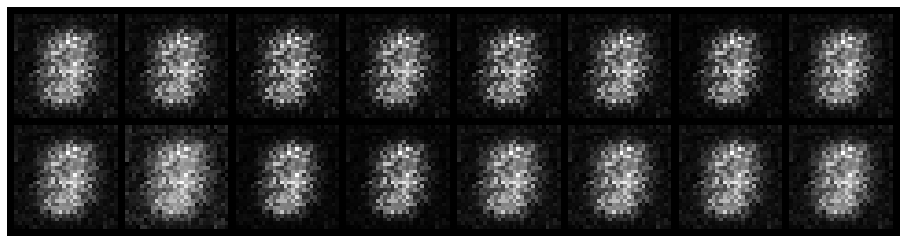

Epoch: [0/50], Batch Num: [0/600]
Discriminator Loss: 0.8061, Generator Loss: 1.7300
D(x): 0.7698, D(G(z)): 0.3194


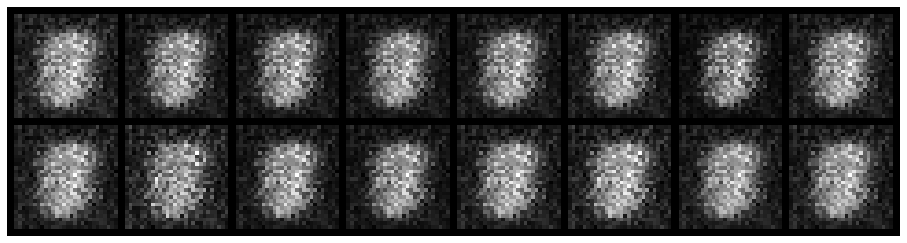

Epoch: [0/50], Batch Num: [100/600]
Discriminator Loss: 0.7670, Generator Loss: 1.3690
D(x): 0.7426, D(G(z)): 0.3294


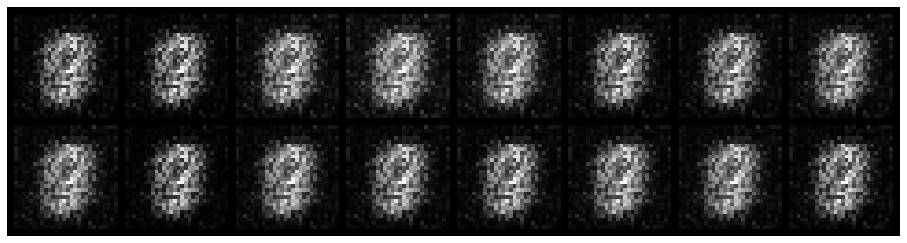

Epoch: [0/50], Batch Num: [200/600]
Discriminator Loss: 1.6670, Generator Loss: 1.4738
D(x): 0.5352, D(G(z)): 0.3599


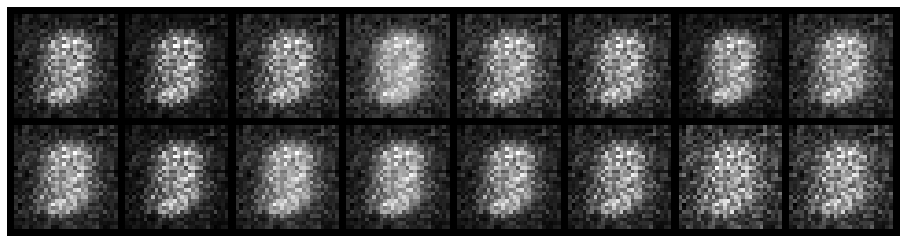

Epoch: [0/50], Batch Num: [300/600]
Discriminator Loss: 1.2588, Generator Loss: 1.2411
D(x): 0.6865, D(G(z)): 0.4391


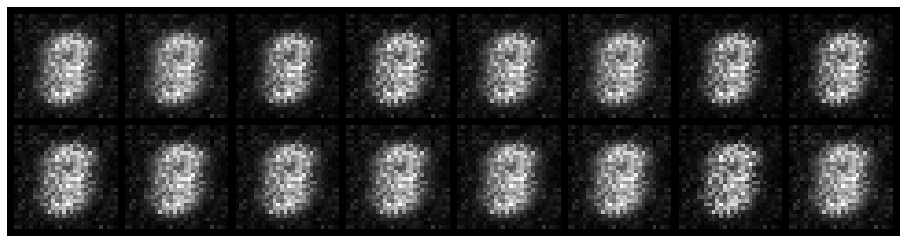

Epoch: [0/50], Batch Num: [400/600]
Discriminator Loss: 0.7457, Generator Loss: 1.3283
D(x): 0.7743, D(G(z)): 0.3050


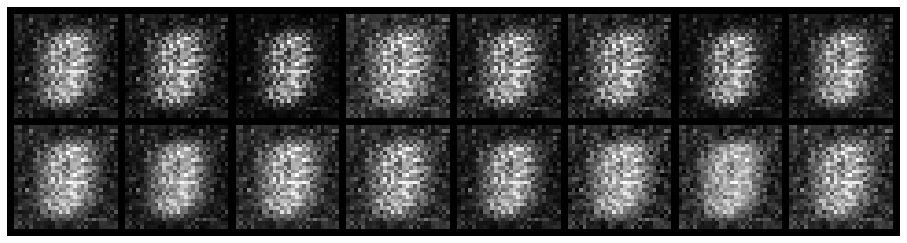

Epoch: [0/50], Batch Num: [500/600]
Discriminator Loss: 0.3334, Generator Loss: 2.6532
D(x): 0.9434, D(G(z)): 0.1901


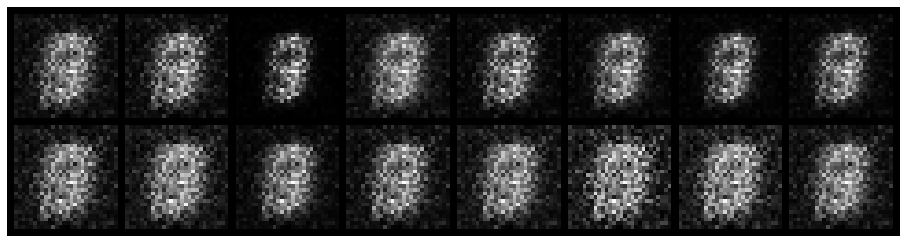

Epoch: [1/50], Batch Num: [0/600]
Discriminator Loss: 0.4150, Generator Loss: 2.9912
D(x): 0.8839, D(G(z)): 0.1579


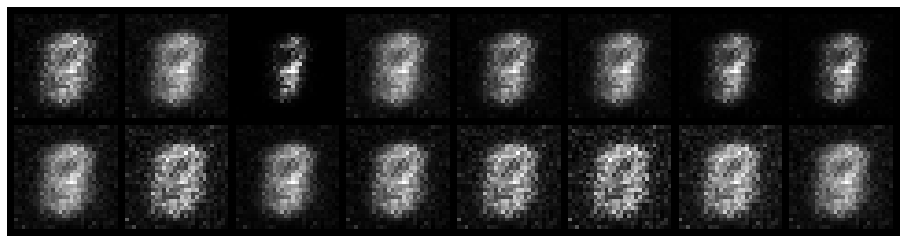

Epoch: [1/50], Batch Num: [100/600]
Discriminator Loss: 0.5789, Generator Loss: 2.9719
D(x): 0.7657, D(G(z)): 0.0689


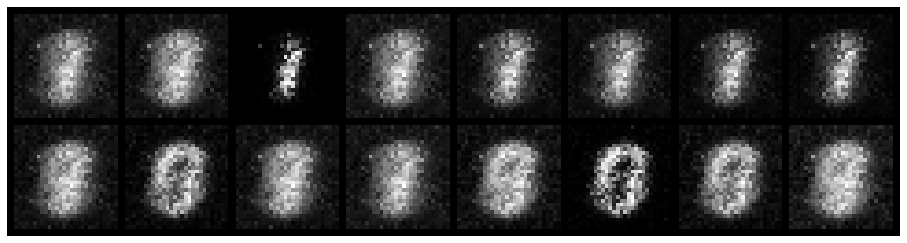

Epoch: [1/50], Batch Num: [200/600]
Discriminator Loss: 0.6405, Generator Loss: 2.4679
D(x): 0.8220, D(G(z)): 0.2368


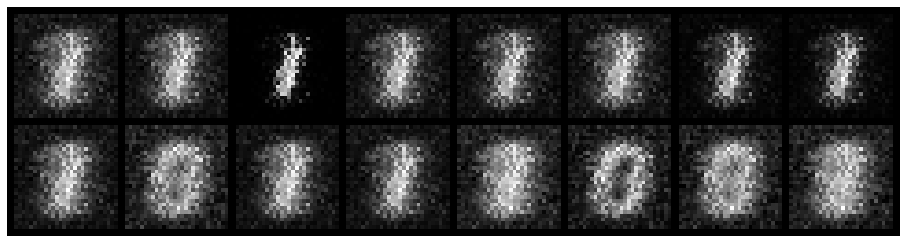

Epoch: [1/50], Batch Num: [300/600]
Discriminator Loss: 0.4916, Generator Loss: 1.8327
D(x): 0.9213, D(G(z)): 0.2671


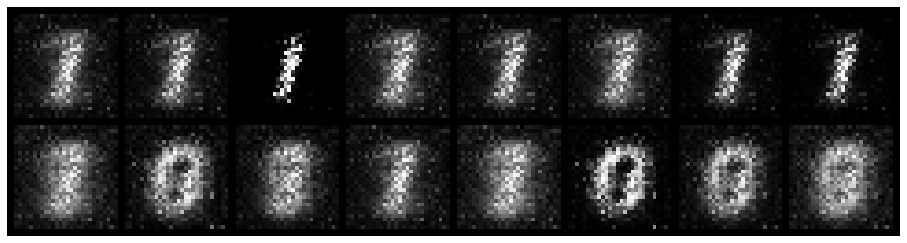

Epoch: [1/50], Batch Num: [400/600]
Discriminator Loss: 0.2381, Generator Loss: 3.1946
D(x): 0.9196, D(G(z)): 0.0965


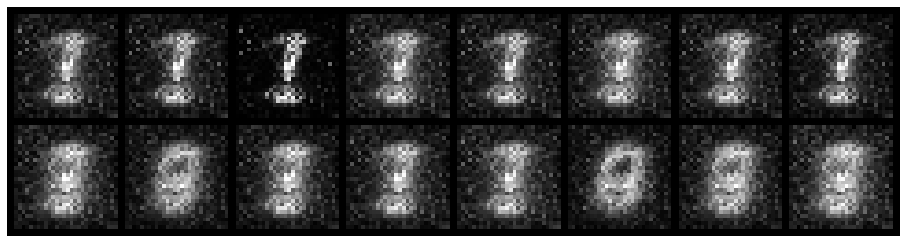

Epoch: [1/50], Batch Num: [500/600]
Discriminator Loss: 0.4284, Generator Loss: 3.5239
D(x): 0.8864, D(G(z)): 0.1288


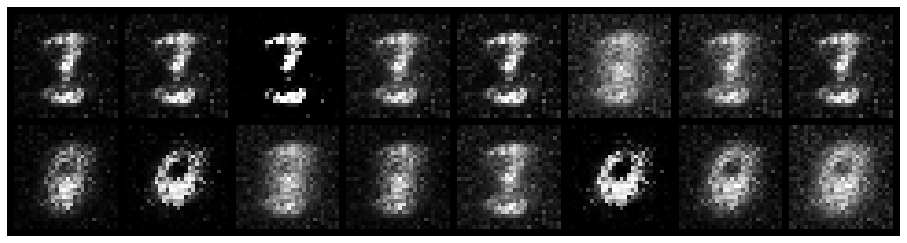

Epoch: [2/50], Batch Num: [0/600]
Discriminator Loss: 0.7591, Generator Loss: 3.5464
D(x): 0.7939, D(G(z)): 0.1611


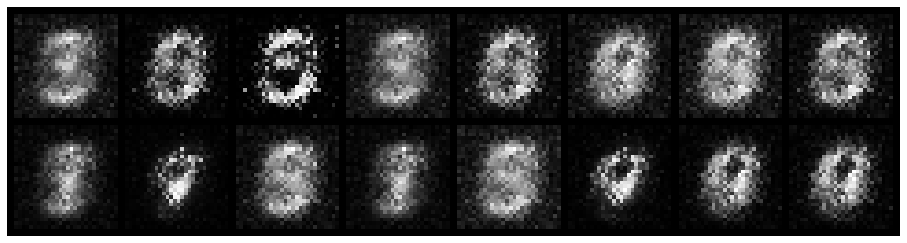

Epoch: [2/50], Batch Num: [100/600]
Discriminator Loss: 0.5436, Generator Loss: 3.4101
D(x): 0.8438, D(G(z)): 0.1502


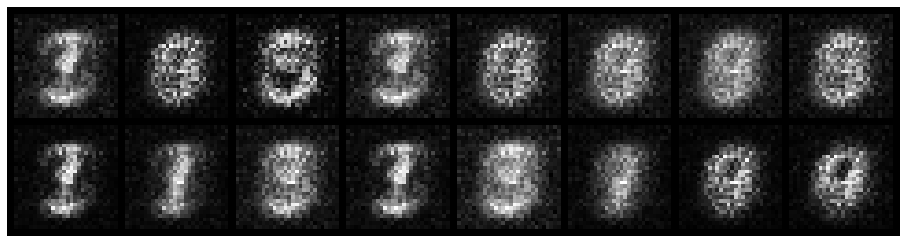

Epoch: [2/50], Batch Num: [200/600]
Discriminator Loss: 0.5912, Generator Loss: 1.4721
D(x): 0.8429, D(G(z)): 0.2792


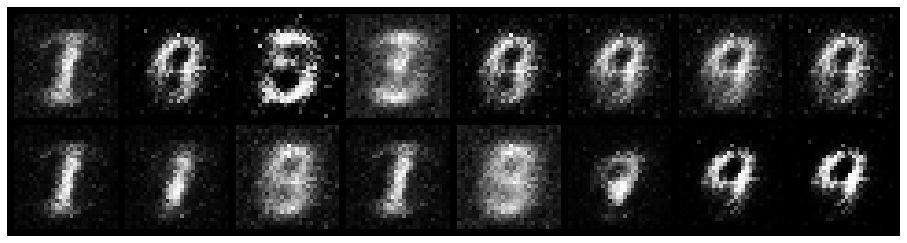

Epoch: [2/50], Batch Num: [300/600]
Discriminator Loss: 0.9188, Generator Loss: 2.4390
D(x): 0.7908, D(G(z)): 0.3058


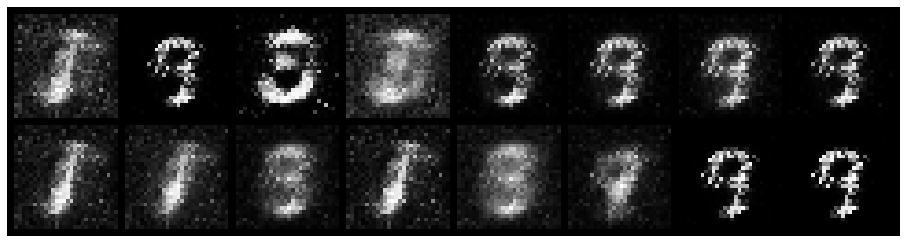

Epoch: [2/50], Batch Num: [400/600]
Discriminator Loss: 0.4110, Generator Loss: 2.8266
D(x): 0.8877, D(G(z)): 0.1745


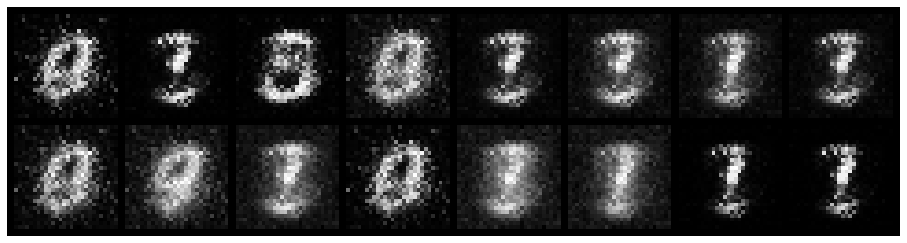

Epoch: [2/50], Batch Num: [500/600]
Discriminator Loss: 0.4998, Generator Loss: 2.2289
D(x): 0.8613, D(G(z)): 0.1697


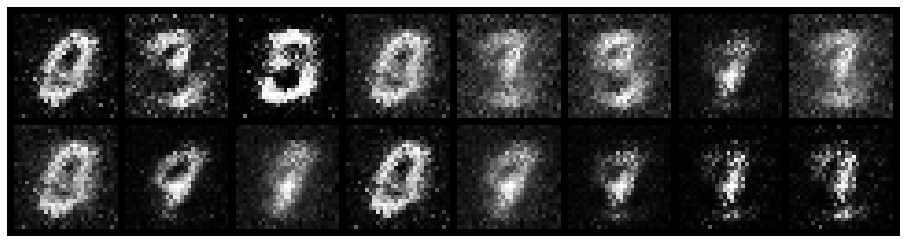

Epoch: [3/50], Batch Num: [0/600]
Discriminator Loss: 0.3587, Generator Loss: 2.6685
D(x): 0.8895, D(G(z)): 0.1447


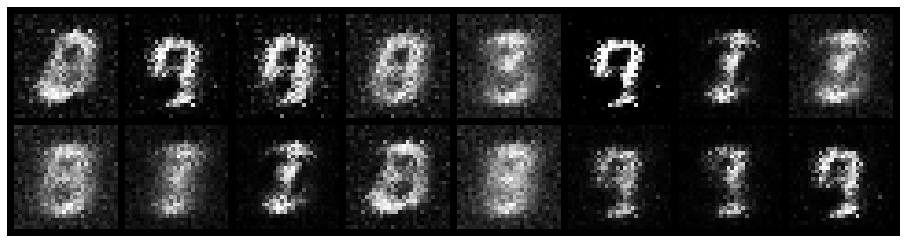

Epoch: [3/50], Batch Num: [100/600]
Discriminator Loss: 0.4078, Generator Loss: 2.1521
D(x): 0.8540, D(G(z)): 0.1249


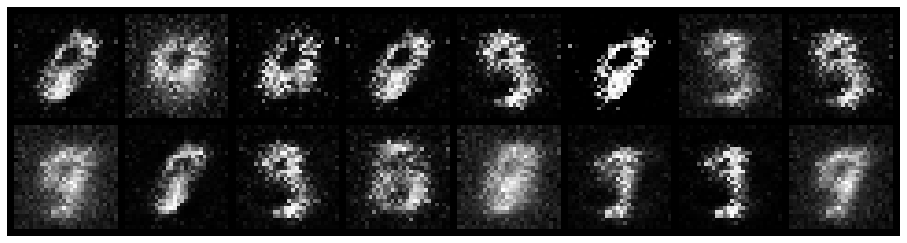

Epoch: [3/50], Batch Num: [200/600]
Discriminator Loss: 0.3238, Generator Loss: 2.9212
D(x): 0.9228, D(G(z)): 0.1544


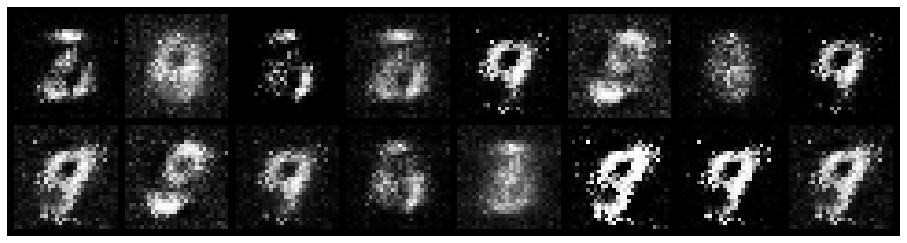

Epoch: [3/50], Batch Num: [300/600]
Discriminator Loss: 0.8097, Generator Loss: 2.4825
D(x): 0.7461, D(G(z)): 0.1177


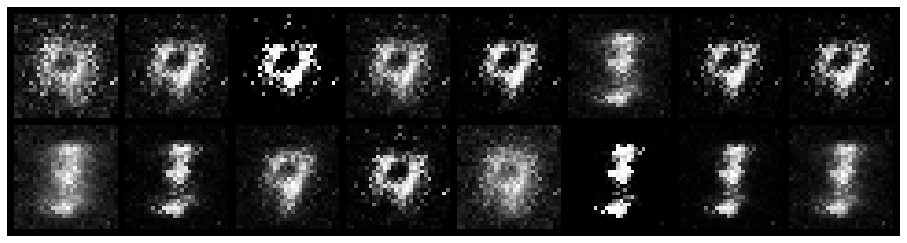

Epoch: [3/50], Batch Num: [400/600]
Discriminator Loss: 0.4082, Generator Loss: 3.5723
D(x): 0.8988, D(G(z)): 0.1112


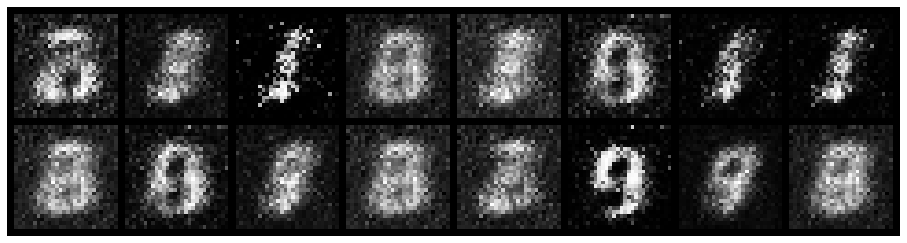

Epoch: [3/50], Batch Num: [500/600]
Discriminator Loss: 0.5172, Generator Loss: 3.0441
D(x): 0.8459, D(G(z)): 0.1022


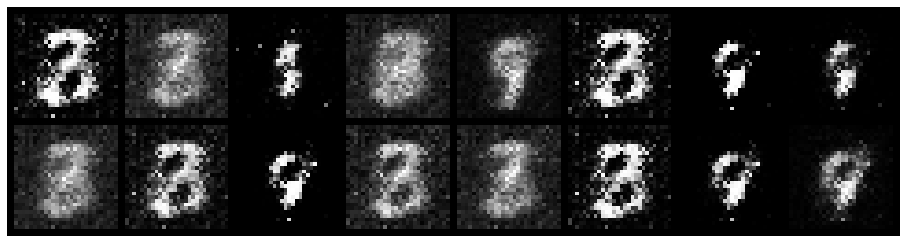

Epoch: [4/50], Batch Num: [0/600]
Discriminator Loss: 0.3099, Generator Loss: 3.2988
D(x): 0.8711, D(G(z)): 0.0645


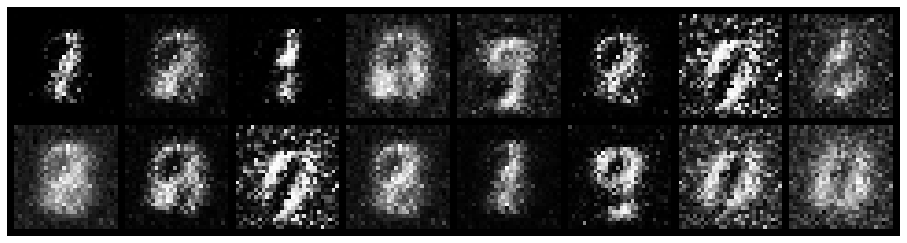

Epoch: [4/50], Batch Num: [100/600]
Discriminator Loss: 0.4895, Generator Loss: 3.8042
D(x): 0.8162, D(G(z)): 0.0599


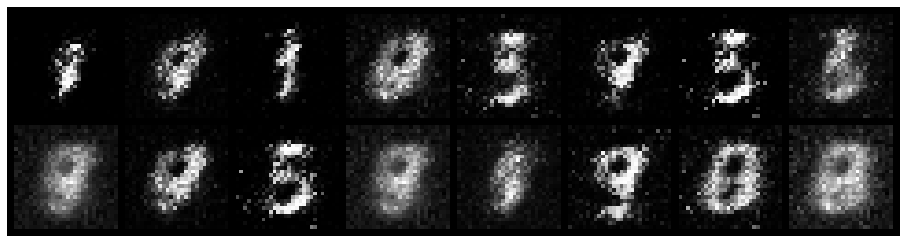

Epoch: [4/50], Batch Num: [200/600]
Discriminator Loss: 0.2686, Generator Loss: 3.5449
D(x): 0.9240, D(G(z)): 0.1031


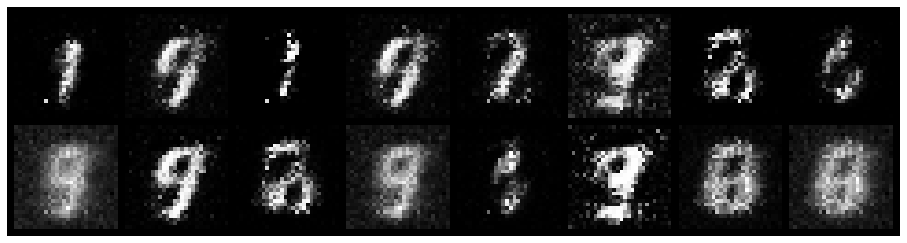

Epoch: [4/50], Batch Num: [300/600]
Discriminator Loss: 0.3606, Generator Loss: 3.2066
D(x): 0.8568, D(G(z)): 0.0561


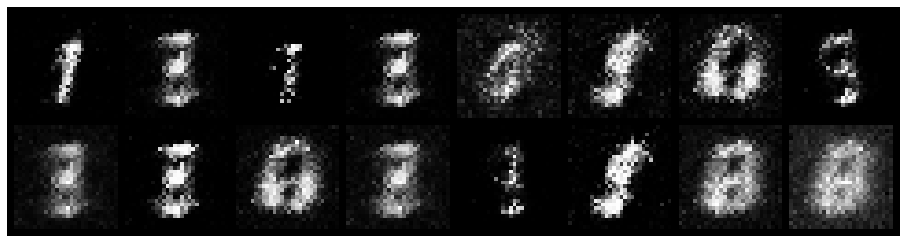

Epoch: [4/50], Batch Num: [400/600]
Discriminator Loss: 0.5294, Generator Loss: 2.3439
D(x): 0.8603, D(G(z)): 0.1762


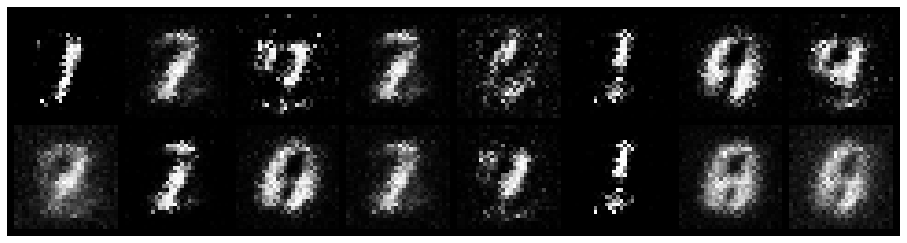

Epoch: [4/50], Batch Num: [500/600]
Discriminator Loss: 0.6491, Generator Loss: 2.0979
D(x): 0.8646, D(G(z)): 0.2400


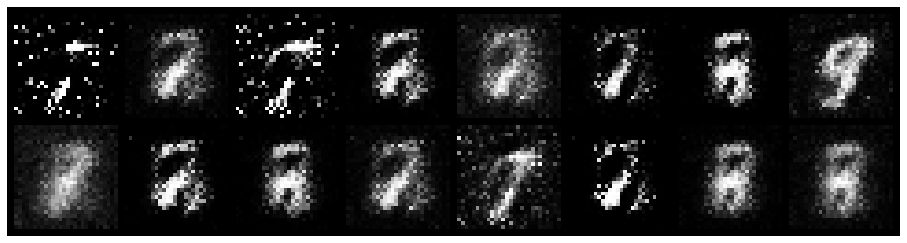

Epoch: [5/50], Batch Num: [0/600]
Discriminator Loss: 0.7597, Generator Loss: 2.3895
D(x): 0.7802, D(G(z)): 0.1312


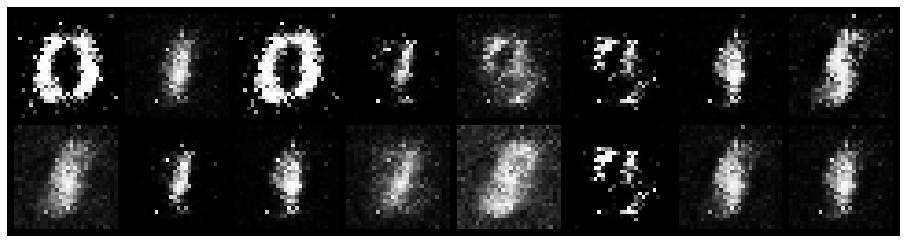

Epoch: [5/50], Batch Num: [100/600]
Discriminator Loss: 0.8143, Generator Loss: 1.9622
D(x): 0.7643, D(G(z)): 0.2481


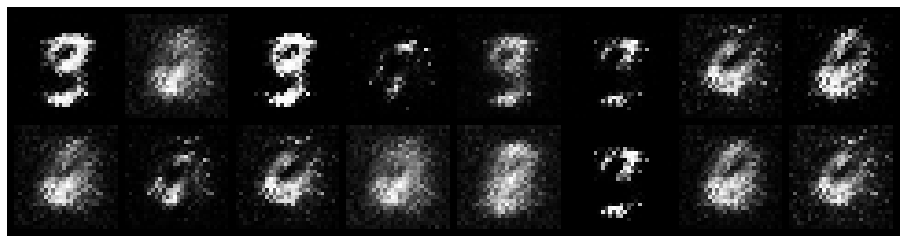

Epoch: [5/50], Batch Num: [200/600]
Discriminator Loss: 0.7574, Generator Loss: 2.4776
D(x): 0.7692, D(G(z)): 0.2150


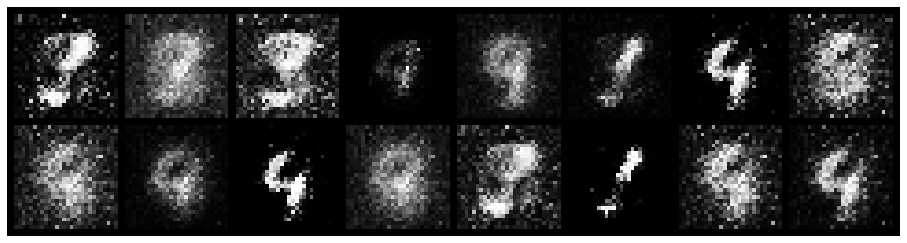

Epoch: [5/50], Batch Num: [300/600]
Discriminator Loss: 0.2386, Generator Loss: 2.7809
D(x): 0.9370, D(G(z)): 0.1158


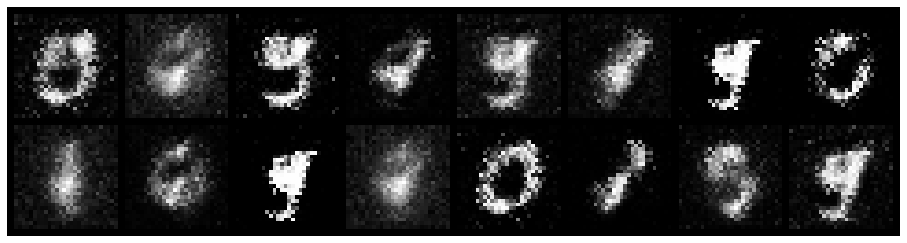

Epoch: [5/50], Batch Num: [400/600]
Discriminator Loss: 0.9124, Generator Loss: 3.1843
D(x): 0.6619, D(G(z)): 0.0993


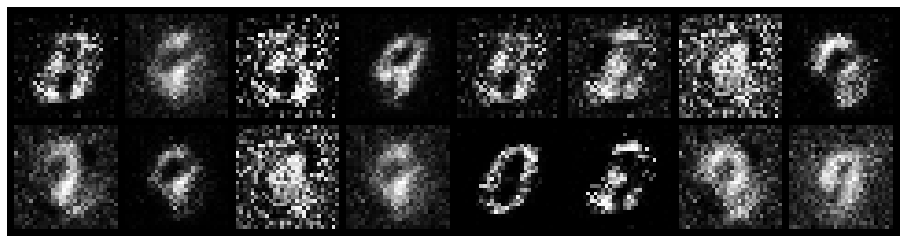

Epoch: [5/50], Batch Num: [500/600]
Discriminator Loss: 0.5250, Generator Loss: 2.8035
D(x): 0.8017, D(G(z)): 0.1316


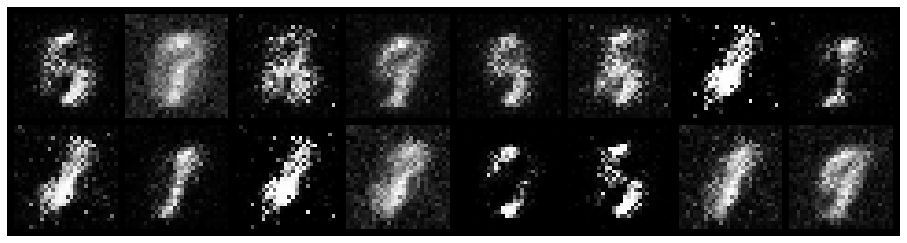

Epoch: [6/50], Batch Num: [0/600]
Discriminator Loss: 0.5880, Generator Loss: 2.3705
D(x): 0.8373, D(G(z)): 0.2096


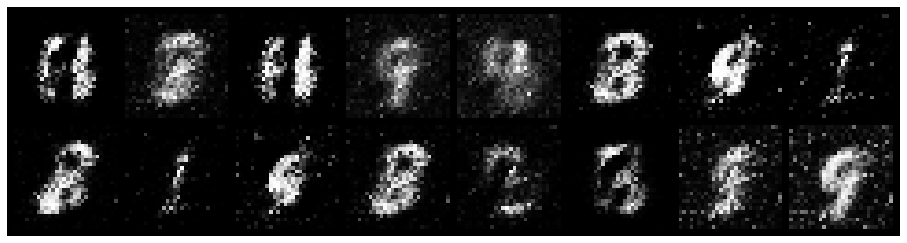

Epoch: [6/50], Batch Num: [100/600]
Discriminator Loss: 0.6005, Generator Loss: 2.7949
D(x): 0.7578, D(G(z)): 0.1223


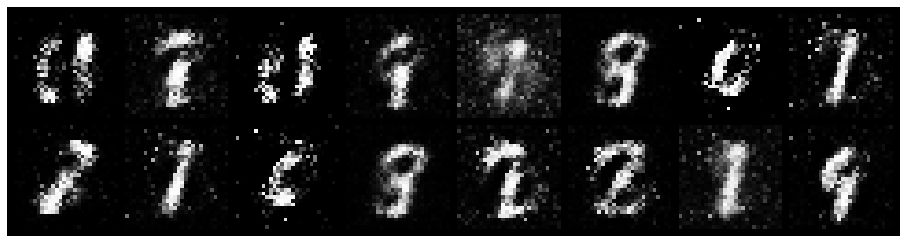

Epoch: [6/50], Batch Num: [200/600]
Discriminator Loss: 0.4610, Generator Loss: 3.3714
D(x): 0.8141, D(G(z)): 0.1199


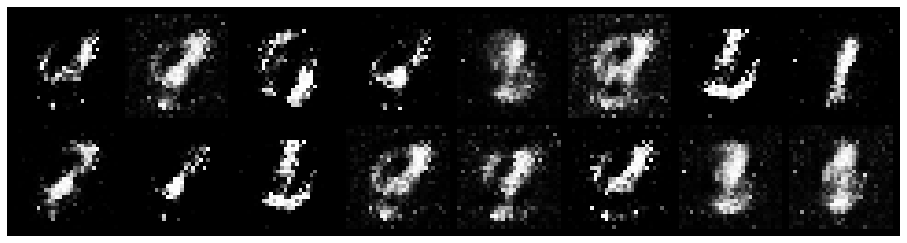

Epoch: [6/50], Batch Num: [300/600]
Discriminator Loss: 0.5095, Generator Loss: 2.0294
D(x): 0.8361, D(G(z)): 0.2017


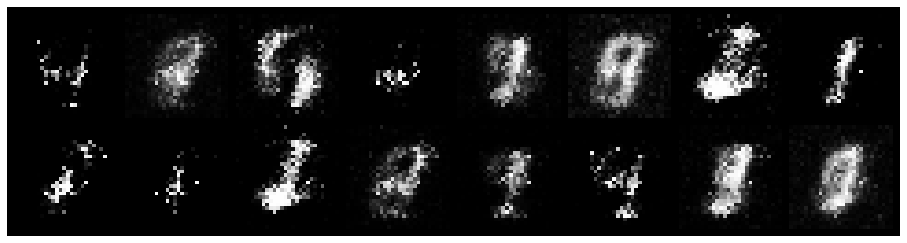

Epoch: [6/50], Batch Num: [400/600]
Discriminator Loss: 0.5513, Generator Loss: 2.9304
D(x): 0.8281, D(G(z)): 0.1342


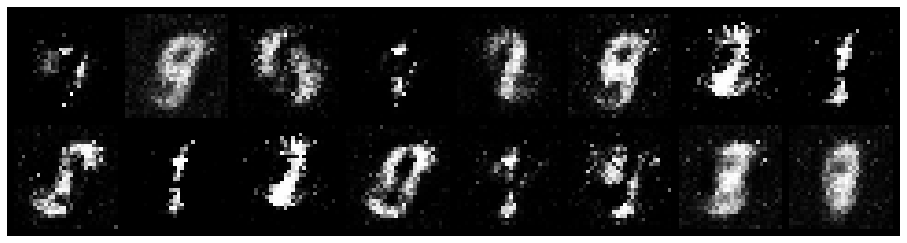

Epoch: [6/50], Batch Num: [500/600]
Discriminator Loss: 0.5015, Generator Loss: 2.6785
D(x): 0.8660, D(G(z)): 0.1810


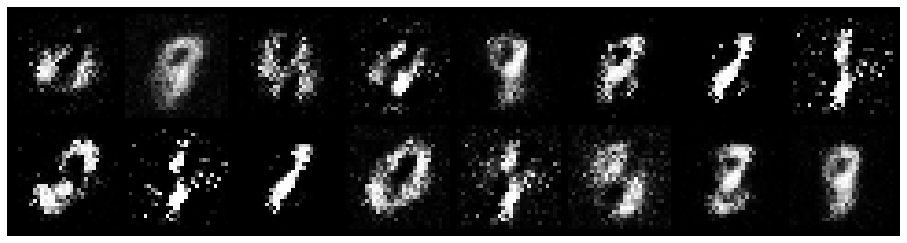

Epoch: [7/50], Batch Num: [0/600]
Discriminator Loss: 0.3293, Generator Loss: 2.9320
D(x): 0.8776, D(G(z)): 0.1167


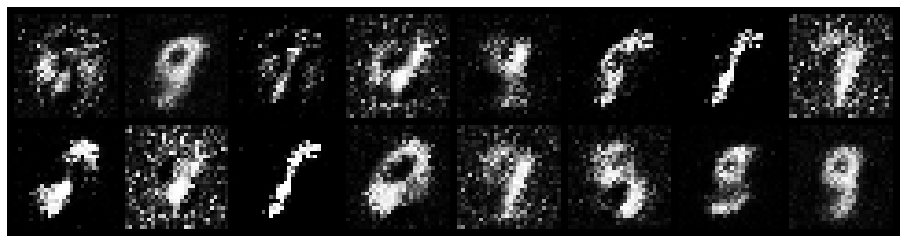

Epoch: [7/50], Batch Num: [100/600]
Discriminator Loss: 0.4369, Generator Loss: 3.0338
D(x): 0.8562, D(G(z)): 0.1452


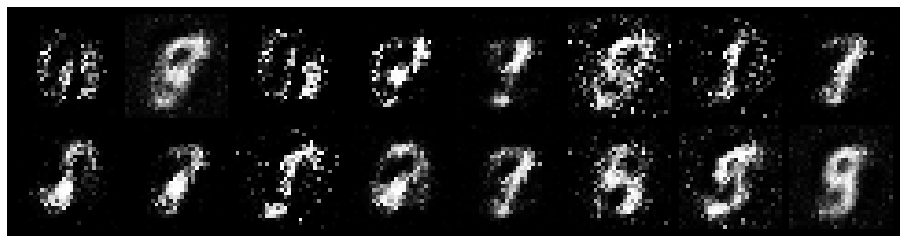

Epoch: [7/50], Batch Num: [200/600]
Discriminator Loss: 0.7105, Generator Loss: 2.1020
D(x): 0.7849, D(G(z)): 0.2020


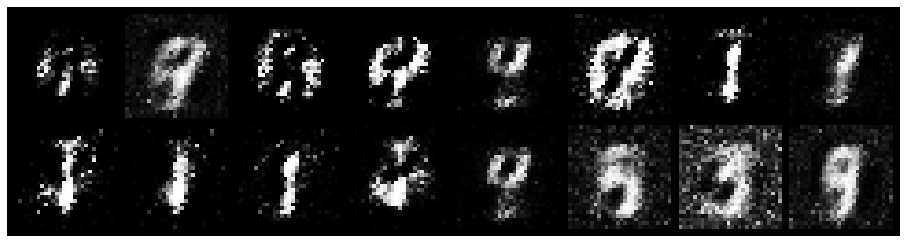

Epoch: [7/50], Batch Num: [300/600]
Discriminator Loss: 0.4383, Generator Loss: 3.4487
D(x): 0.8739, D(G(z)): 0.0922


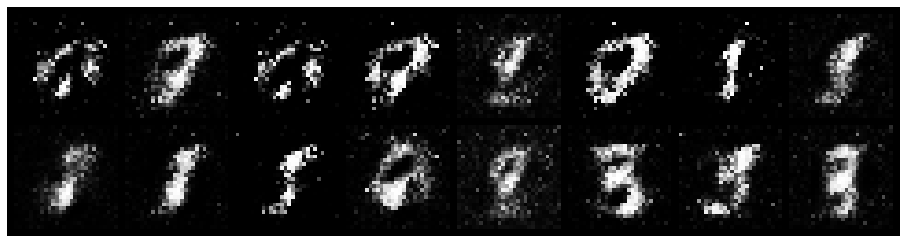

Epoch: [7/50], Batch Num: [400/600]
Discriminator Loss: 0.6374, Generator Loss: 2.8478
D(x): 0.8349, D(G(z)): 0.2117


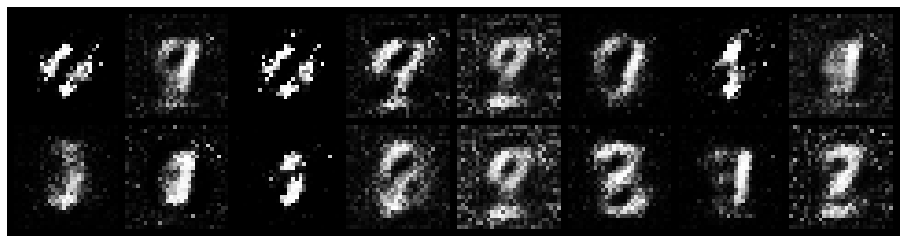

Epoch: [7/50], Batch Num: [500/600]
Discriminator Loss: 0.6345, Generator Loss: 2.2564
D(x): 0.8455, D(G(z)): 0.2754


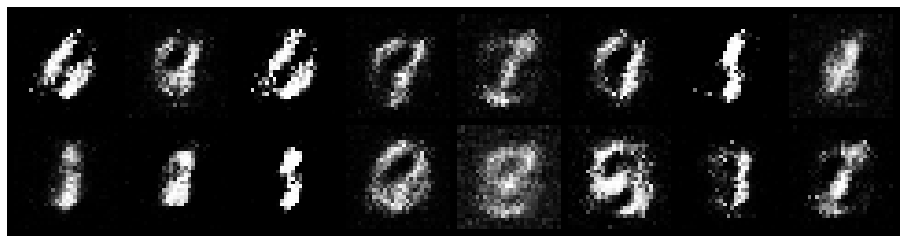

Epoch: [8/50], Batch Num: [0/600]
Discriminator Loss: 0.7770, Generator Loss: 2.1848
D(x): 0.8065, D(G(z)): 0.2816


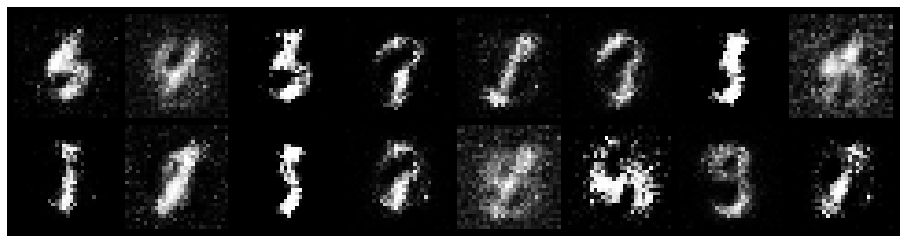

Epoch: [8/50], Batch Num: [100/600]
Discriminator Loss: 0.6564, Generator Loss: 2.1789
D(x): 0.7637, D(G(z)): 0.1933


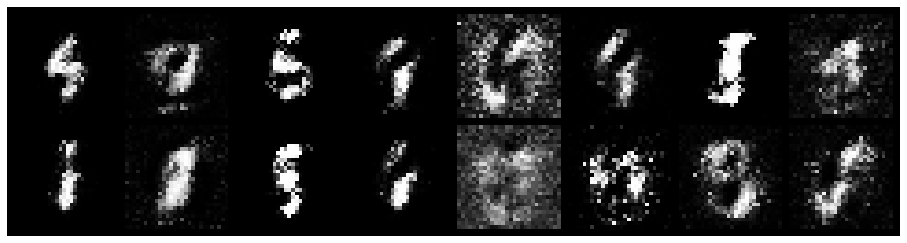

Epoch: [8/50], Batch Num: [200/600]
Discriminator Loss: 0.5657, Generator Loss: 2.7199
D(x): 0.7951, D(G(z)): 0.1586


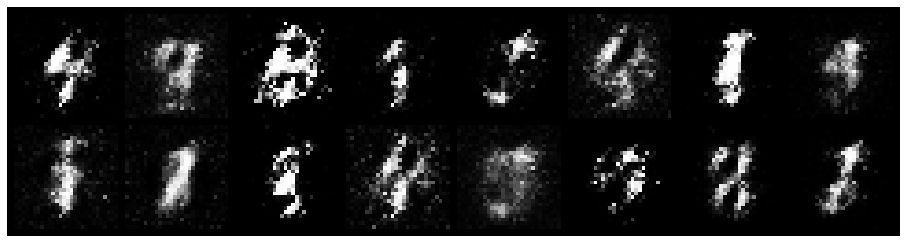

Epoch: [8/50], Batch Num: [300/600]
Discriminator Loss: 0.7350, Generator Loss: 2.6428
D(x): 0.7682, D(G(z)): 0.2117


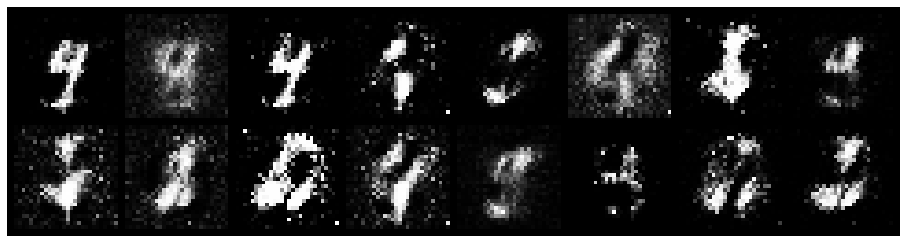

Epoch: [8/50], Batch Num: [400/600]
Discriminator Loss: 0.9386, Generator Loss: 2.2489
D(x): 0.6927, D(G(z)): 0.2279


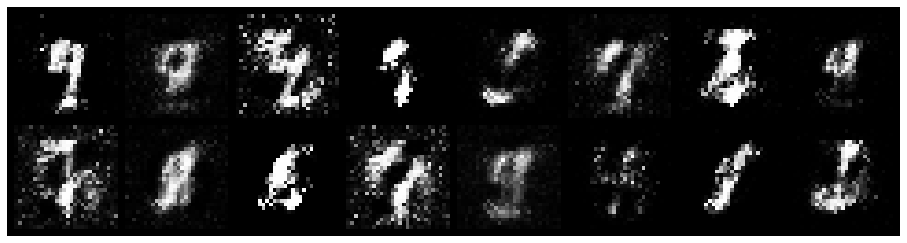

Epoch: [8/50], Batch Num: [500/600]
Discriminator Loss: 0.9768, Generator Loss: 1.5614
D(x): 0.6518, D(G(z)): 0.2380


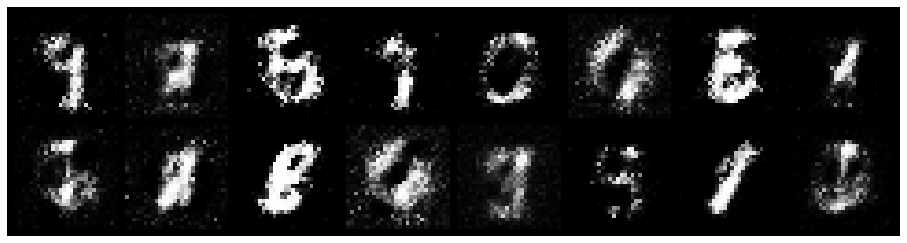

Epoch: [9/50], Batch Num: [0/600]
Discriminator Loss: 0.7504, Generator Loss: 1.9030
D(x): 0.8083, D(G(z)): 0.2692


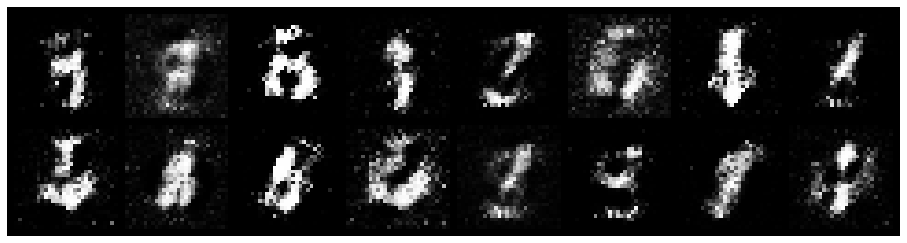

Epoch: [9/50], Batch Num: [100/600]
Discriminator Loss: 0.6698, Generator Loss: 1.7767
D(x): 0.7967, D(G(z)): 0.2479


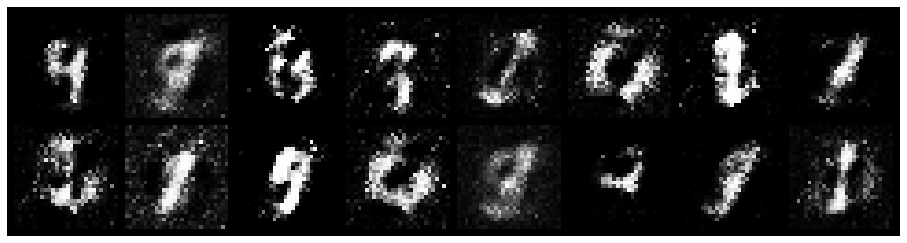

Epoch: [9/50], Batch Num: [200/600]
Discriminator Loss: 0.7438, Generator Loss: 1.6660
D(x): 0.8248, D(G(z)): 0.3005


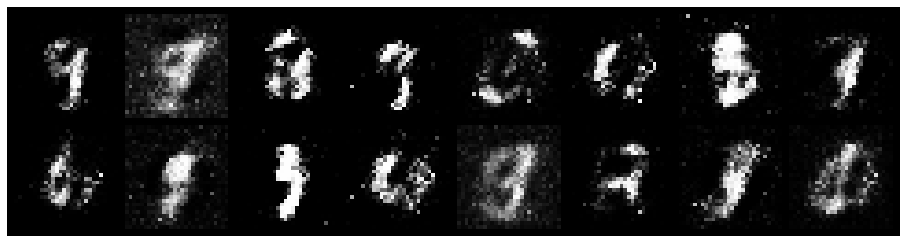

Epoch: [9/50], Batch Num: [300/600]
Discriminator Loss: 0.7452, Generator Loss: 2.3230
D(x): 0.7256, D(G(z)): 0.1533


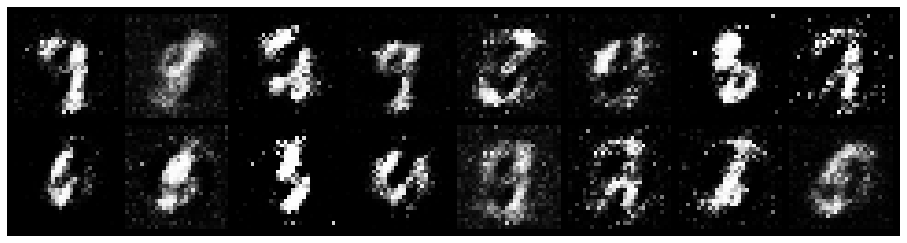

Epoch: [9/50], Batch Num: [400/600]
Discriminator Loss: 0.8461, Generator Loss: 1.7198
D(x): 0.7121, D(G(z)): 0.2560


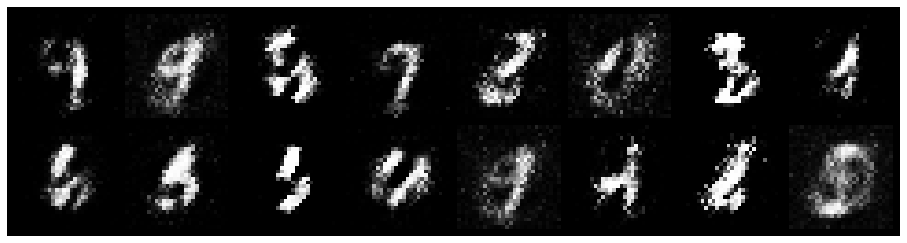

Epoch: [9/50], Batch Num: [500/600]
Discriminator Loss: 0.5075, Generator Loss: 2.4938
D(x): 0.8330, D(G(z)): 0.1957


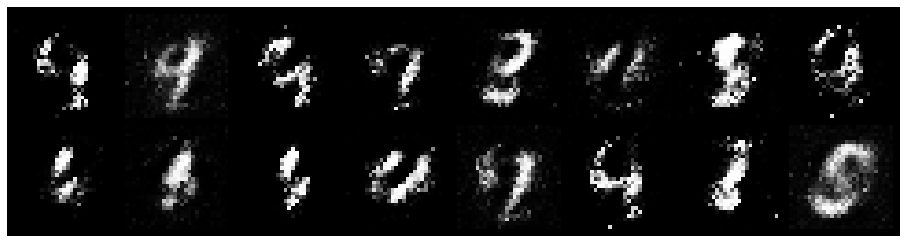

Epoch: [10/50], Batch Num: [0/600]
Discriminator Loss: 0.6213, Generator Loss: 2.3719
D(x): 0.8181, D(G(z)): 0.2252


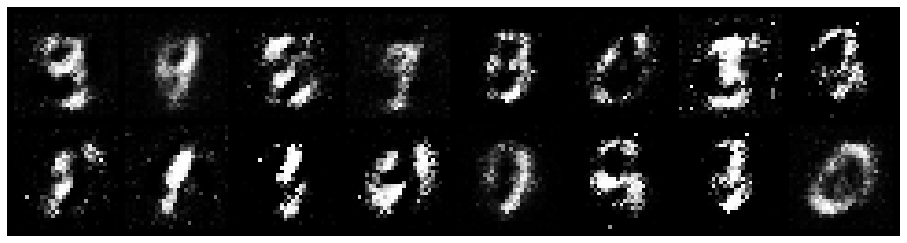

Epoch: [10/50], Batch Num: [100/600]
Discriminator Loss: 0.6177, Generator Loss: 2.2304
D(x): 0.7963, D(G(z)): 0.2270


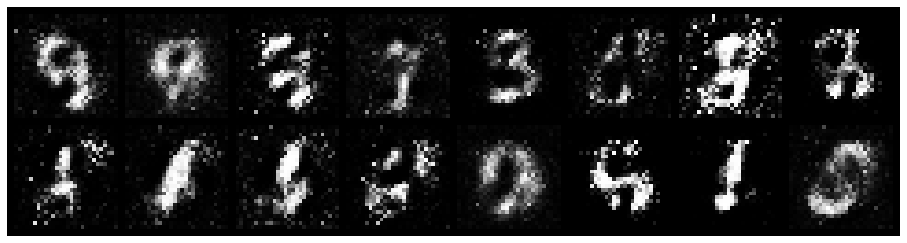

Epoch: [10/50], Batch Num: [200/600]
Discriminator Loss: 0.9179, Generator Loss: 1.5623
D(x): 0.6591, D(G(z)): 0.2916


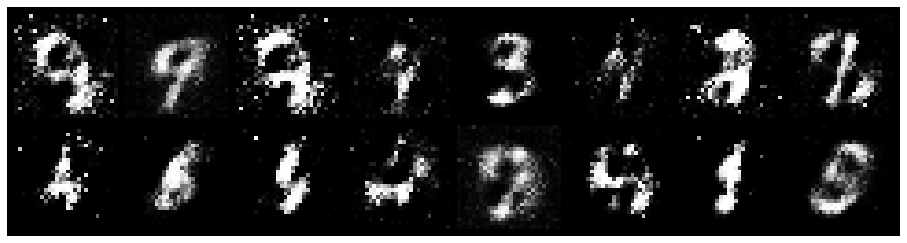

Epoch: [10/50], Batch Num: [300/600]
Discriminator Loss: 0.7493, Generator Loss: 2.0077
D(x): 0.7196, D(G(z)): 0.2167


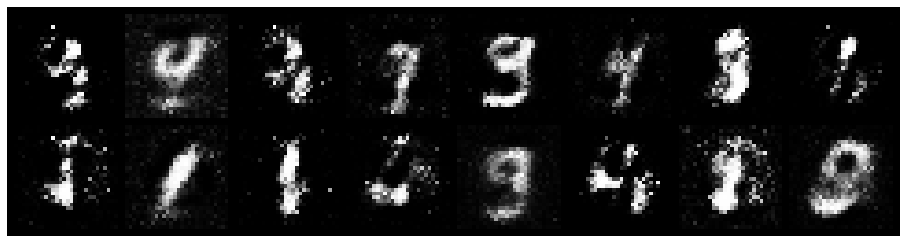

Epoch: [10/50], Batch Num: [400/600]
Discriminator Loss: 0.8820, Generator Loss: 2.0448
D(x): 0.7323, D(G(z)): 0.2340


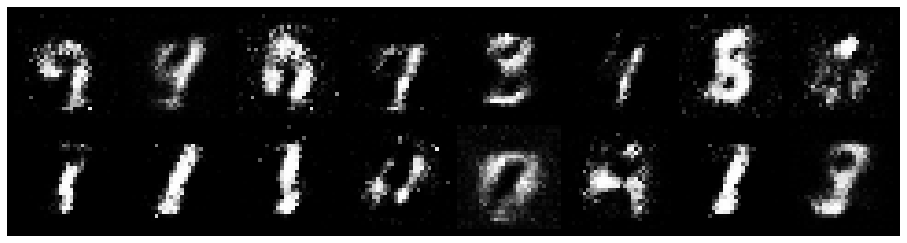

Epoch: [10/50], Batch Num: [500/600]
Discriminator Loss: 0.7800, Generator Loss: 1.8795
D(x): 0.7540, D(G(z)): 0.2451


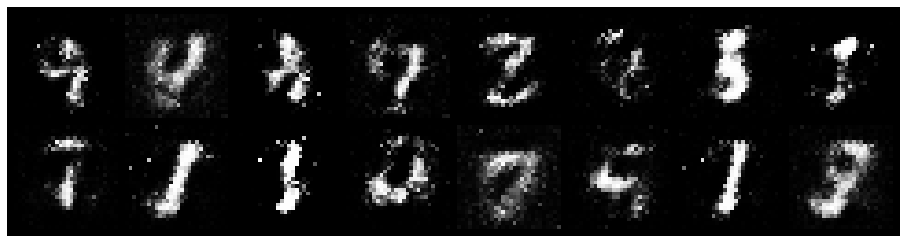

Epoch: [11/50], Batch Num: [0/600]
Discriminator Loss: 0.8620, Generator Loss: 2.1456
D(x): 0.7802, D(G(z)): 0.2608


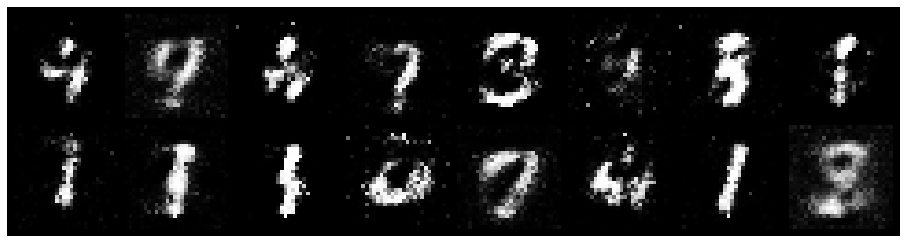

Epoch: [11/50], Batch Num: [100/600]
Discriminator Loss: 0.6372, Generator Loss: 2.1651
D(x): 0.7975, D(G(z)): 0.2146


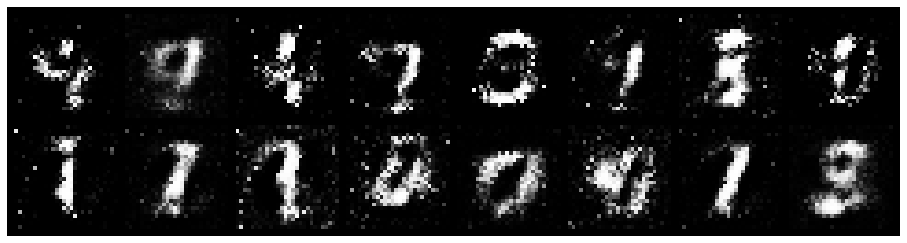

Epoch: [11/50], Batch Num: [200/600]
Discriminator Loss: 0.4672, Generator Loss: 2.5551
D(x): 0.8221, D(G(z)): 0.1403


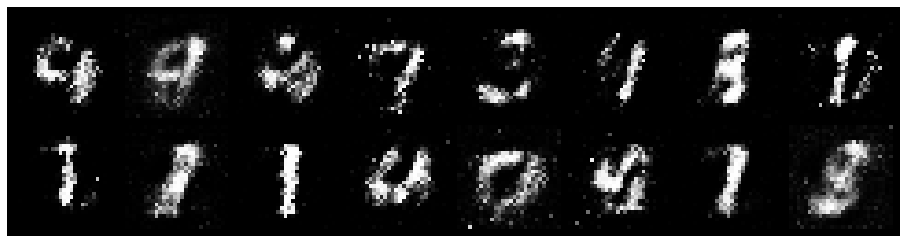

Epoch: [11/50], Batch Num: [300/600]
Discriminator Loss: 0.5420, Generator Loss: 2.0466
D(x): 0.8737, D(G(z)): 0.2679


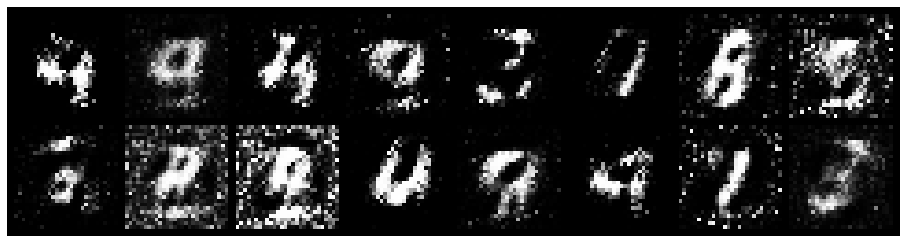

Epoch: [11/50], Batch Num: [400/600]
Discriminator Loss: 0.7247, Generator Loss: 2.2016
D(x): 0.7958, D(G(z)): 0.2396


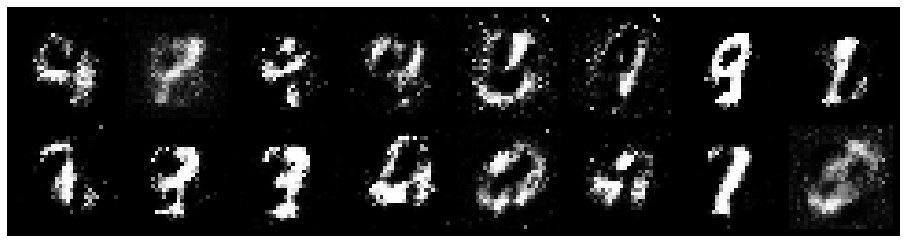

Epoch: [11/50], Batch Num: [500/600]
Discriminator Loss: 0.9702, Generator Loss: 2.0327
D(x): 0.7994, D(G(z)): 0.3192


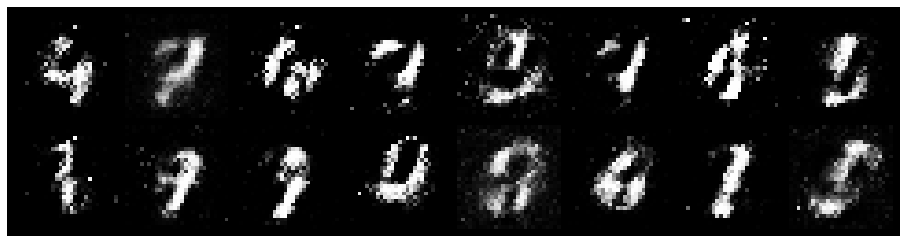

Epoch: [12/50], Batch Num: [0/600]
Discriminator Loss: 0.7107, Generator Loss: 2.4940
D(x): 0.8166, D(G(z)): 0.2641


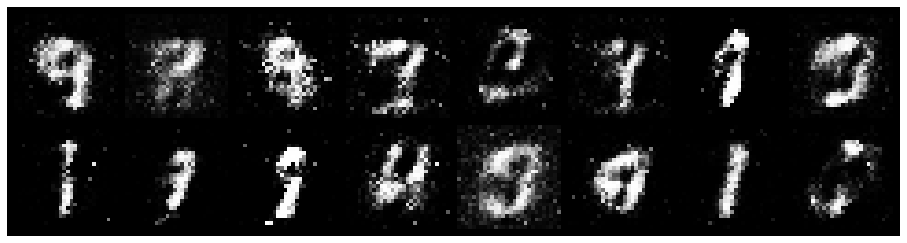

Epoch: [12/50], Batch Num: [100/600]
Discriminator Loss: 1.0181, Generator Loss: 1.3686
D(x): 0.6866, D(G(z)): 0.2734


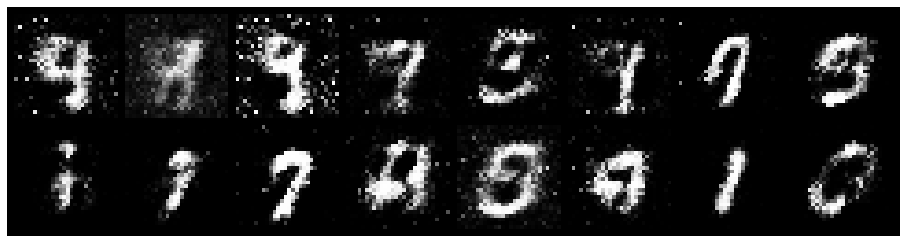

Epoch: [12/50], Batch Num: [200/600]
Discriminator Loss: 0.6655, Generator Loss: 2.1329
D(x): 0.9078, D(G(z)): 0.3235


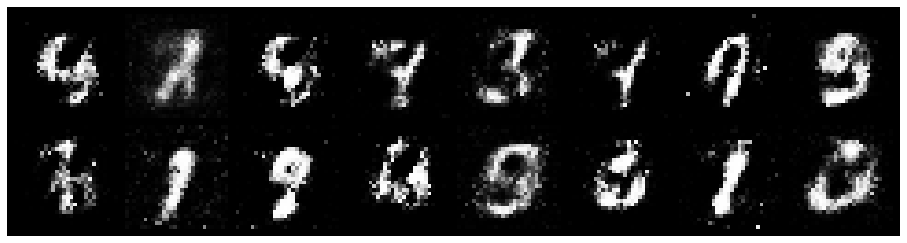

Epoch: [12/50], Batch Num: [300/600]
Discriminator Loss: 1.0180, Generator Loss: 2.1197
D(x): 0.6835, D(G(z)): 0.2138


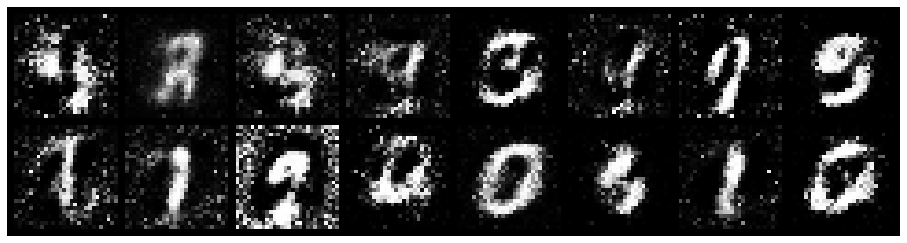

Epoch: [12/50], Batch Num: [400/600]
Discriminator Loss: 1.0028, Generator Loss: 1.6336
D(x): 0.7195, D(G(z)): 0.3398


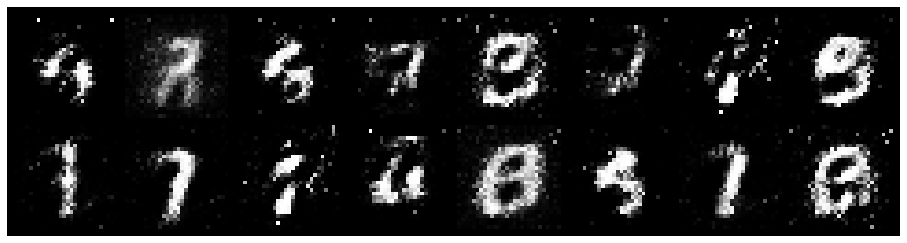

Epoch: [12/50], Batch Num: [500/600]
Discriminator Loss: 0.9249, Generator Loss: 1.6471
D(x): 0.6765, D(G(z)): 0.2523


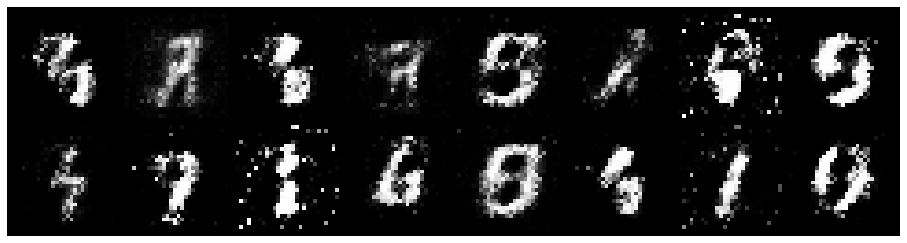

Epoch: [13/50], Batch Num: [0/600]
Discriminator Loss: 0.9561, Generator Loss: 2.2872
D(x): 0.7642, D(G(z)): 0.3075


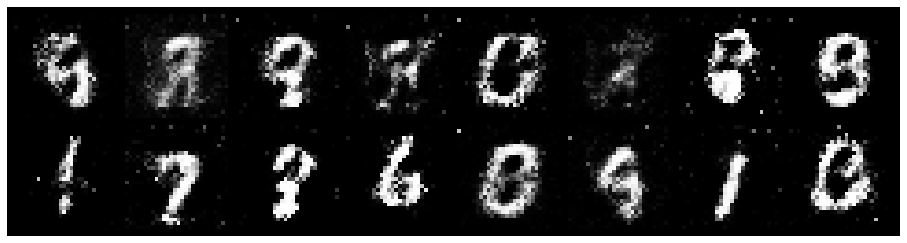

Epoch: [13/50], Batch Num: [100/600]
Discriminator Loss: 1.1444, Generator Loss: 1.8340
D(x): 0.7787, D(G(z)): 0.3746


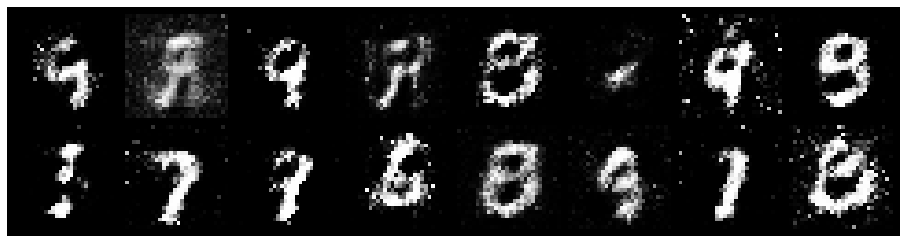

Epoch: [13/50], Batch Num: [200/600]
Discriminator Loss: 0.8207, Generator Loss: 1.8775
D(x): 0.7341, D(G(z)): 0.2348


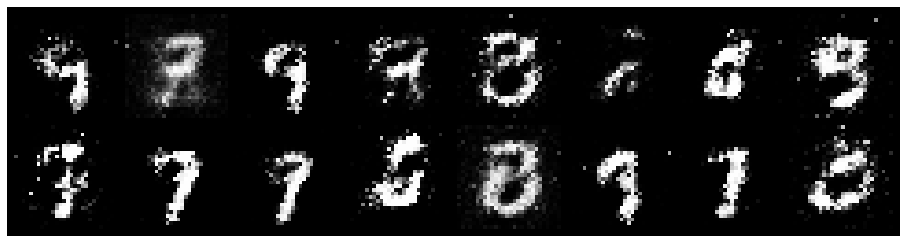

Epoch: [13/50], Batch Num: [300/600]
Discriminator Loss: 0.7889, Generator Loss: 1.8809
D(x): 0.7125, D(G(z)): 0.2394


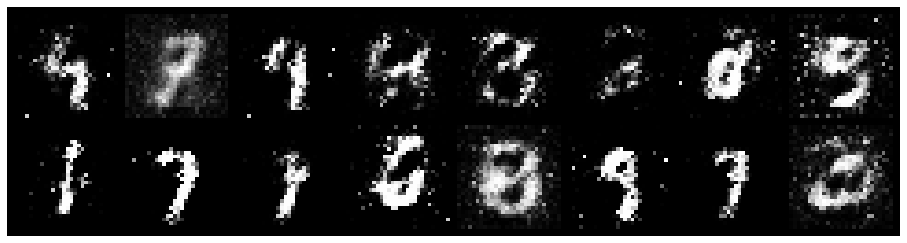

Epoch: [13/50], Batch Num: [400/600]
Discriminator Loss: 0.8784, Generator Loss: 1.9155
D(x): 0.7610, D(G(z)): 0.2601


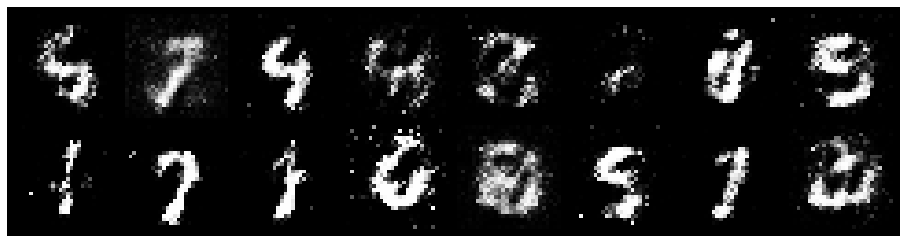

Epoch: [13/50], Batch Num: [500/600]
Discriminator Loss: 0.6446, Generator Loss: 1.7646
D(x): 0.8407, D(G(z)): 0.2725


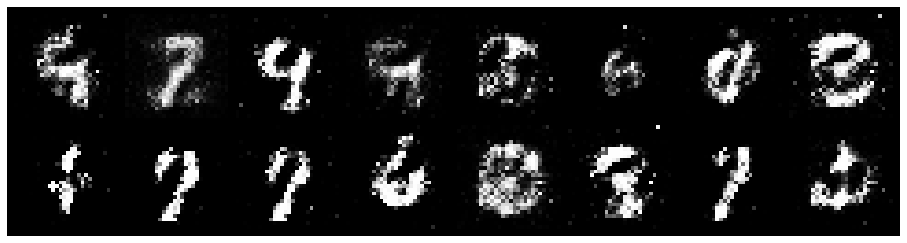

Epoch: [14/50], Batch Num: [0/600]
Discriminator Loss: 0.8063, Generator Loss: 2.0079
D(x): 0.7614, D(G(z)): 0.2178


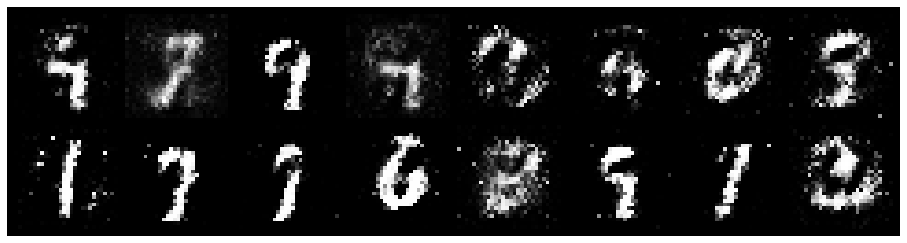

Epoch: [14/50], Batch Num: [100/600]
Discriminator Loss: 0.6363, Generator Loss: 2.1468
D(x): 0.7954, D(G(z)): 0.2119


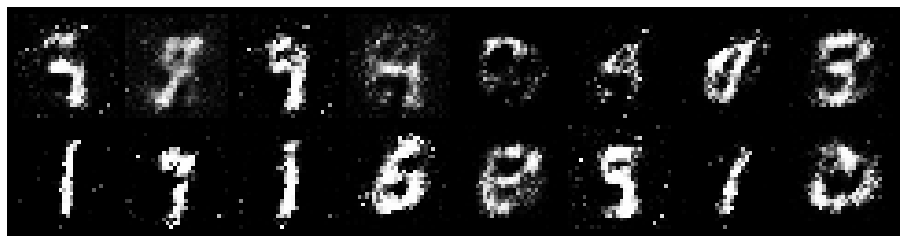

Epoch: [14/50], Batch Num: [200/600]
Discriminator Loss: 0.4784, Generator Loss: 2.1567
D(x): 0.8154, D(G(z)): 0.1302


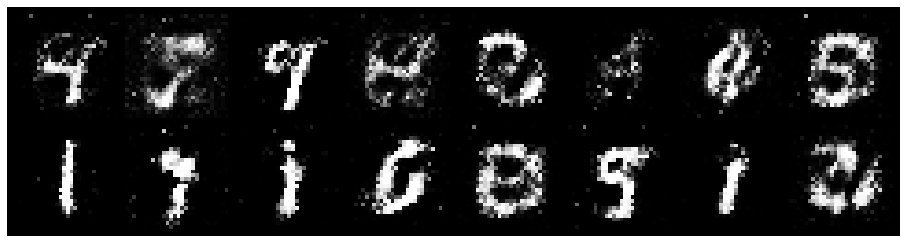

Epoch: [14/50], Batch Num: [300/600]
Discriminator Loss: 0.6731, Generator Loss: 1.9249
D(x): 0.7623, D(G(z)): 0.2236


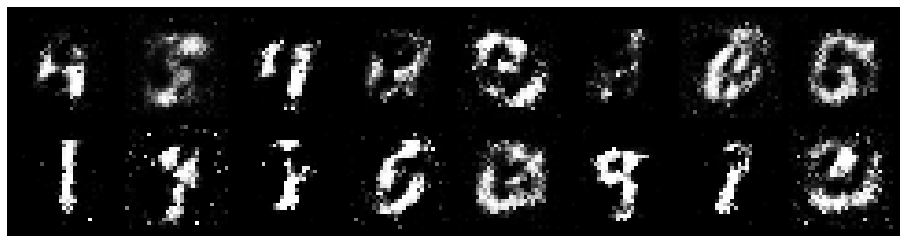

Epoch: [14/50], Batch Num: [400/600]
Discriminator Loss: 0.7901, Generator Loss: 1.6234
D(x): 0.7786, D(G(z)): 0.2695


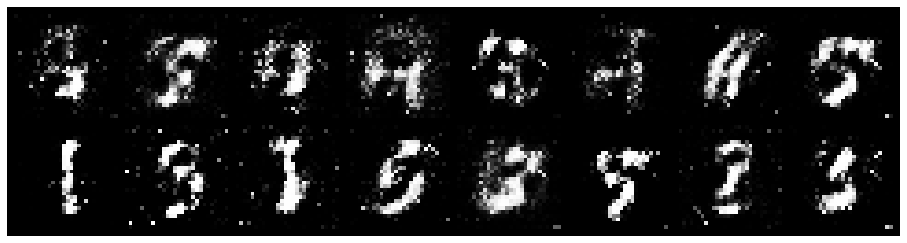

Epoch: [14/50], Batch Num: [500/600]
Discriminator Loss: 0.7721, Generator Loss: 2.1930
D(x): 0.7646, D(G(z)): 0.2404


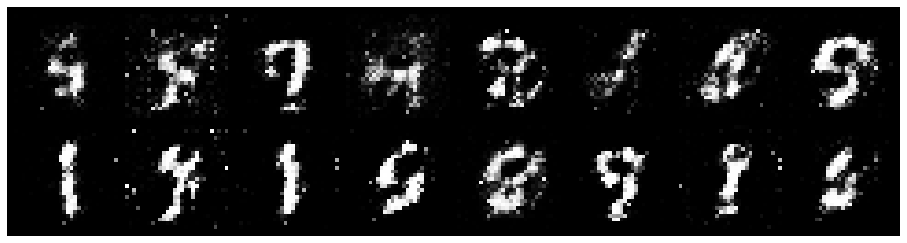

Epoch: [15/50], Batch Num: [0/600]
Discriminator Loss: 0.6517, Generator Loss: 1.8792
D(x): 0.7802, D(G(z)): 0.2272


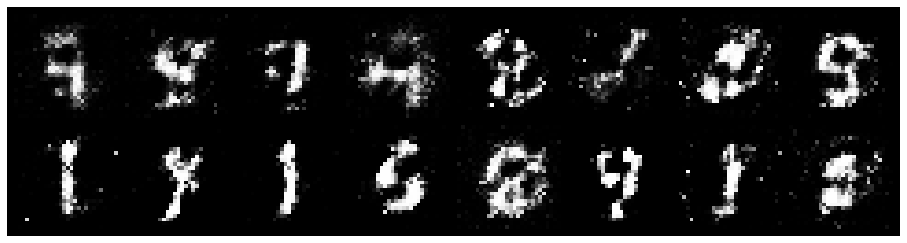

Epoch: [15/50], Batch Num: [100/600]
Discriminator Loss: 0.7044, Generator Loss: 1.9640
D(x): 0.7603, D(G(z)): 0.2397


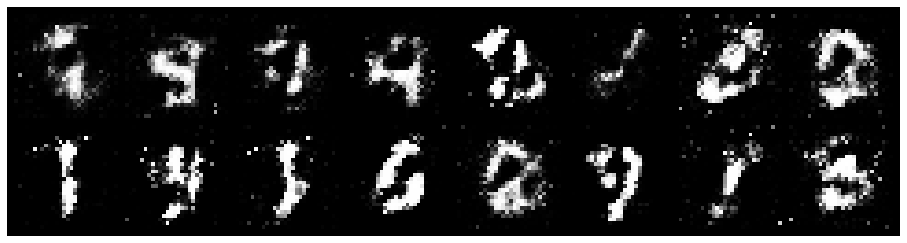

Epoch: [15/50], Batch Num: [200/600]
Discriminator Loss: 0.6889, Generator Loss: 2.2334
D(x): 0.8046, D(G(z)): 0.2348


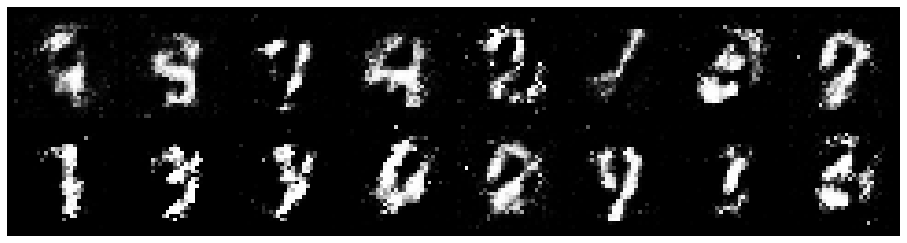

Epoch: [15/50], Batch Num: [300/600]
Discriminator Loss: 0.9168, Generator Loss: 1.6113
D(x): 0.8191, D(G(z)): 0.3928


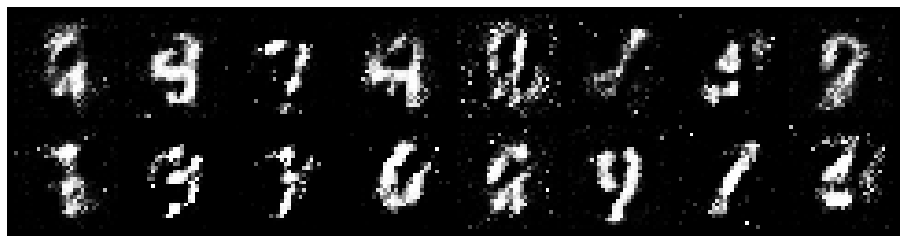

Epoch: [15/50], Batch Num: [400/600]
Discriminator Loss: 0.5411, Generator Loss: 2.6197
D(x): 0.8515, D(G(z)): 0.2306


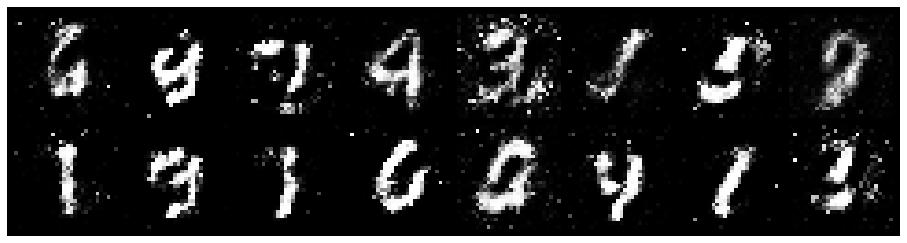

Epoch: [15/50], Batch Num: [500/600]
Discriminator Loss: 0.8431, Generator Loss: 1.9735
D(x): 0.7198, D(G(z)): 0.2471


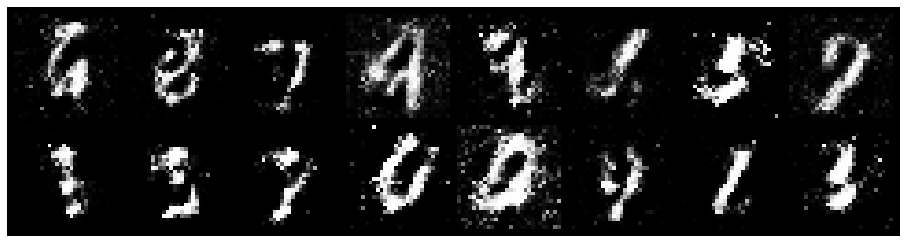

Epoch: [16/50], Batch Num: [0/600]
Discriminator Loss: 0.8525, Generator Loss: 1.9042
D(x): 0.7095, D(G(z)): 0.2800


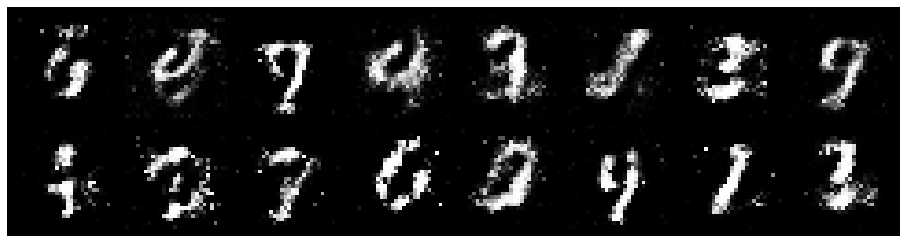

Epoch: [16/50], Batch Num: [100/600]
Discriminator Loss: 0.6596, Generator Loss: 2.2217
D(x): 0.7654, D(G(z)): 0.1841


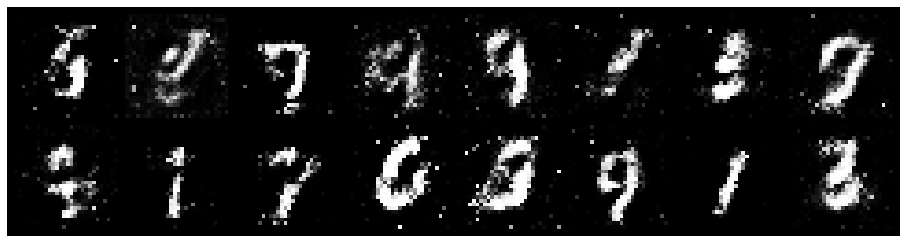

Epoch: [16/50], Batch Num: [200/600]
Discriminator Loss: 0.8957, Generator Loss: 1.7108
D(x): 0.7238, D(G(z)): 0.3079


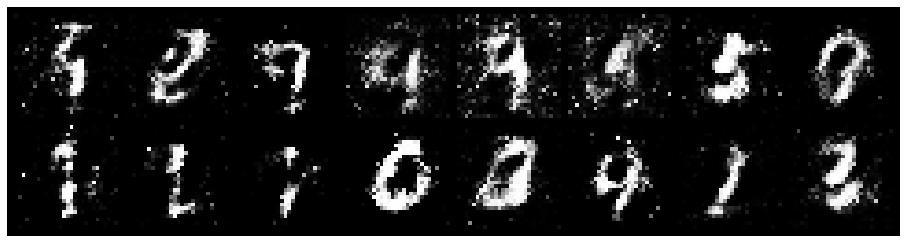

Epoch: [16/50], Batch Num: [300/600]
Discriminator Loss: 0.7006, Generator Loss: 2.1323
D(x): 0.7496, D(G(z)): 0.2163


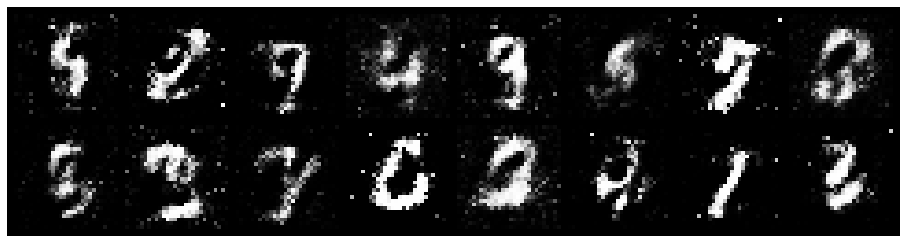

Epoch: [16/50], Batch Num: [400/600]
Discriminator Loss: 0.5739, Generator Loss: 3.0179
D(x): 0.7727, D(G(z)): 0.1748


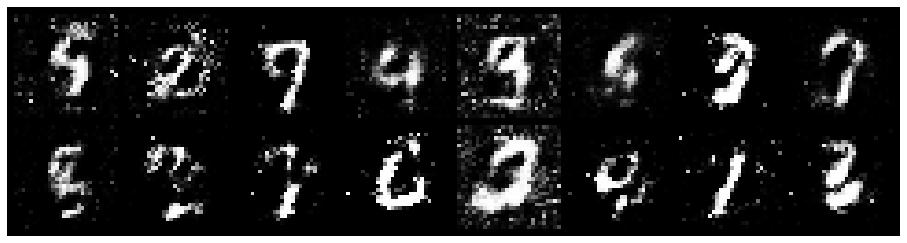

Epoch: [16/50], Batch Num: [500/600]
Discriminator Loss: 0.8263, Generator Loss: 2.1829
D(x): 0.6319, D(G(z)): 0.1253


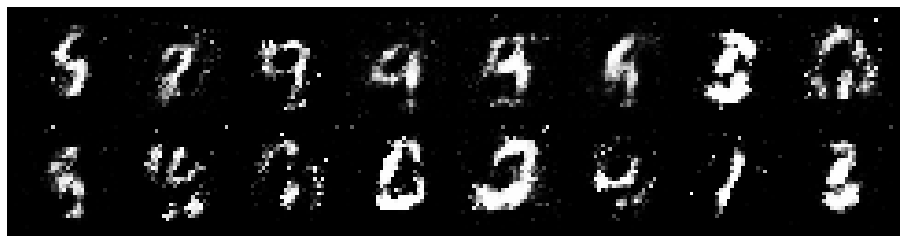

Epoch: [17/50], Batch Num: [0/600]
Discriminator Loss: 0.7633, Generator Loss: 1.9147
D(x): 0.7404, D(G(z)): 0.2317


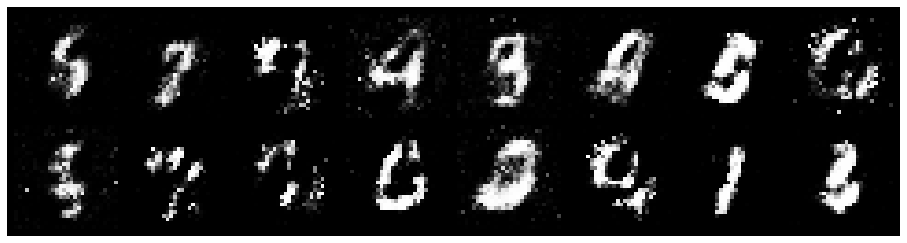

Epoch: [17/50], Batch Num: [100/600]
Discriminator Loss: 0.9209, Generator Loss: 1.7460
D(x): 0.7200, D(G(z)): 0.3122


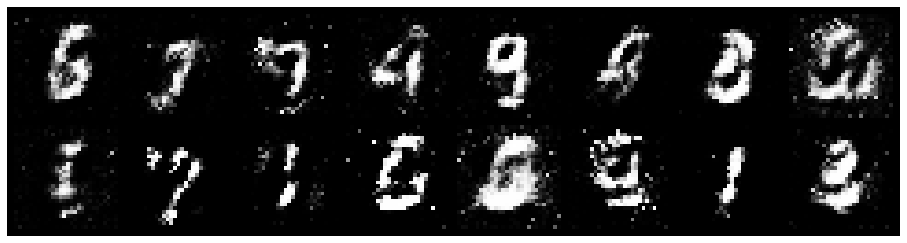

Epoch: [17/50], Batch Num: [200/600]
Discriminator Loss: 0.6997, Generator Loss: 2.0569
D(x): 0.7428, D(G(z)): 0.2311


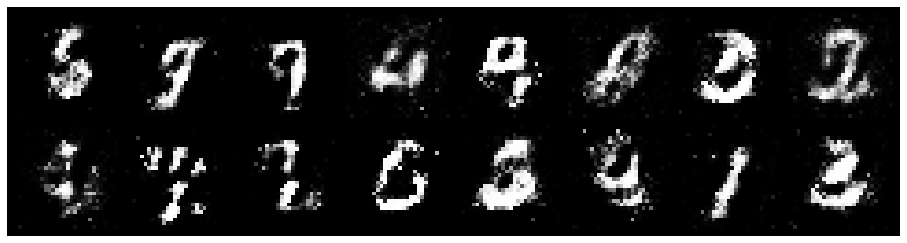

Epoch: [17/50], Batch Num: [300/600]
Discriminator Loss: 0.8416, Generator Loss: 1.8478
D(x): 0.7419, D(G(z)): 0.2919


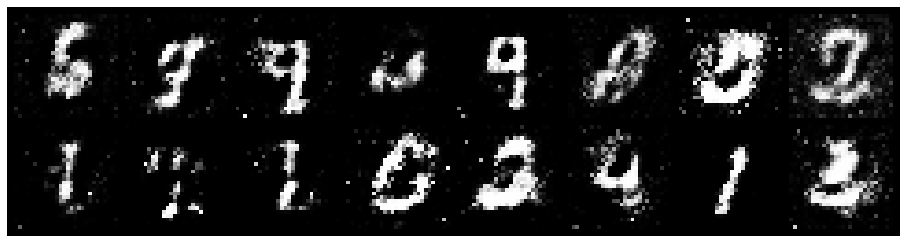

Epoch: [17/50], Batch Num: [400/600]
Discriminator Loss: 0.9744, Generator Loss: 1.5962
D(x): 0.7264, D(G(z)): 0.3415


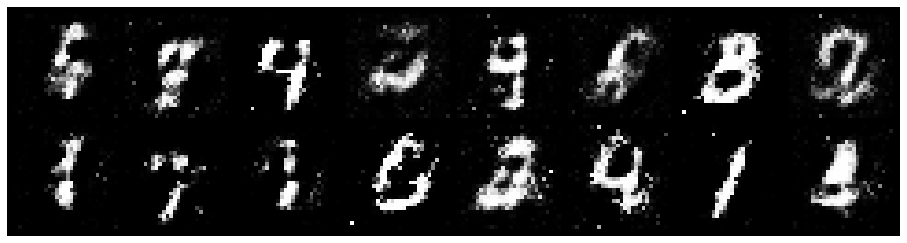

Epoch: [17/50], Batch Num: [500/600]
Discriminator Loss: 0.9239, Generator Loss: 2.1985
D(x): 0.6864, D(G(z)): 0.2368


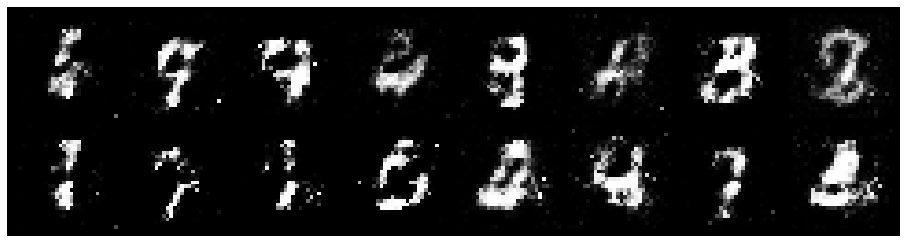

Epoch: [18/50], Batch Num: [0/600]
Discriminator Loss: 1.0137, Generator Loss: 1.7150
D(x): 0.7620, D(G(z)): 0.3939


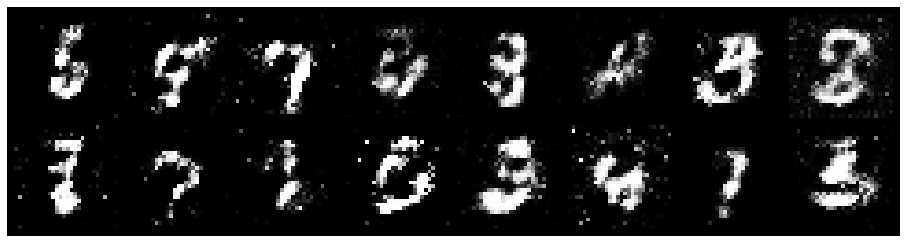

Epoch: [18/50], Batch Num: [100/600]
Discriminator Loss: 0.7479, Generator Loss: 1.9885
D(x): 0.7530, D(G(z)): 0.2458


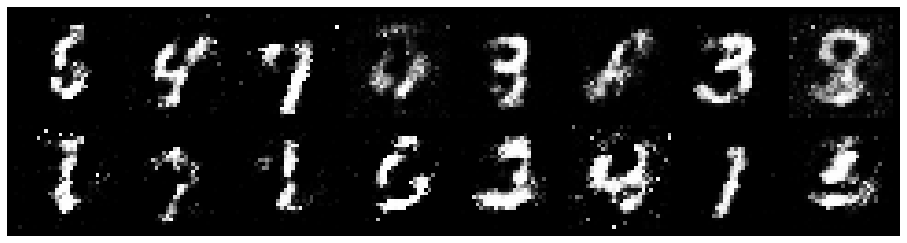

Epoch: [18/50], Batch Num: [200/600]
Discriminator Loss: 0.7061, Generator Loss: 1.7751
D(x): 0.7614, D(G(z)): 0.2442


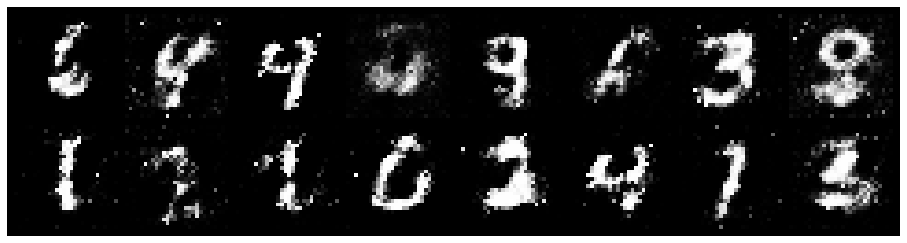

Epoch: [18/50], Batch Num: [300/600]
Discriminator Loss: 0.9768, Generator Loss: 1.6506
D(x): 0.6408, D(G(z)): 0.2638


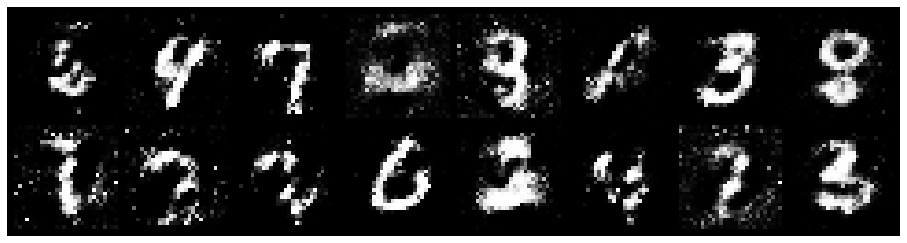

Epoch: [18/50], Batch Num: [400/600]
Discriminator Loss: 0.9660, Generator Loss: 1.5544
D(x): 0.6747, D(G(z)): 0.2868


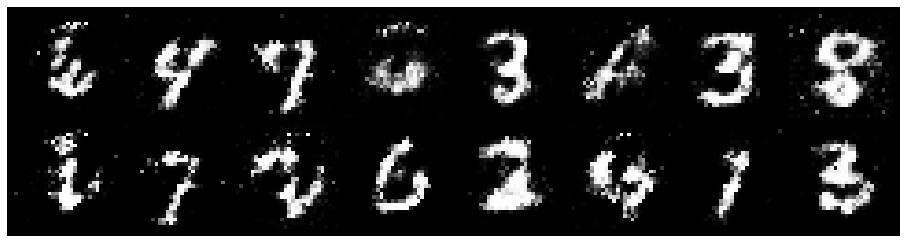

Epoch: [18/50], Batch Num: [500/600]
Discriminator Loss: 0.8065, Generator Loss: 1.6239
D(x): 0.7685, D(G(z)): 0.2915


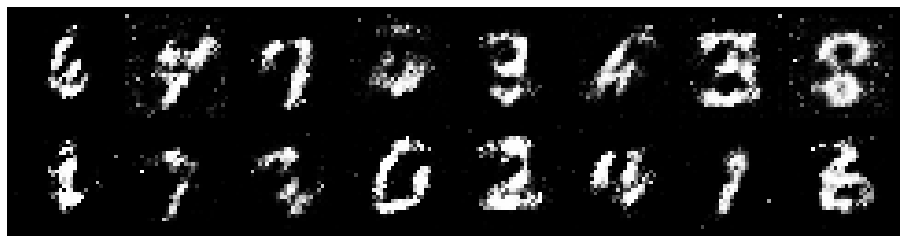

Epoch: [19/50], Batch Num: [0/600]
Discriminator Loss: 0.6983, Generator Loss: 1.8188
D(x): 0.7483, D(G(z)): 0.2290


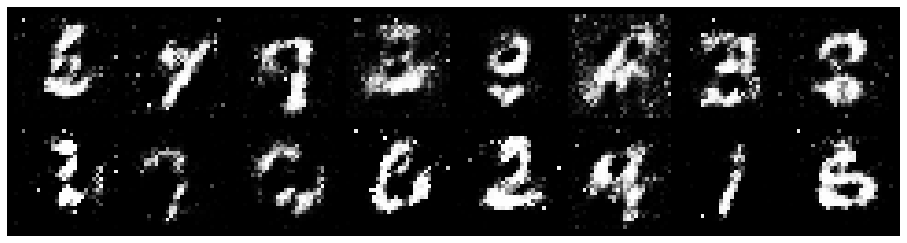

Epoch: [19/50], Batch Num: [100/600]
Discriminator Loss: 1.0923, Generator Loss: 1.2185
D(x): 0.6845, D(G(z)): 0.4040


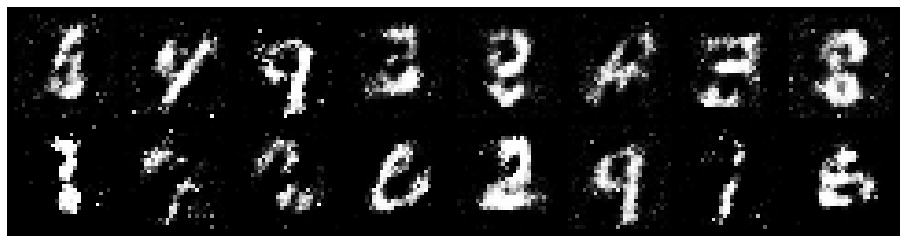

Epoch: [19/50], Batch Num: [200/600]
Discriminator Loss: 0.9936, Generator Loss: 1.5834
D(x): 0.6651, D(G(z)): 0.3031


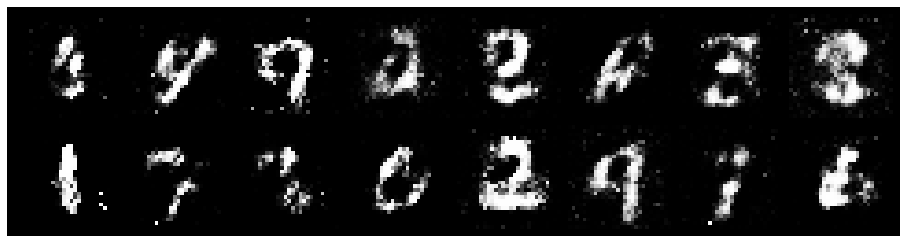

Epoch: [19/50], Batch Num: [300/600]
Discriminator Loss: 0.9869, Generator Loss: 1.8108
D(x): 0.6815, D(G(z)): 0.3040


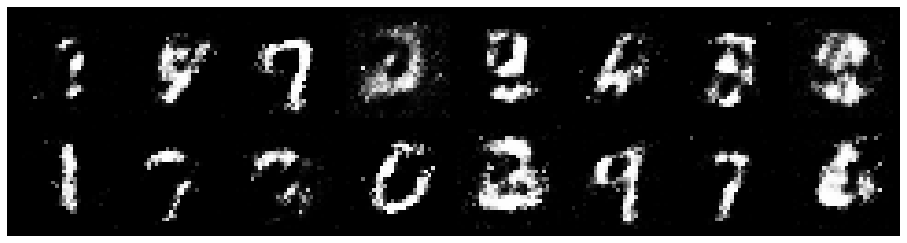

Epoch: [19/50], Batch Num: [400/600]
Discriminator Loss: 0.9710, Generator Loss: 1.2657
D(x): 0.6656, D(G(z)): 0.3239


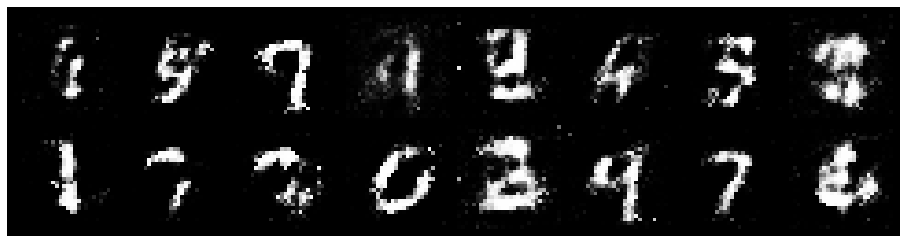

Epoch: [19/50], Batch Num: [500/600]
Discriminator Loss: 1.1571, Generator Loss: 1.3554
D(x): 0.6768, D(G(z)): 0.3891


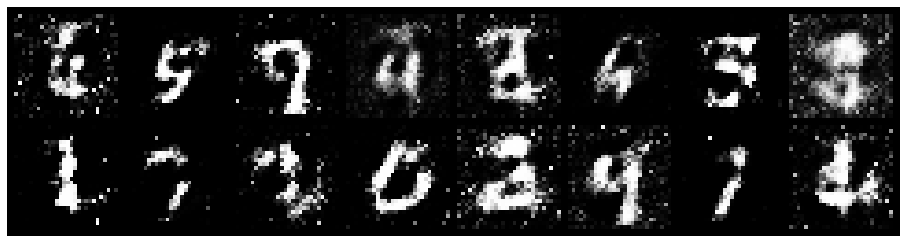

Epoch: [20/50], Batch Num: [0/600]
Discriminator Loss: 0.9481, Generator Loss: 1.4523
D(x): 0.7043, D(G(z)): 0.3535


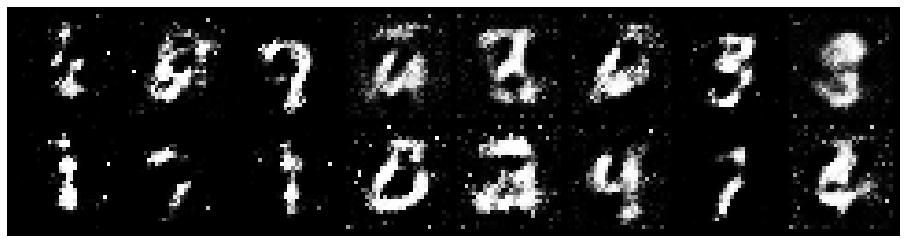

Epoch: [20/50], Batch Num: [100/600]
Discriminator Loss: 1.0325, Generator Loss: 0.8696
D(x): 0.7023, D(G(z)): 0.4201


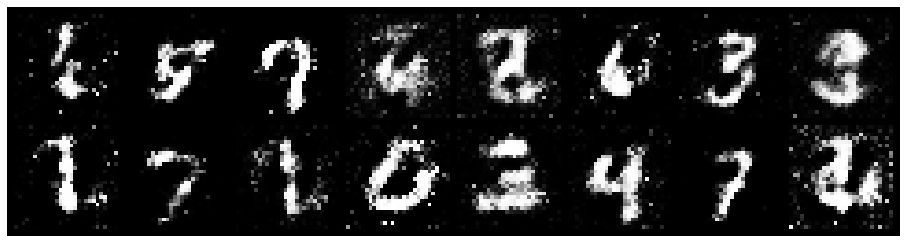

Epoch: [20/50], Batch Num: [200/600]
Discriminator Loss: 1.1127, Generator Loss: 1.6689
D(x): 0.6654, D(G(z)): 0.3571


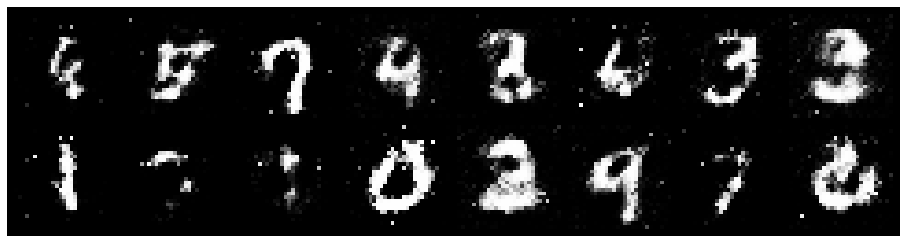

Epoch: [20/50], Batch Num: [300/600]
Discriminator Loss: 1.0244, Generator Loss: 1.2079
D(x): 0.7192, D(G(z)): 0.4155


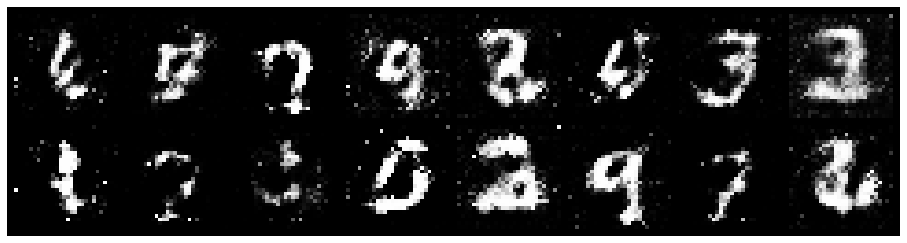

Epoch: [20/50], Batch Num: [400/600]
Discriminator Loss: 0.9312, Generator Loss: 1.1238
D(x): 0.7575, D(G(z)): 0.3945


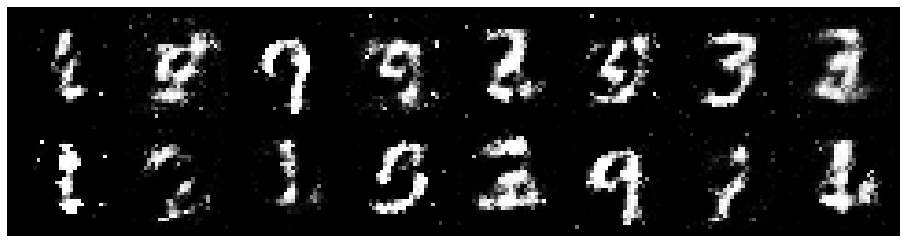

Epoch: [20/50], Batch Num: [500/600]
Discriminator Loss: 1.0091, Generator Loss: 1.4173
D(x): 0.6575, D(G(z)): 0.3254


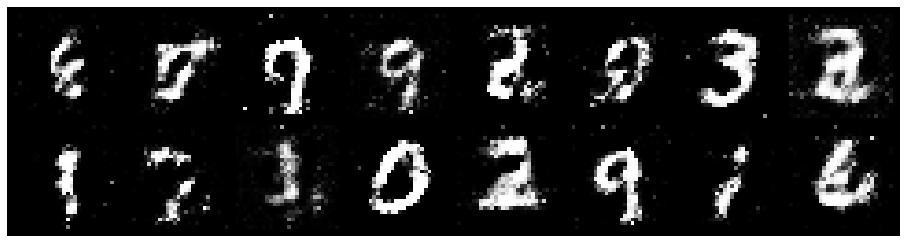

Epoch: [21/50], Batch Num: [0/600]
Discriminator Loss: 1.1194, Generator Loss: 1.5104
D(x): 0.6119, D(G(z)): 0.2835


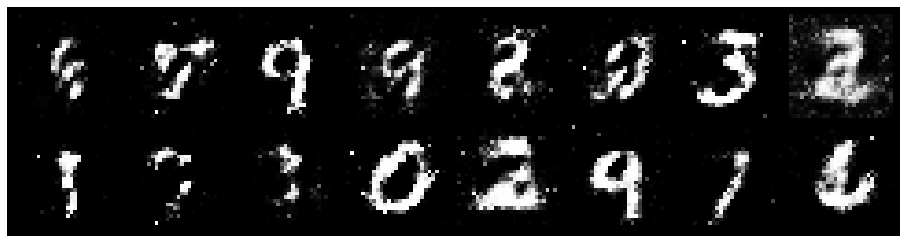

Epoch: [21/50], Batch Num: [100/600]
Discriminator Loss: 1.0766, Generator Loss: 1.1515
D(x): 0.6563, D(G(z)): 0.3668


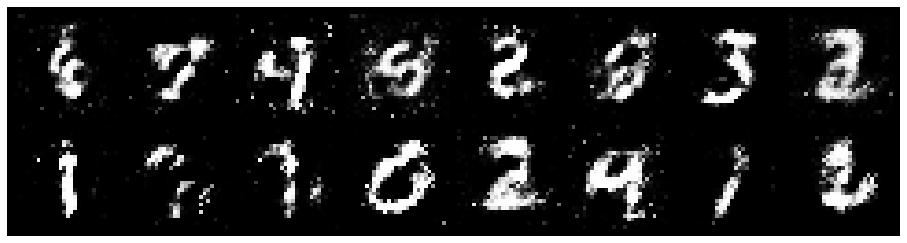

Epoch: [21/50], Batch Num: [200/600]
Discriminator Loss: 0.8427, Generator Loss: 1.3715
D(x): 0.7619, D(G(z)): 0.3320


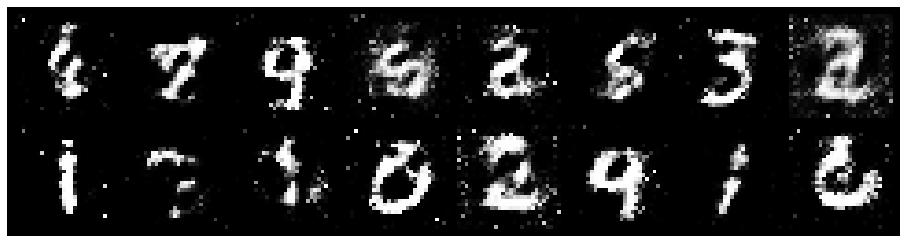

Epoch: [21/50], Batch Num: [300/600]
Discriminator Loss: 0.9887, Generator Loss: 1.4259
D(x): 0.7084, D(G(z)): 0.3126


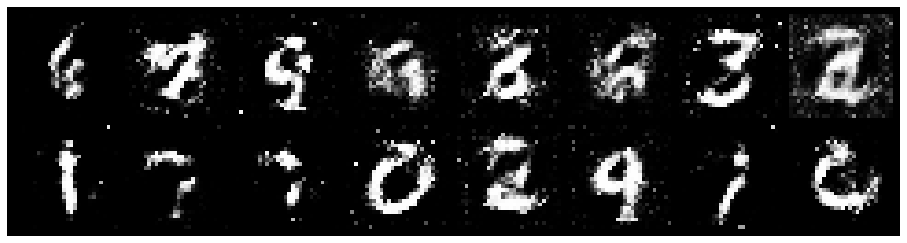

Epoch: [21/50], Batch Num: [400/600]
Discriminator Loss: 1.2804, Generator Loss: 1.4238
D(x): 0.7384, D(G(z)): 0.4479


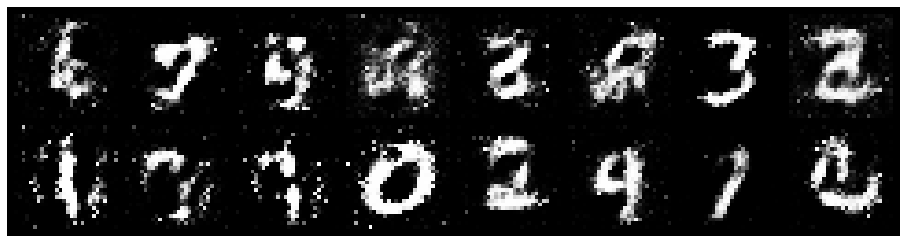

Epoch: [21/50], Batch Num: [500/600]
Discriminator Loss: 1.0546, Generator Loss: 1.3459
D(x): 0.7337, D(G(z)): 0.3949


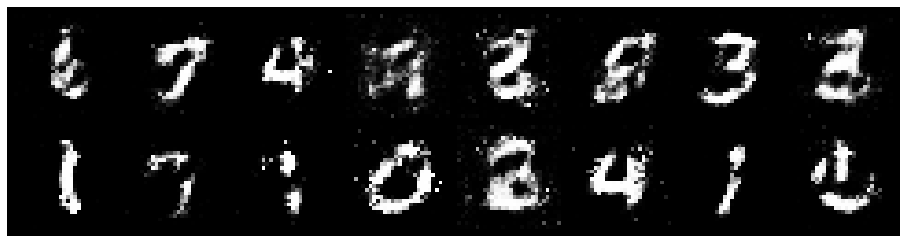

Epoch: [22/50], Batch Num: [0/600]
Discriminator Loss: 1.0182, Generator Loss: 1.1645
D(x): 0.7352, D(G(z)): 0.4034


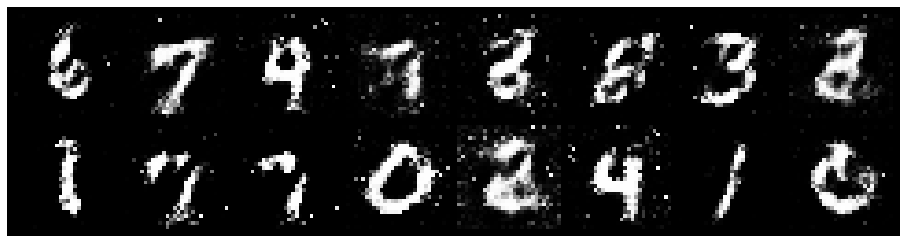

Epoch: [22/50], Batch Num: [100/600]
Discriminator Loss: 1.0047, Generator Loss: 1.5779
D(x): 0.7193, D(G(z)): 0.3446


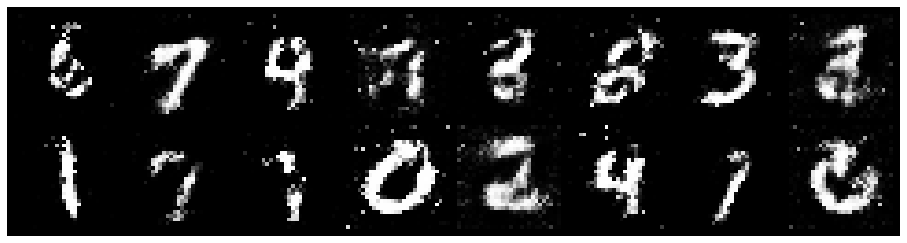

Epoch: [22/50], Batch Num: [200/600]
Discriminator Loss: 1.0137, Generator Loss: 1.4800
D(x): 0.6238, D(G(z)): 0.2907


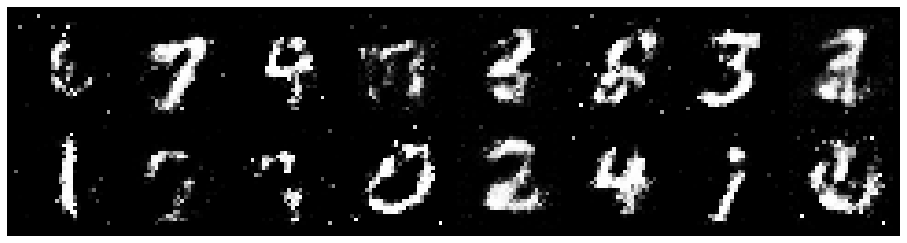

Epoch: [22/50], Batch Num: [300/600]
Discriminator Loss: 0.9016, Generator Loss: 1.5002
D(x): 0.6673, D(G(z)): 0.2596


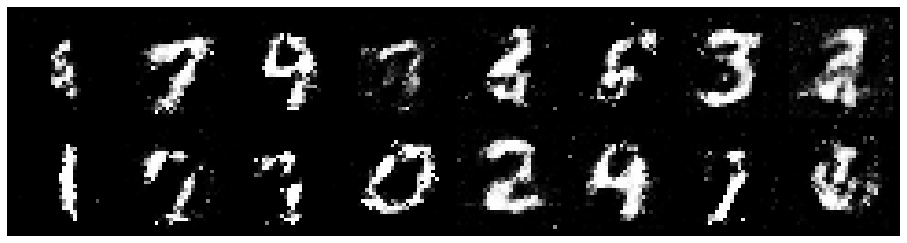

Epoch: [22/50], Batch Num: [400/600]
Discriminator Loss: 0.8048, Generator Loss: 1.3546
D(x): 0.7077, D(G(z)): 0.2952


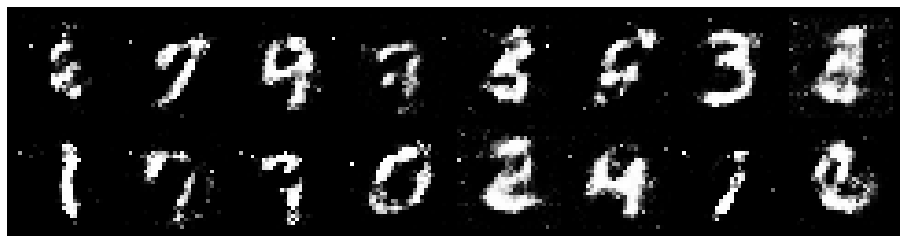

Epoch: [22/50], Batch Num: [500/600]
Discriminator Loss: 1.0770, Generator Loss: 1.3543
D(x): 0.6234, D(G(z)): 0.3511


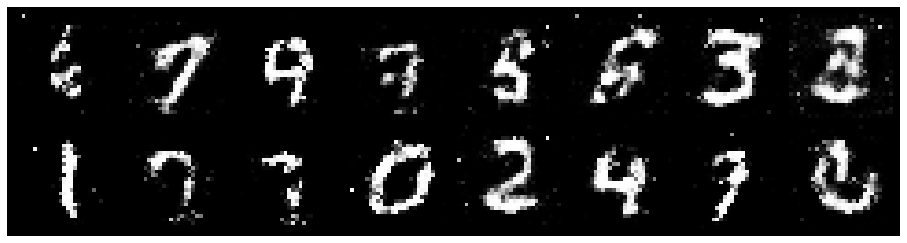

Epoch: [23/50], Batch Num: [0/600]
Discriminator Loss: 0.9039, Generator Loss: 1.6944
D(x): 0.7252, D(G(z)): 0.3050


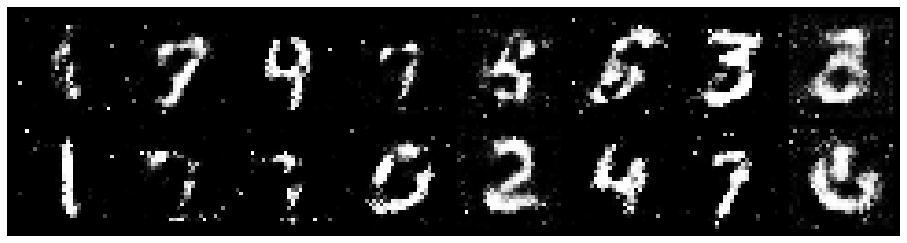

Epoch: [23/50], Batch Num: [100/600]
Discriminator Loss: 0.8970, Generator Loss: 1.8666
D(x): 0.7257, D(G(z)): 0.2916


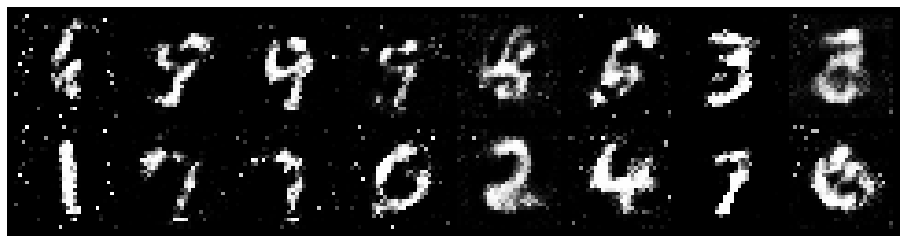

Epoch: [23/50], Batch Num: [200/600]
Discriminator Loss: 0.8003, Generator Loss: 1.4263
D(x): 0.6906, D(G(z)): 0.2684


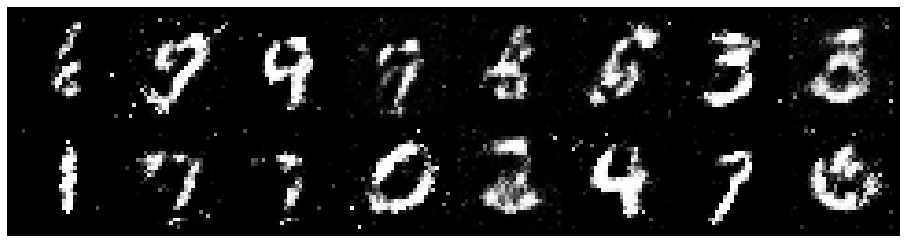

Epoch: [23/50], Batch Num: [300/600]
Discriminator Loss: 0.9207, Generator Loss: 1.2617
D(x): 0.7240, D(G(z)): 0.3355


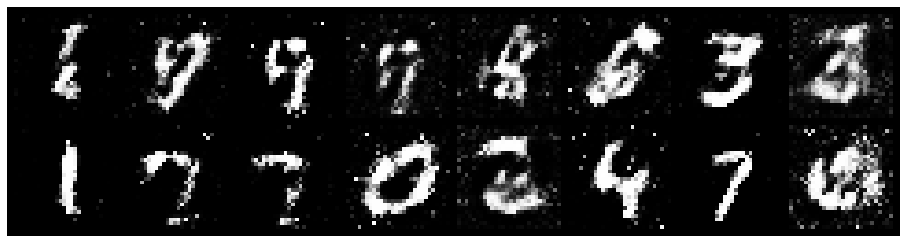

Epoch: [23/50], Batch Num: [400/600]
Discriminator Loss: 1.1134, Generator Loss: 1.5429
D(x): 0.6344, D(G(z)): 0.3253


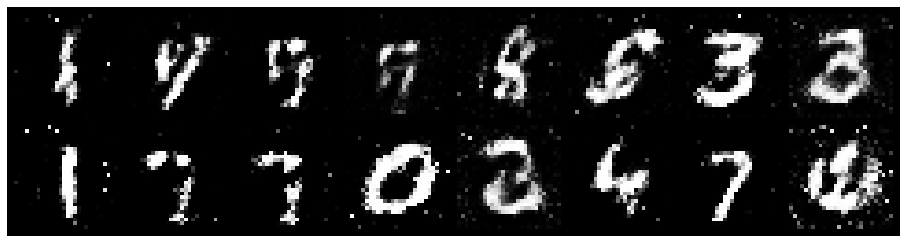

Epoch: [23/50], Batch Num: [500/600]
Discriminator Loss: 0.9739, Generator Loss: 1.1649
D(x): 0.7393, D(G(z)): 0.3787


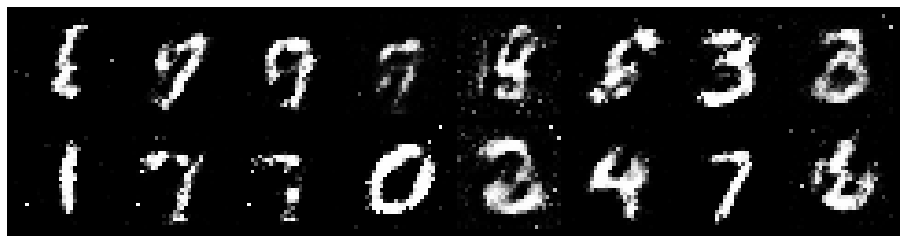

Epoch: [24/50], Batch Num: [0/600]
Discriminator Loss: 0.8828, Generator Loss: 1.3927
D(x): 0.6984, D(G(z)): 0.3113


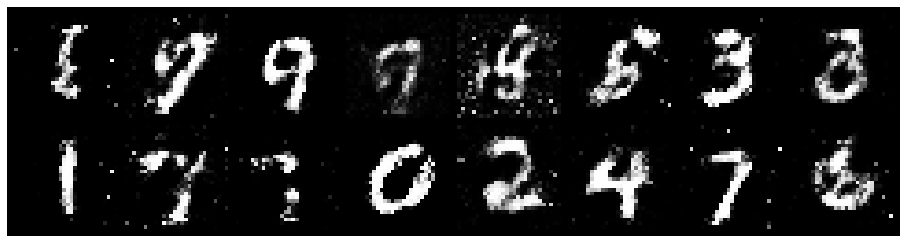

Epoch: [24/50], Batch Num: [100/600]
Discriminator Loss: 0.7800, Generator Loss: 1.6185
D(x): 0.7000, D(G(z)): 0.2458


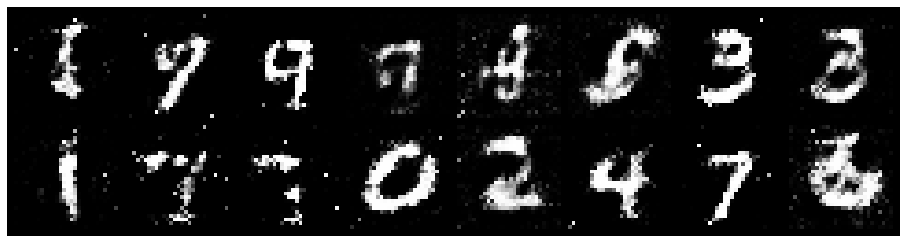

Epoch: [24/50], Batch Num: [200/600]
Discriminator Loss: 0.7395, Generator Loss: 2.0617
D(x): 0.7220, D(G(z)): 0.2482


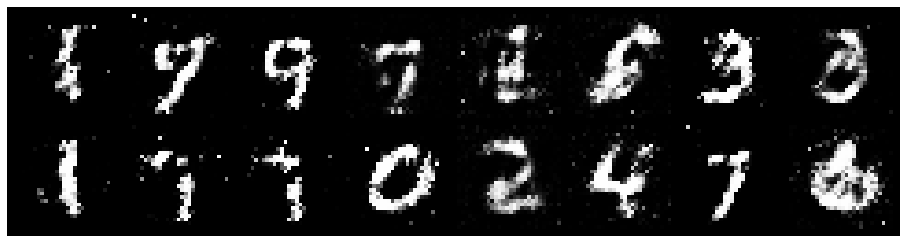

Epoch: [24/50], Batch Num: [300/600]
Discriminator Loss: 0.7941, Generator Loss: 1.8591
D(x): 0.6736, D(G(z)): 0.2407


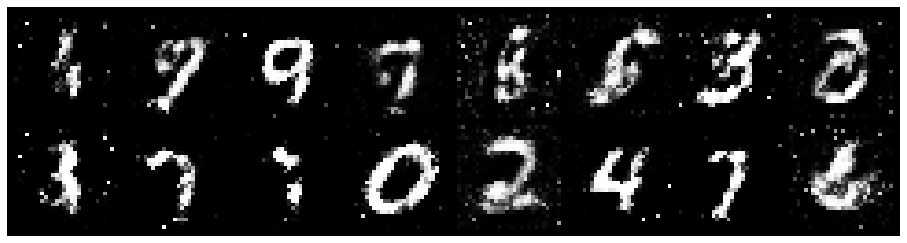

Epoch: [24/50], Batch Num: [400/600]
Discriminator Loss: 1.1436, Generator Loss: 1.4241
D(x): 0.6221, D(G(z)): 0.3552


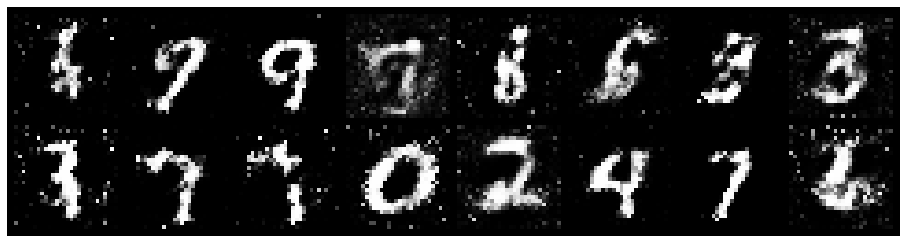

Epoch: [24/50], Batch Num: [500/600]
Discriminator Loss: 0.8492, Generator Loss: 1.3766
D(x): 0.7270, D(G(z)): 0.3455


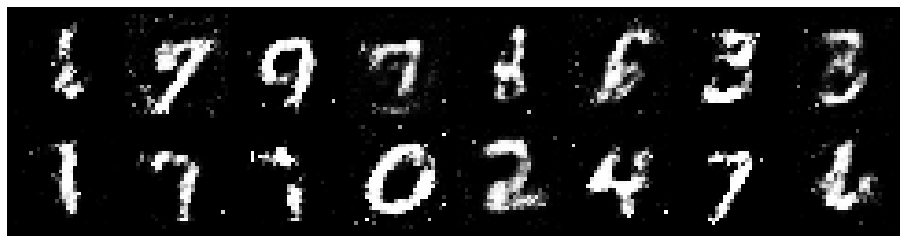

Epoch: [25/50], Batch Num: [0/600]
Discriminator Loss: 1.1171, Generator Loss: 1.6263
D(x): 0.6657, D(G(z)): 0.3781


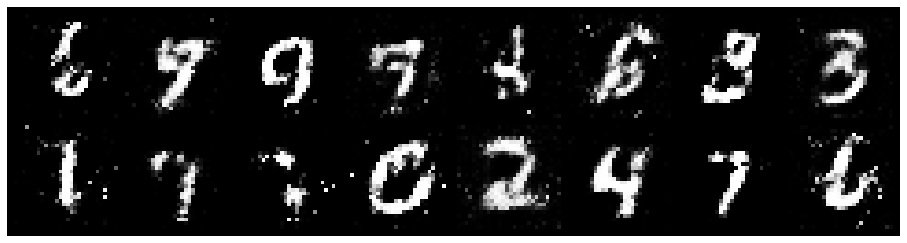

Epoch: [25/50], Batch Num: [100/600]
Discriminator Loss: 1.0578, Generator Loss: 1.2157
D(x): 0.6681, D(G(z)): 0.3564


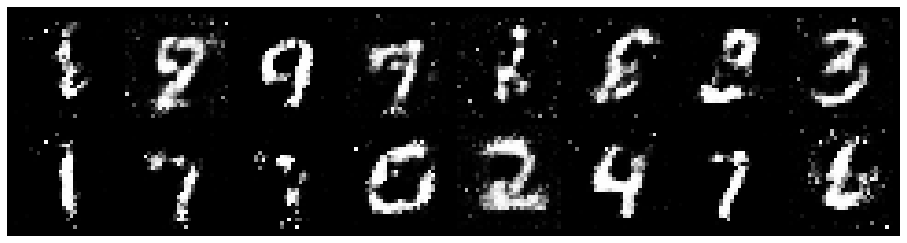

Epoch: [25/50], Batch Num: [200/600]
Discriminator Loss: 0.9802, Generator Loss: 1.3392
D(x): 0.7617, D(G(z)): 0.3913


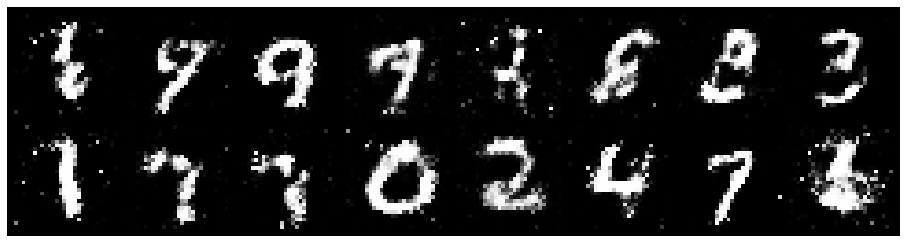

Epoch: [25/50], Batch Num: [300/600]
Discriminator Loss: 0.8642, Generator Loss: 1.6052
D(x): 0.7866, D(G(z)): 0.3567


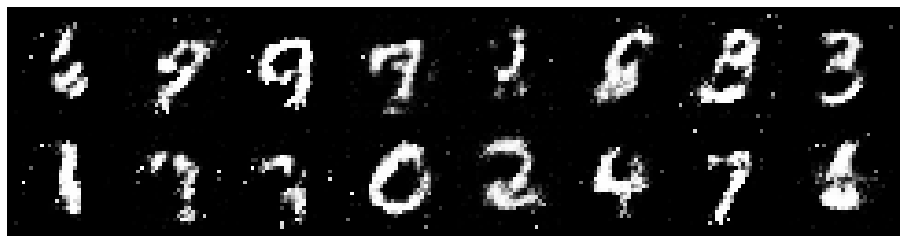

Epoch: [25/50], Batch Num: [400/600]
Discriminator Loss: 0.9270, Generator Loss: 1.5733
D(x): 0.6564, D(G(z)): 0.2985


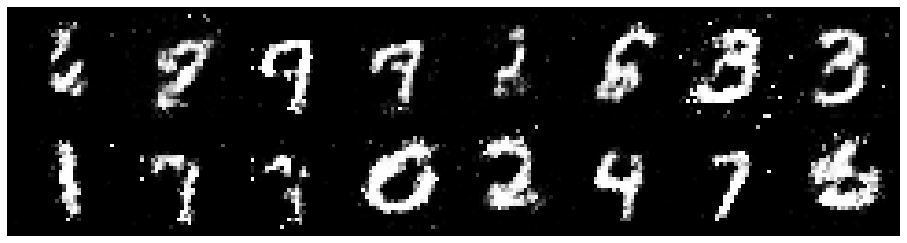

Epoch: [25/50], Batch Num: [500/600]
Discriminator Loss: 1.0743, Generator Loss: 1.1909
D(x): 0.6336, D(G(z)): 0.3460


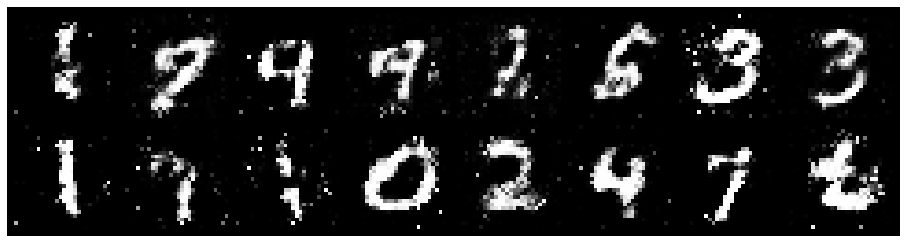

Epoch: [26/50], Batch Num: [0/600]
Discriminator Loss: 1.1976, Generator Loss: 1.3571
D(x): 0.6311, D(G(z)): 0.3640


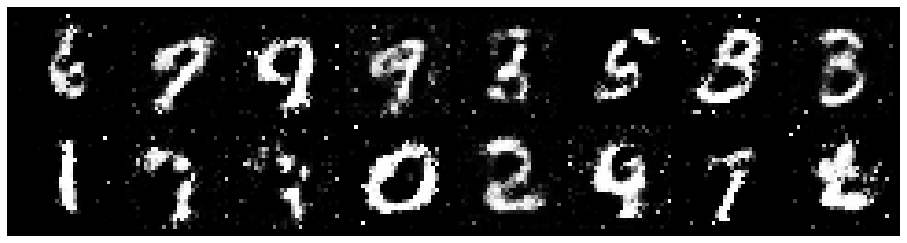

Epoch: [26/50], Batch Num: [100/600]
Discriminator Loss: 0.9819, Generator Loss: 1.5968
D(x): 0.6388, D(G(z)): 0.2987


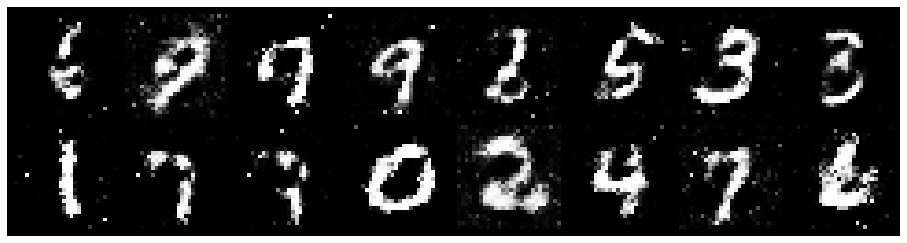

Epoch: [26/50], Batch Num: [200/600]
Discriminator Loss: 0.9472, Generator Loss: 1.3240
D(x): 0.6297, D(G(z)): 0.3067


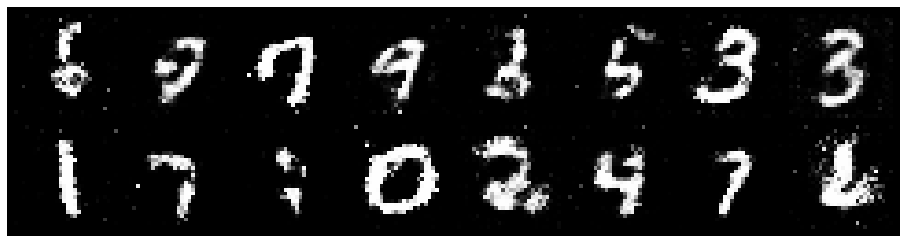

Epoch: [26/50], Batch Num: [300/600]
Discriminator Loss: 0.9612, Generator Loss: 1.1837
D(x): 0.6966, D(G(z)): 0.3668


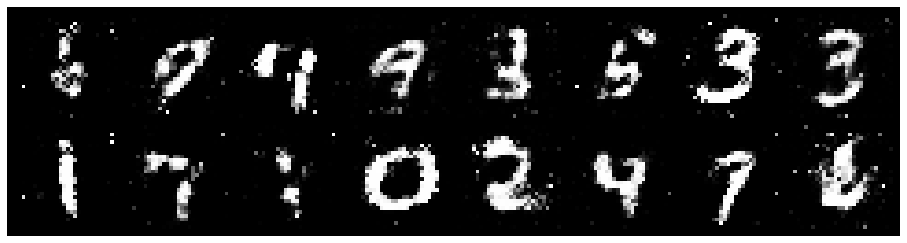

Epoch: [26/50], Batch Num: [400/600]
Discriminator Loss: 1.0908, Generator Loss: 1.3535
D(x): 0.5898, D(G(z)): 0.3179


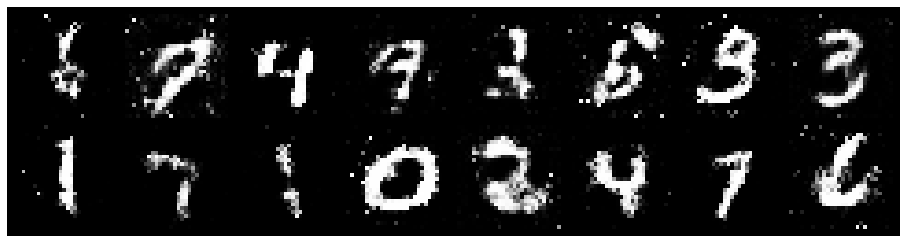

Epoch: [26/50], Batch Num: [500/600]
Discriminator Loss: 1.1156, Generator Loss: 1.2446
D(x): 0.6368, D(G(z)): 0.3952


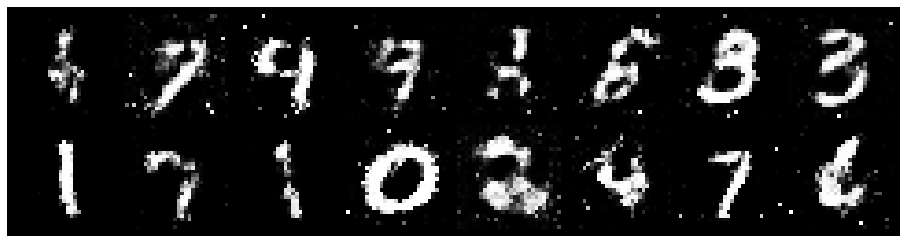

Epoch: [27/50], Batch Num: [0/600]
Discriminator Loss: 1.1921, Generator Loss: 0.9193
D(x): 0.6393, D(G(z)): 0.4266


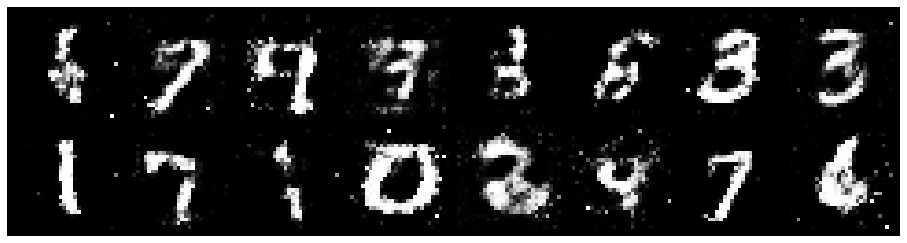

Epoch: [27/50], Batch Num: [100/600]
Discriminator Loss: 1.1651, Generator Loss: 1.1064
D(x): 0.6738, D(G(z)): 0.4212


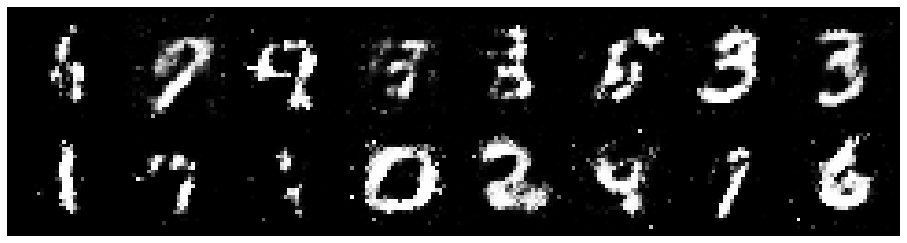

Epoch: [27/50], Batch Num: [200/600]
Discriminator Loss: 0.8201, Generator Loss: 1.7208
D(x): 0.7195, D(G(z)): 0.2652


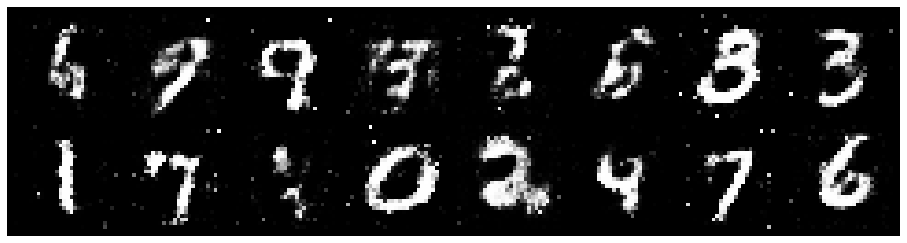

Epoch: [27/50], Batch Num: [300/600]
Discriminator Loss: 1.0652, Generator Loss: 1.5885
D(x): 0.6298, D(G(z)): 0.3032


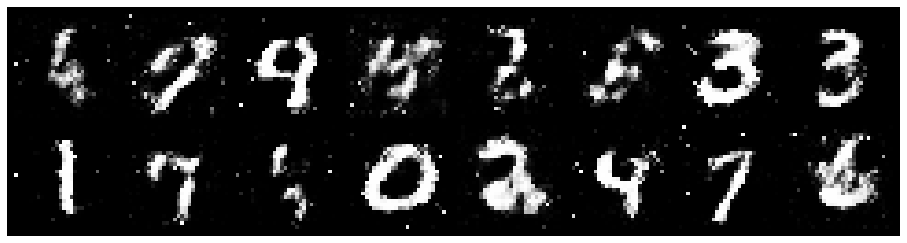

Epoch: [27/50], Batch Num: [400/600]
Discriminator Loss: 1.1276, Generator Loss: 1.2881
D(x): 0.6247, D(G(z)): 0.3560


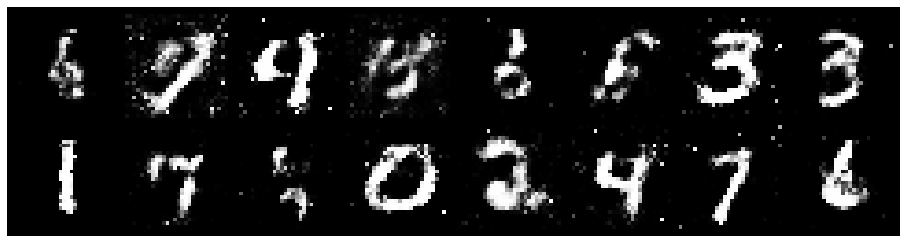

Epoch: [27/50], Batch Num: [500/600]
Discriminator Loss: 1.0851, Generator Loss: 1.2814
D(x): 0.6169, D(G(z)): 0.3308


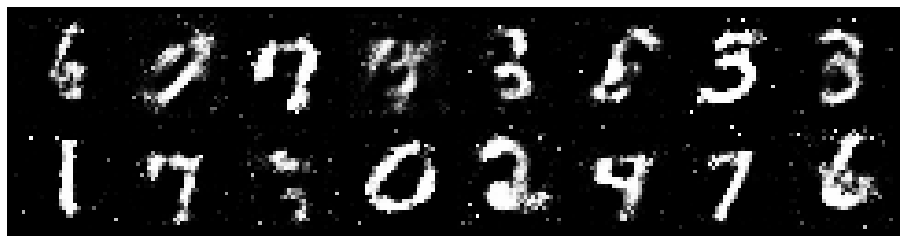

Epoch: [28/50], Batch Num: [0/600]
Discriminator Loss: 1.1021, Generator Loss: 1.2143
D(x): 0.6449, D(G(z)): 0.3769


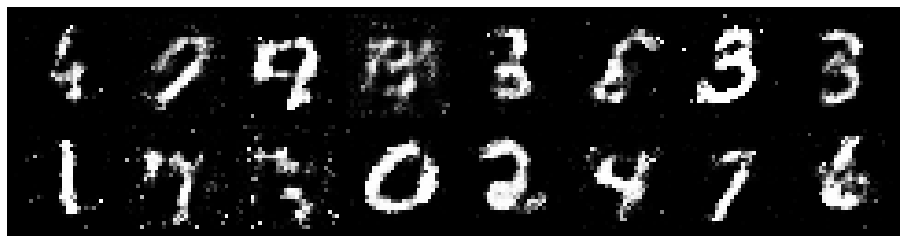

Epoch: [28/50], Batch Num: [100/600]
Discriminator Loss: 1.0957, Generator Loss: 1.3304
D(x): 0.6301, D(G(z)): 0.3557


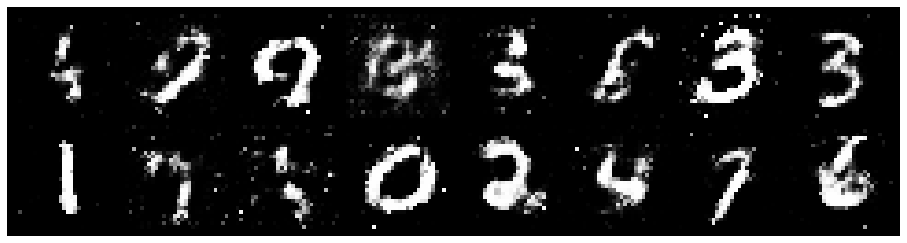

Epoch: [28/50], Batch Num: [200/600]
Discriminator Loss: 1.3577, Generator Loss: 1.4823
D(x): 0.5970, D(G(z)): 0.4171


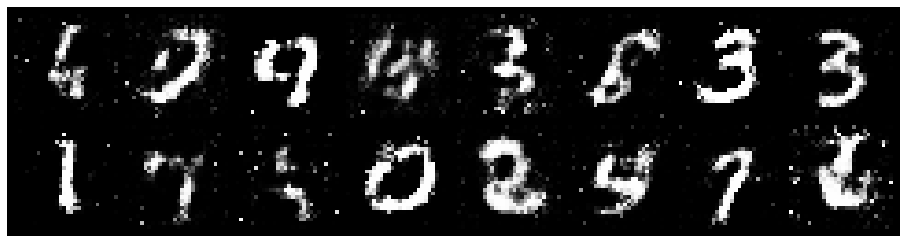

Epoch: [28/50], Batch Num: [300/600]
Discriminator Loss: 0.9937, Generator Loss: 1.4273
D(x): 0.7998, D(G(z)): 0.4319


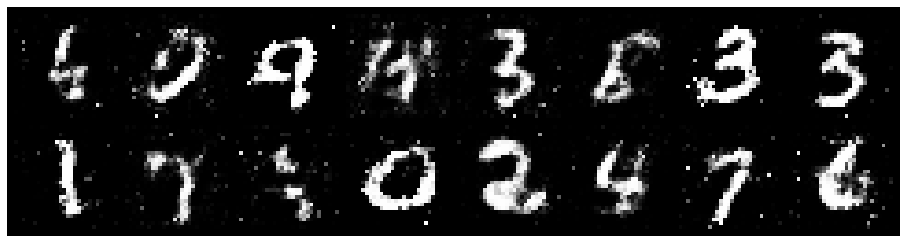

Epoch: [28/50], Batch Num: [400/600]
Discriminator Loss: 1.0657, Generator Loss: 1.1102
D(x): 0.6926, D(G(z)): 0.3976


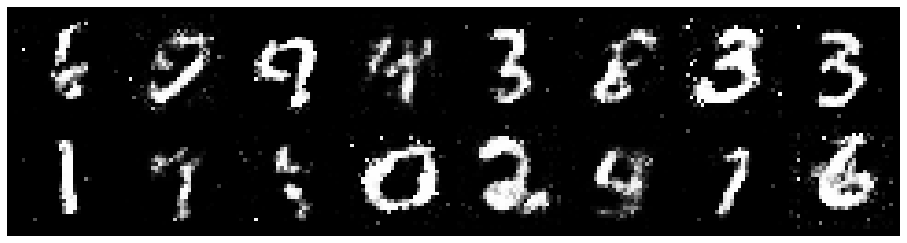

Epoch: [28/50], Batch Num: [500/600]
Discriminator Loss: 1.2040, Generator Loss: 1.3162
D(x): 0.7102, D(G(z)): 0.4666


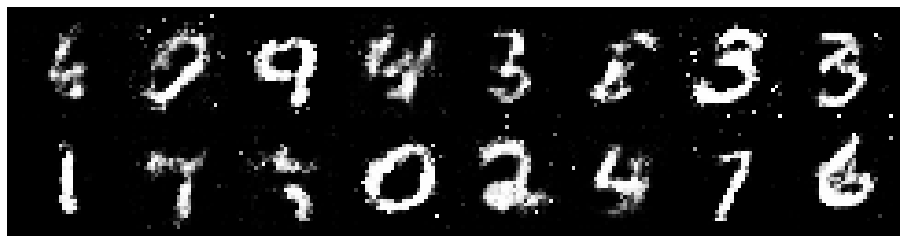

Epoch: [29/50], Batch Num: [0/600]
Discriminator Loss: 1.2428, Generator Loss: 1.3790
D(x): 0.5535, D(G(z)): 0.3039


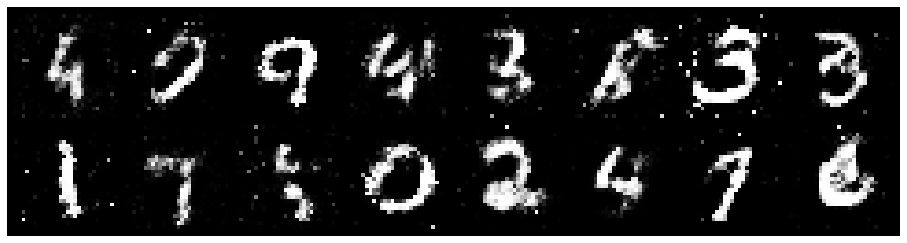

Epoch: [29/50], Batch Num: [100/600]
Discriminator Loss: 1.0451, Generator Loss: 1.7772
D(x): 0.6039, D(G(z)): 0.2878


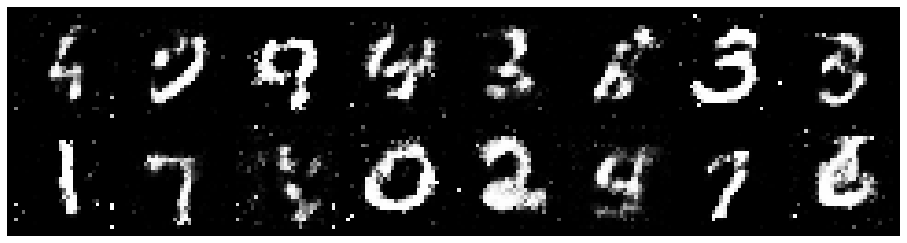

Epoch: [29/50], Batch Num: [200/600]
Discriminator Loss: 0.9049, Generator Loss: 1.4378
D(x): 0.6997, D(G(z)): 0.3262


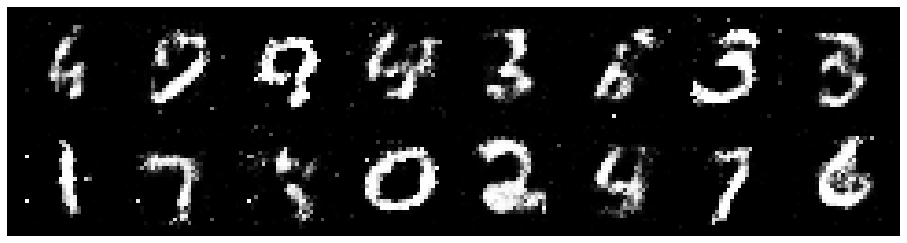

Epoch: [29/50], Batch Num: [300/600]
Discriminator Loss: 1.0432, Generator Loss: 1.3017
D(x): 0.6582, D(G(z)): 0.3533


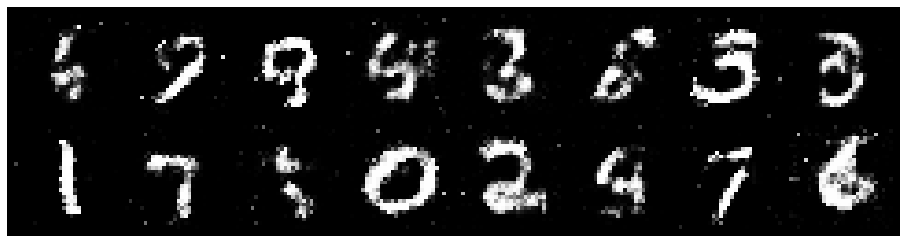

Epoch: [29/50], Batch Num: [400/600]
Discriminator Loss: 0.9977, Generator Loss: 1.6190
D(x): 0.6908, D(G(z)): 0.3702


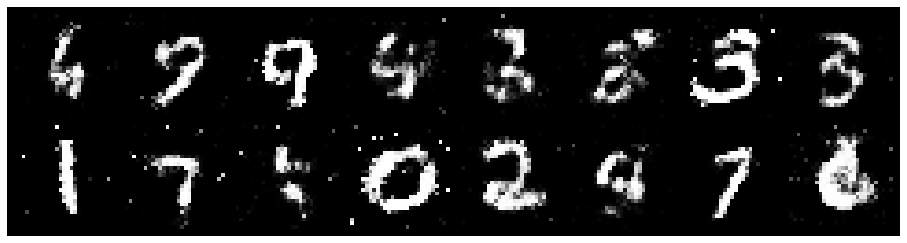

Epoch: [29/50], Batch Num: [500/600]
Discriminator Loss: 0.9600, Generator Loss: 1.3381
D(x): 0.6638, D(G(z)): 0.2956


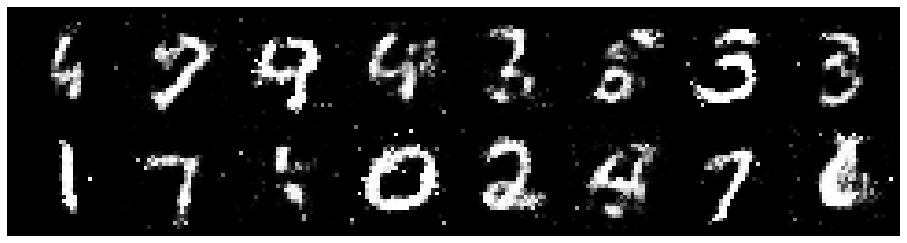

Epoch: [30/50], Batch Num: [0/600]
Discriminator Loss: 1.0183, Generator Loss: 1.3881
D(x): 0.6396, D(G(z)): 0.3395


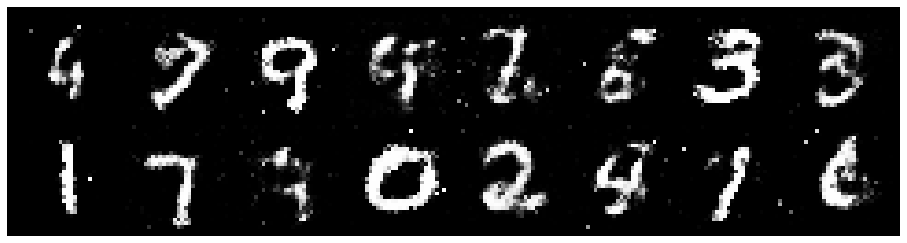

Epoch: [30/50], Batch Num: [100/600]
Discriminator Loss: 1.0857, Generator Loss: 1.4899
D(x): 0.6494, D(G(z)): 0.3529


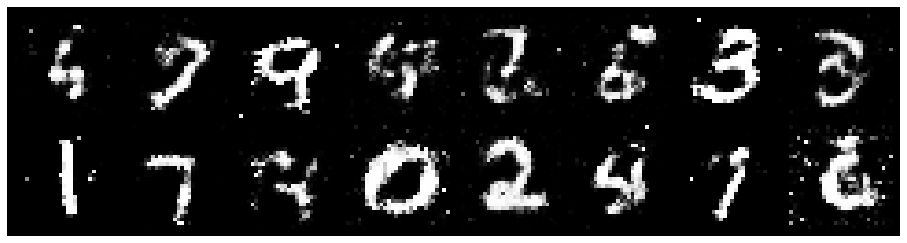

Epoch: [30/50], Batch Num: [200/600]
Discriminator Loss: 1.1398, Generator Loss: 1.1578
D(x): 0.6344, D(G(z)): 0.4035


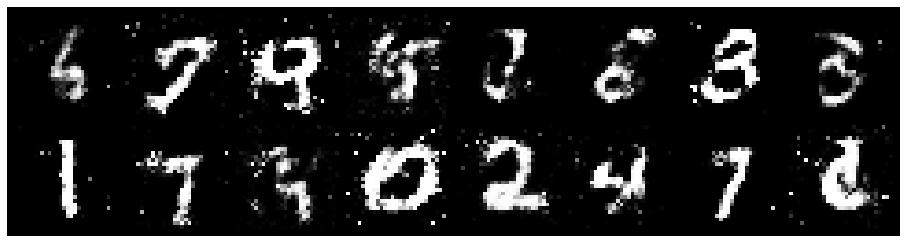

Epoch: [30/50], Batch Num: [300/600]
Discriminator Loss: 1.0732, Generator Loss: 1.1061
D(x): 0.6165, D(G(z)): 0.3408


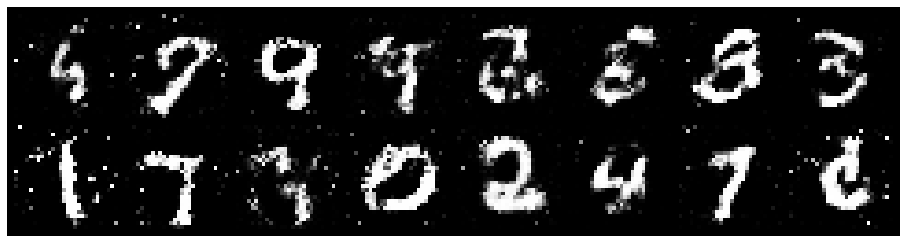

Epoch: [30/50], Batch Num: [400/600]
Discriminator Loss: 1.0546, Generator Loss: 0.9846
D(x): 0.6383, D(G(z)): 0.3635


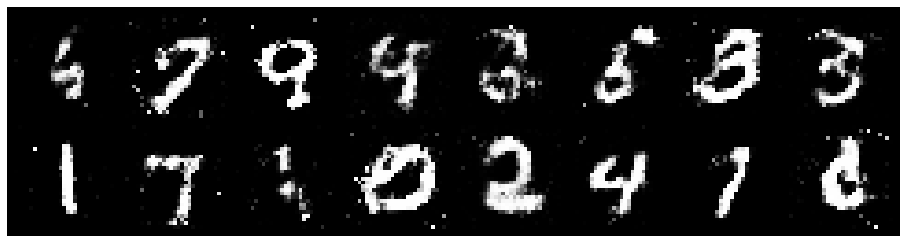

Epoch: [30/50], Batch Num: [500/600]
Discriminator Loss: 1.0399, Generator Loss: 1.1859
D(x): 0.6536, D(G(z)): 0.3465


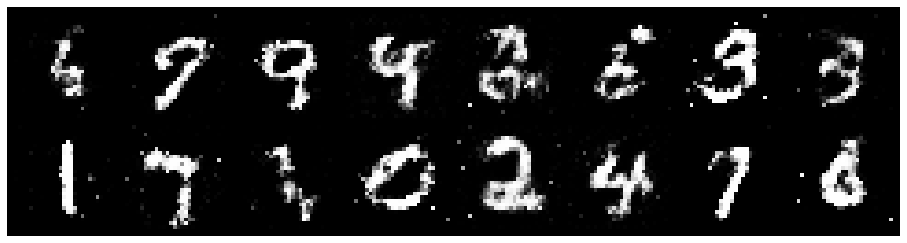

Epoch: [31/50], Batch Num: [0/600]
Discriminator Loss: 1.0385, Generator Loss: 1.3140
D(x): 0.6584, D(G(z)): 0.3570


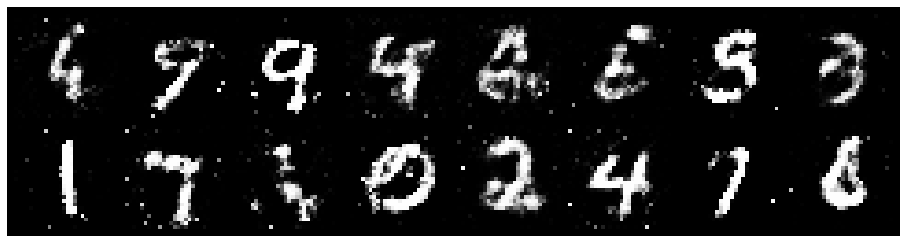

Epoch: [31/50], Batch Num: [100/600]
Discriminator Loss: 1.0819, Generator Loss: 1.3142
D(x): 0.6456, D(G(z)): 0.3629


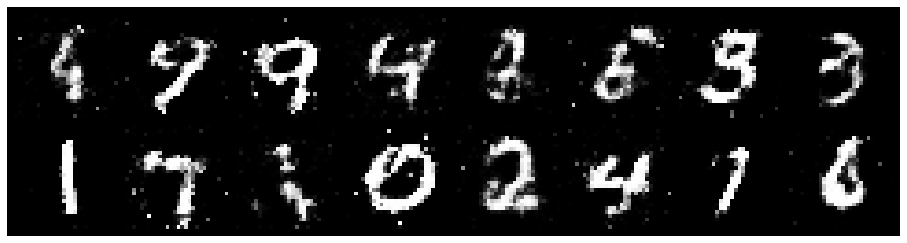

Epoch: [31/50], Batch Num: [200/600]
Discriminator Loss: 1.0323, Generator Loss: 1.3624
D(x): 0.6184, D(G(z)): 0.3026


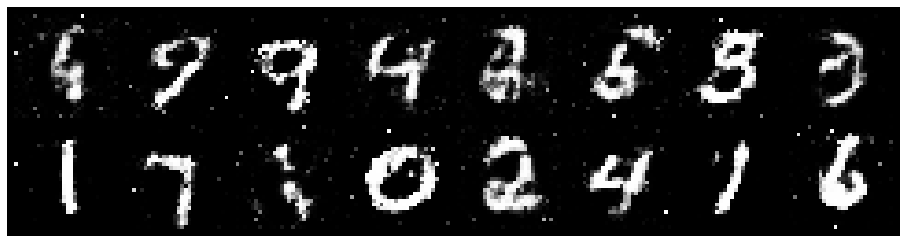

Epoch: [31/50], Batch Num: [300/600]
Discriminator Loss: 1.0484, Generator Loss: 1.3239
D(x): 0.6482, D(G(z)): 0.3364


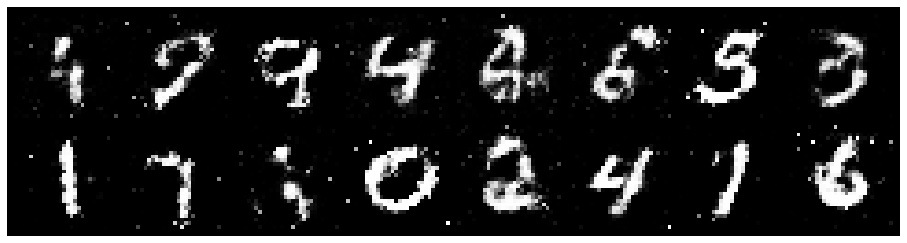

Epoch: [31/50], Batch Num: [400/600]
Discriminator Loss: 0.9294, Generator Loss: 1.2934
D(x): 0.7548, D(G(z)): 0.3791


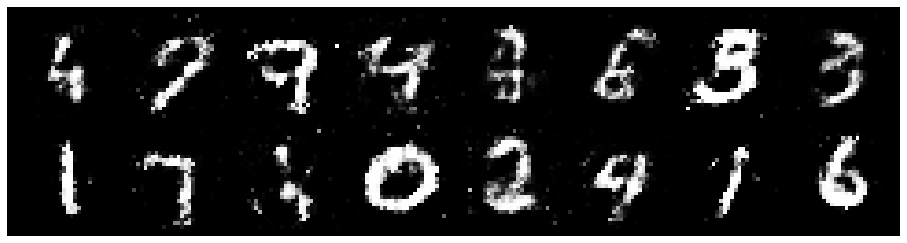

Epoch: [31/50], Batch Num: [500/600]
Discriminator Loss: 1.0301, Generator Loss: 1.3110
D(x): 0.6437, D(G(z)): 0.3560


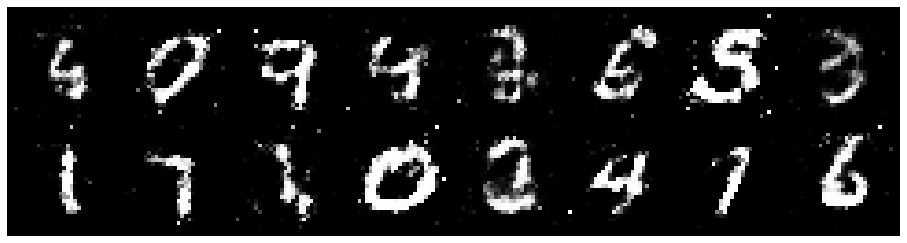

Epoch: [32/50], Batch Num: [0/600]
Discriminator Loss: 0.9735, Generator Loss: 1.4067
D(x): 0.6649, D(G(z)): 0.3407


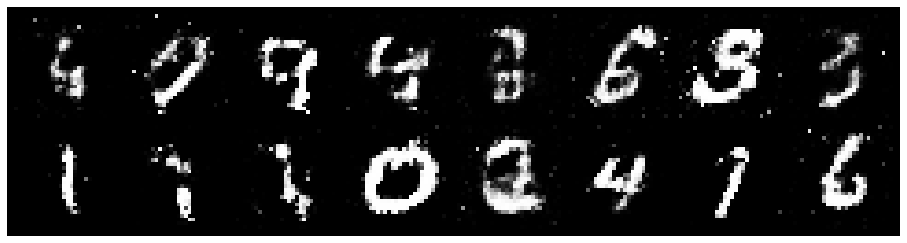

Epoch: [32/50], Batch Num: [100/600]
Discriminator Loss: 1.0247, Generator Loss: 0.9883
D(x): 0.6391, D(G(z)): 0.3613


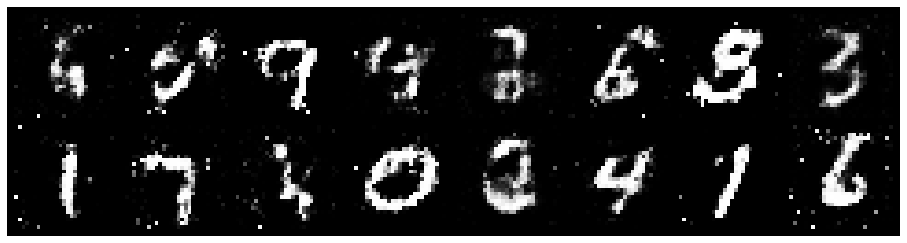

Epoch: [32/50], Batch Num: [200/600]
Discriminator Loss: 0.8376, Generator Loss: 1.6217
D(x): 0.7069, D(G(z)): 0.3071


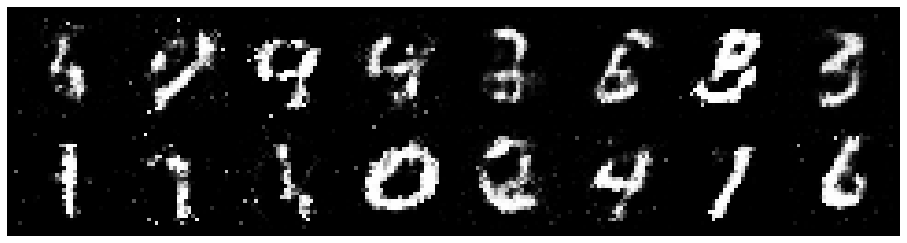

Epoch: [32/50], Batch Num: [300/600]
Discriminator Loss: 1.0006, Generator Loss: 1.0554
D(x): 0.6161, D(G(z)): 0.3276


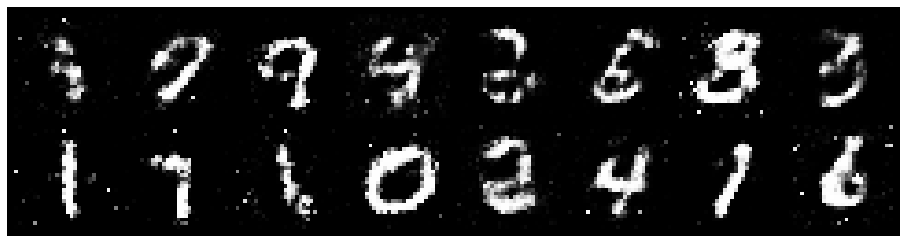

Epoch: [32/50], Batch Num: [400/600]
Discriminator Loss: 1.1249, Generator Loss: 1.0753
D(x): 0.6874, D(G(z)): 0.4217


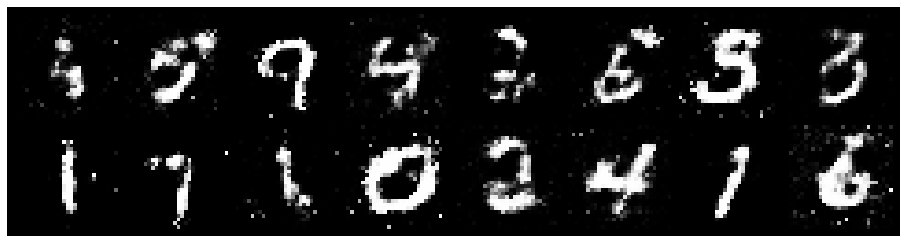

Epoch: [32/50], Batch Num: [500/600]
Discriminator Loss: 1.2613, Generator Loss: 1.4575
D(x): 0.6118, D(G(z)): 0.4066


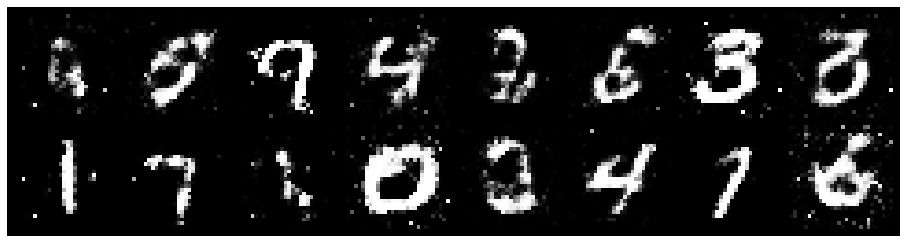

Epoch: [33/50], Batch Num: [0/600]
Discriminator Loss: 1.1196, Generator Loss: 1.1568
D(x): 0.6215, D(G(z)): 0.3618


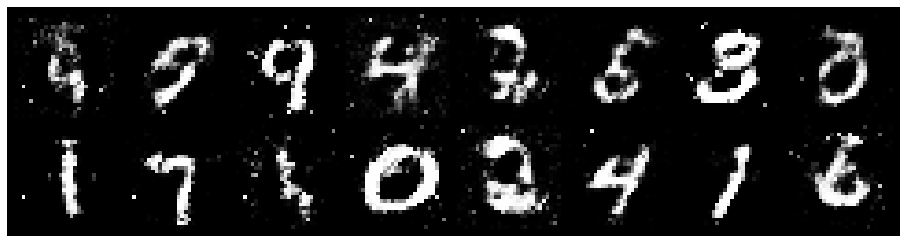

Epoch: [33/50], Batch Num: [100/600]
Discriminator Loss: 1.2145, Generator Loss: 1.2845
D(x): 0.5429, D(G(z)): 0.3392


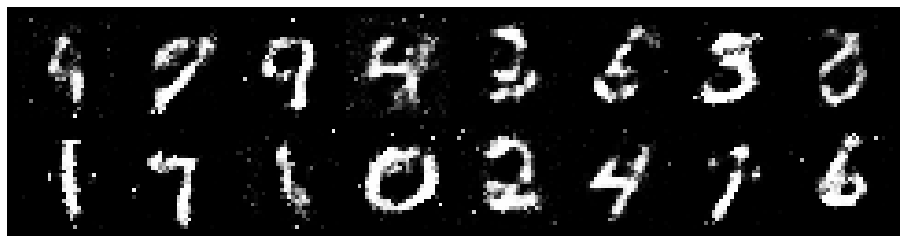

Epoch: [33/50], Batch Num: [200/600]
Discriminator Loss: 1.0409, Generator Loss: 1.2565
D(x): 0.6715, D(G(z)): 0.3451


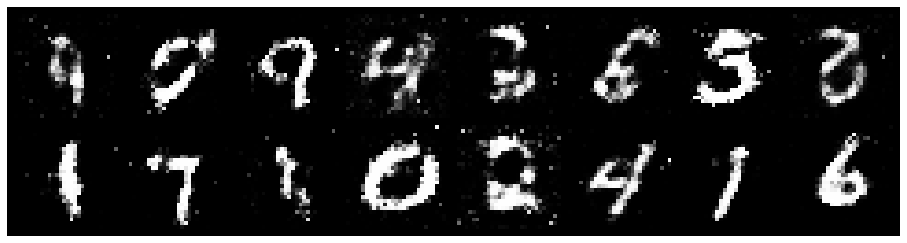

Epoch: [33/50], Batch Num: [300/600]
Discriminator Loss: 0.9519, Generator Loss: 1.4145
D(x): 0.6733, D(G(z)): 0.3204


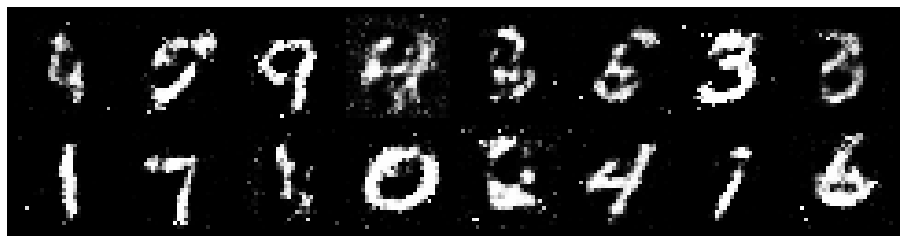

Epoch: [33/50], Batch Num: [400/600]
Discriminator Loss: 1.0405, Generator Loss: 1.3076
D(x): 0.5932, D(G(z)): 0.3053


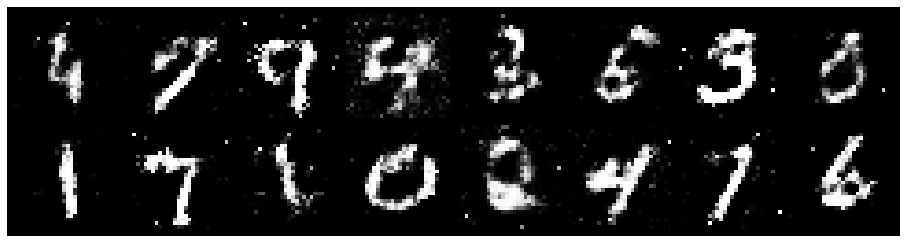

Epoch: [33/50], Batch Num: [500/600]
Discriminator Loss: 1.0966, Generator Loss: 1.2944
D(x): 0.5872, D(G(z)): 0.3573


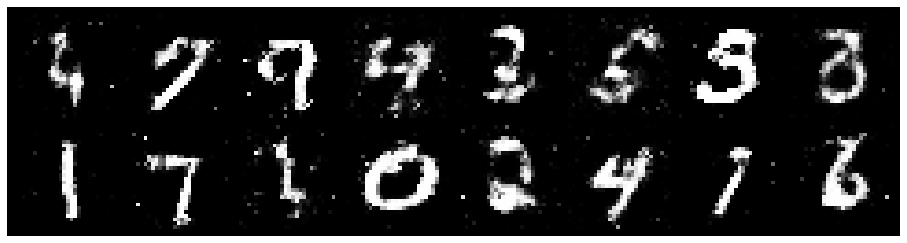

Epoch: [34/50], Batch Num: [0/600]
Discriminator Loss: 1.3165, Generator Loss: 1.2935
D(x): 0.5769, D(G(z)): 0.3531


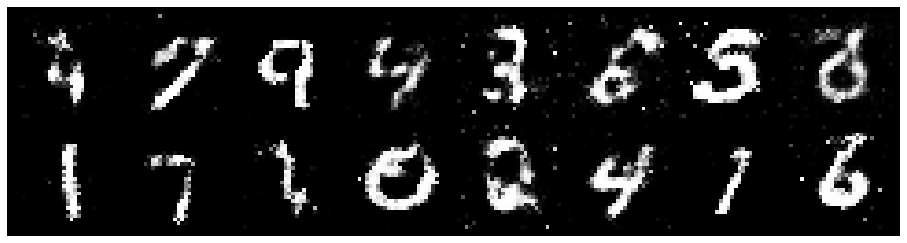

Epoch: [34/50], Batch Num: [100/600]
Discriminator Loss: 1.0597, Generator Loss: 1.2140
D(x): 0.6619, D(G(z)): 0.3864


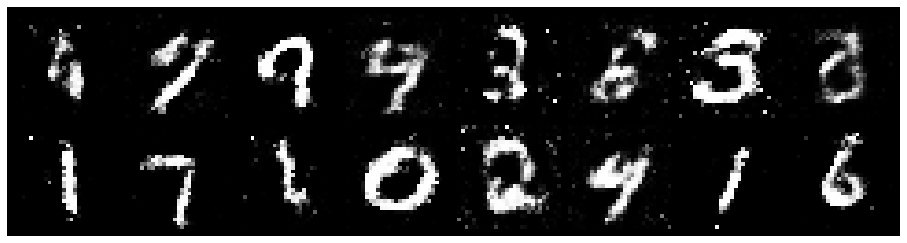

Epoch: [34/50], Batch Num: [200/600]
Discriminator Loss: 1.1809, Generator Loss: 1.0980
D(x): 0.5994, D(G(z)): 0.3764


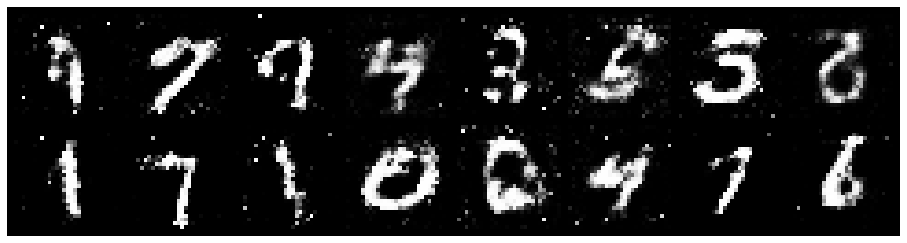

Epoch: [34/50], Batch Num: [300/600]
Discriminator Loss: 1.1858, Generator Loss: 1.2514
D(x): 0.5556, D(G(z)): 0.3456


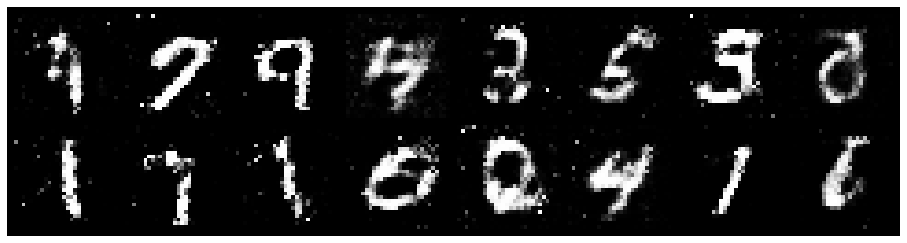

Epoch: [34/50], Batch Num: [400/600]
Discriminator Loss: 1.0597, Generator Loss: 1.2578
D(x): 0.6060, D(G(z)): 0.3423


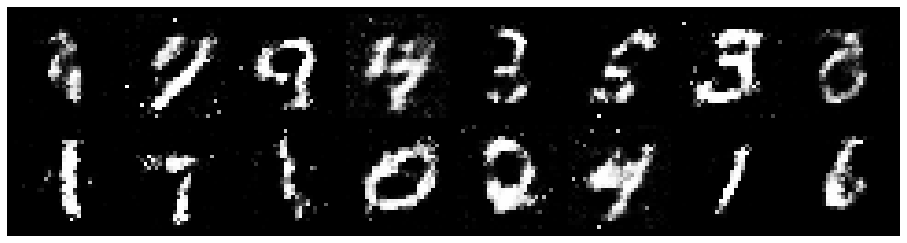

Epoch: [34/50], Batch Num: [500/600]
Discriminator Loss: 0.9854, Generator Loss: 1.3293
D(x): 0.6452, D(G(z)): 0.3400


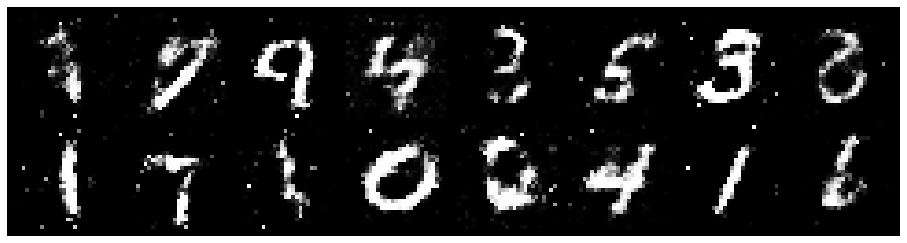

Epoch: [35/50], Batch Num: [0/600]
Discriminator Loss: 1.0355, Generator Loss: 1.6125
D(x): 0.6566, D(G(z)): 0.3470


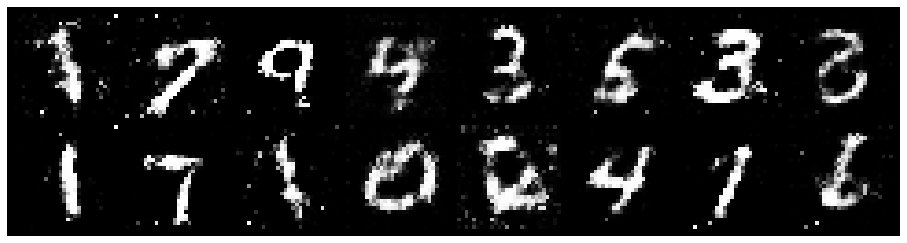

Epoch: [35/50], Batch Num: [100/600]
Discriminator Loss: 1.1158, Generator Loss: 1.1814
D(x): 0.6246, D(G(z)): 0.3931


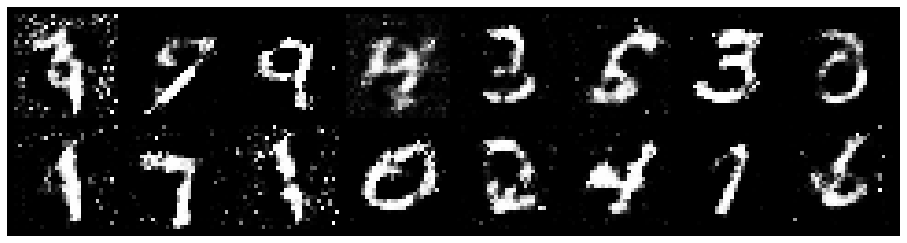

Epoch: [35/50], Batch Num: [200/600]
Discriminator Loss: 1.0527, Generator Loss: 0.9141
D(x): 0.6630, D(G(z)): 0.4097


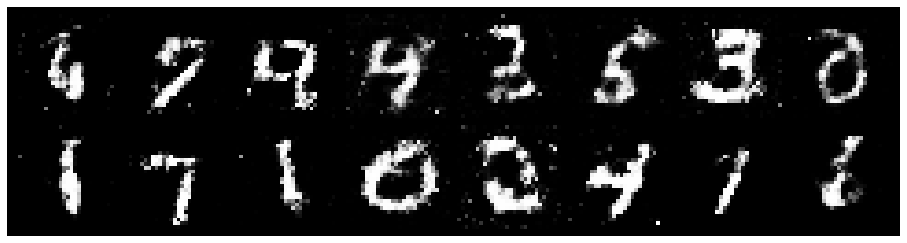

Epoch: [35/50], Batch Num: [300/600]
Discriminator Loss: 1.1501, Generator Loss: 1.1783
D(x): 0.6510, D(G(z)): 0.4356


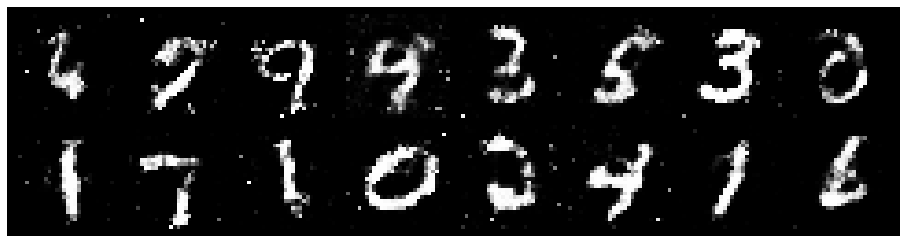

Epoch: [35/50], Batch Num: [400/600]
Discriminator Loss: 1.1374, Generator Loss: 1.0086
D(x): 0.5566, D(G(z)): 0.3580


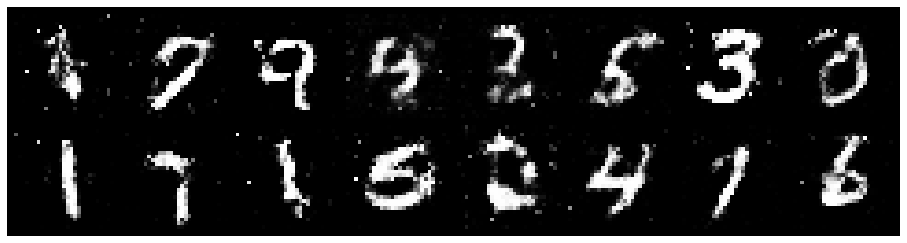

Epoch: [35/50], Batch Num: [500/600]
Discriminator Loss: 1.0231, Generator Loss: 1.5816
D(x): 0.6507, D(G(z)): 0.3488


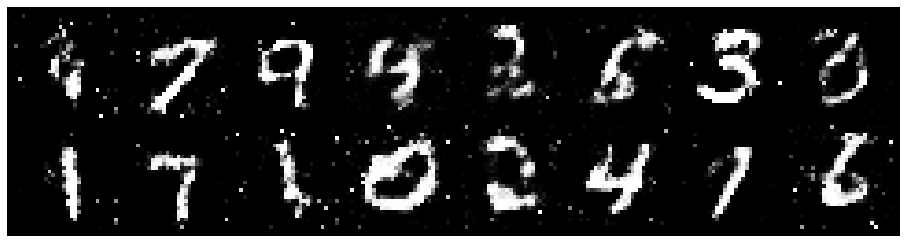

Epoch: [36/50], Batch Num: [0/600]
Discriminator Loss: 1.0304, Generator Loss: 1.0945
D(x): 0.6095, D(G(z)): 0.3328


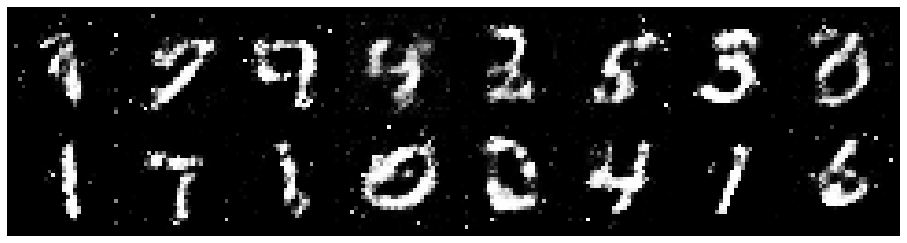

Epoch: [36/50], Batch Num: [100/600]
Discriminator Loss: 1.0579, Generator Loss: 1.1668
D(x): 0.6371, D(G(z)): 0.3639


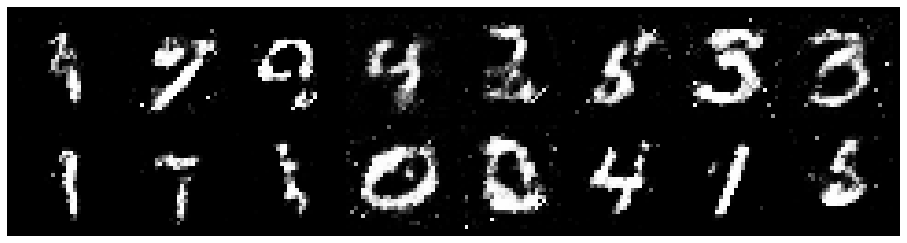

Epoch: [36/50], Batch Num: [200/600]
Discriminator Loss: 1.0579, Generator Loss: 1.1709
D(x): 0.6419, D(G(z)): 0.3797


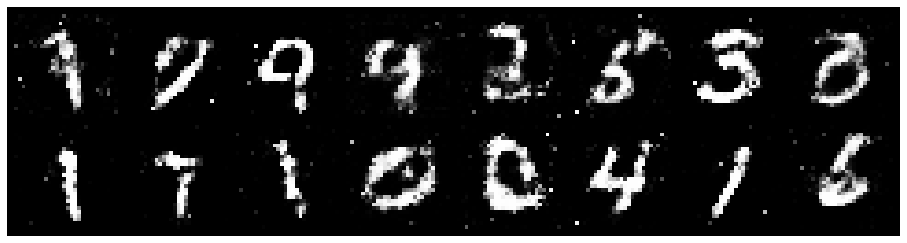

Epoch: [36/50], Batch Num: [300/600]
Discriminator Loss: 1.0872, Generator Loss: 1.0907
D(x): 0.6205, D(G(z)): 0.3699


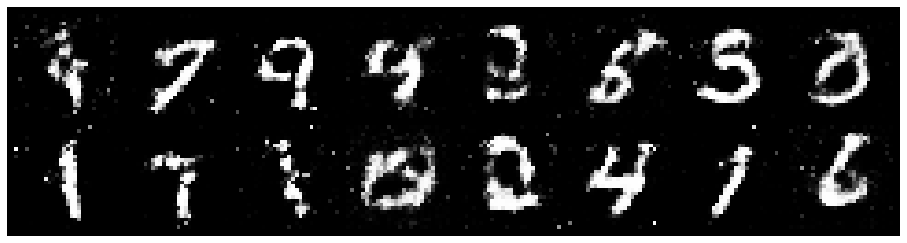

Epoch: [36/50], Batch Num: [400/600]
Discriminator Loss: 1.0696, Generator Loss: 1.2202
D(x): 0.6501, D(G(z)): 0.3602


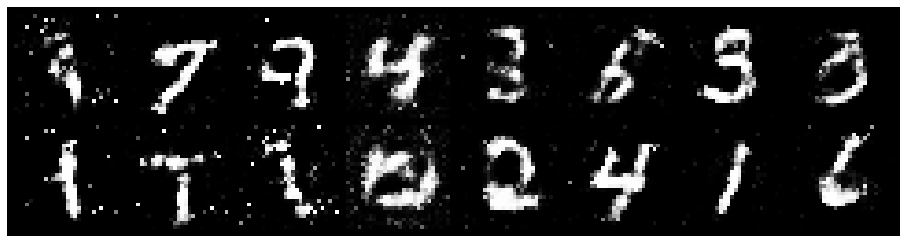

Epoch: [36/50], Batch Num: [500/600]
Discriminator Loss: 0.9996, Generator Loss: 1.3536
D(x): 0.6627, D(G(z)): 0.3420


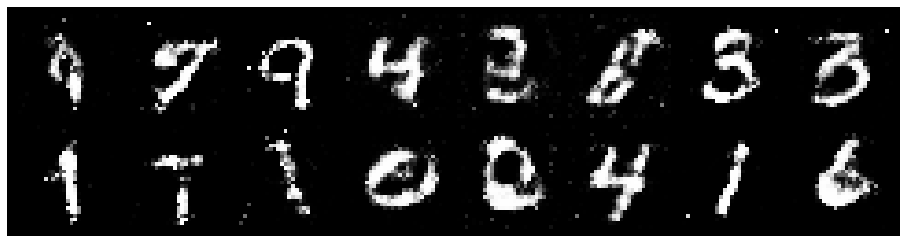

Epoch: [37/50], Batch Num: [0/600]
Discriminator Loss: 1.0435, Generator Loss: 1.2239
D(x): 0.6082, D(G(z)): 0.3507


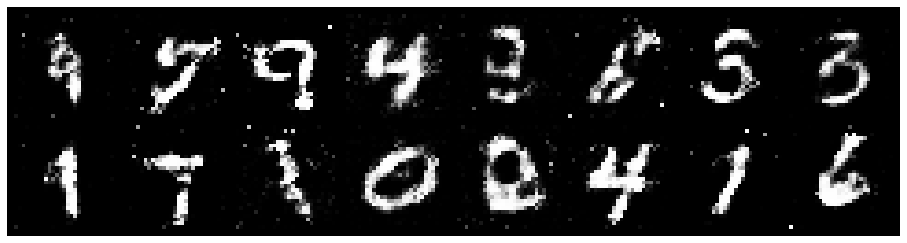

Epoch: [37/50], Batch Num: [100/600]
Discriminator Loss: 1.0306, Generator Loss: 1.1596
D(x): 0.6806, D(G(z)): 0.3964


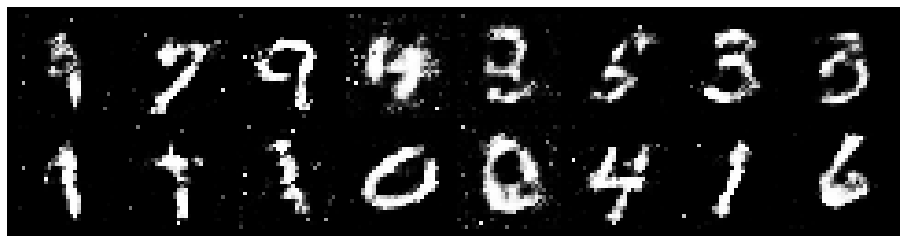

Epoch: [37/50], Batch Num: [200/600]
Discriminator Loss: 1.1643, Generator Loss: 1.3051
D(x): 0.6701, D(G(z)): 0.4106


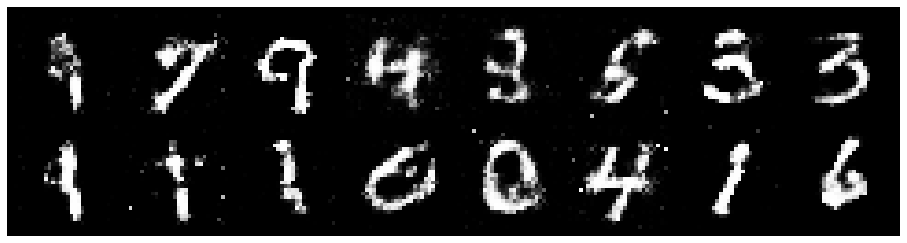

Epoch: [37/50], Batch Num: [300/600]
Discriminator Loss: 1.1824, Generator Loss: 1.1752
D(x): 0.6295, D(G(z)): 0.4116


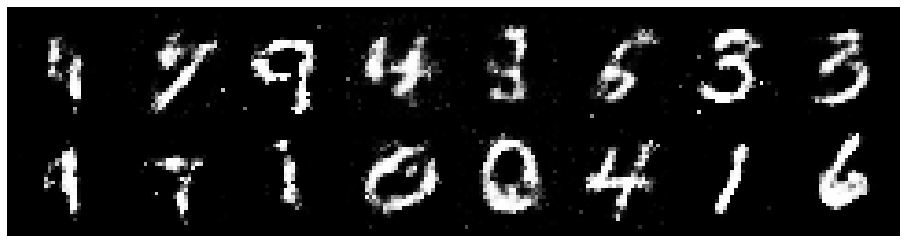

Epoch: [37/50], Batch Num: [400/600]
Discriminator Loss: 1.2207, Generator Loss: 1.0902
D(x): 0.6404, D(G(z)): 0.4309


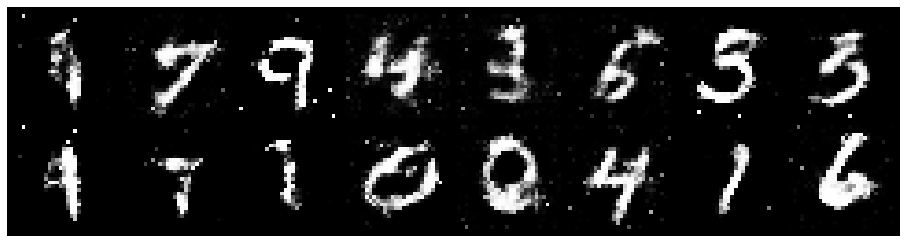

Epoch: [37/50], Batch Num: [500/600]
Discriminator Loss: 0.9185, Generator Loss: 1.2462
D(x): 0.6513, D(G(z)): 0.3082


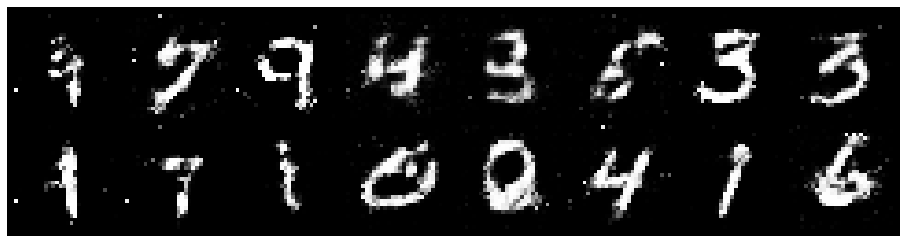

Epoch: [38/50], Batch Num: [0/600]
Discriminator Loss: 1.2037, Generator Loss: 1.1573
D(x): 0.6103, D(G(z)): 0.4086


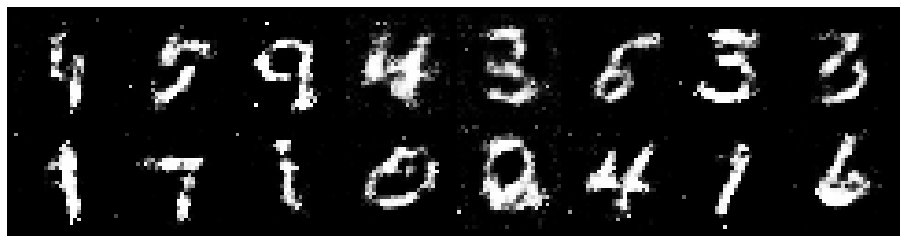

Epoch: [38/50], Batch Num: [100/600]
Discriminator Loss: 1.1510, Generator Loss: 0.8834
D(x): 0.6697, D(G(z)): 0.4225


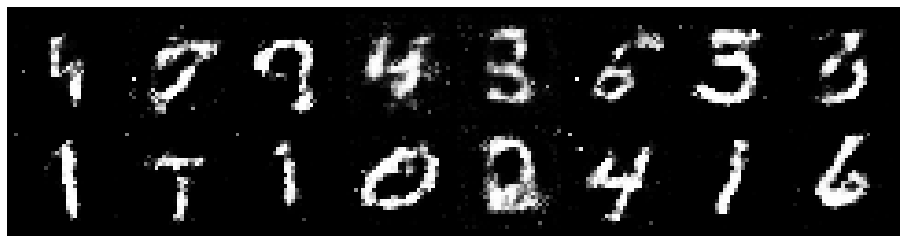

Epoch: [38/50], Batch Num: [200/600]
Discriminator Loss: 1.1154, Generator Loss: 1.2378
D(x): 0.6171, D(G(z)): 0.3899


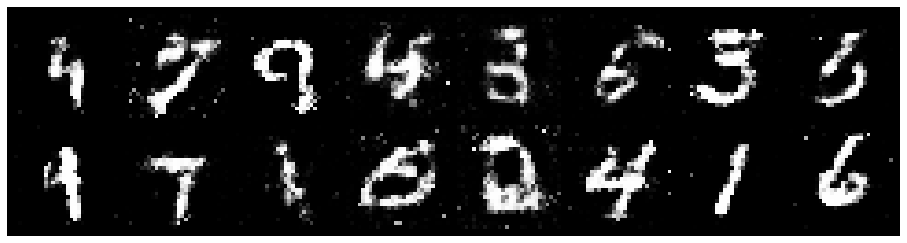

Epoch: [38/50], Batch Num: [300/600]
Discriminator Loss: 1.2757, Generator Loss: 1.0967
D(x): 0.5989, D(G(z)): 0.4322


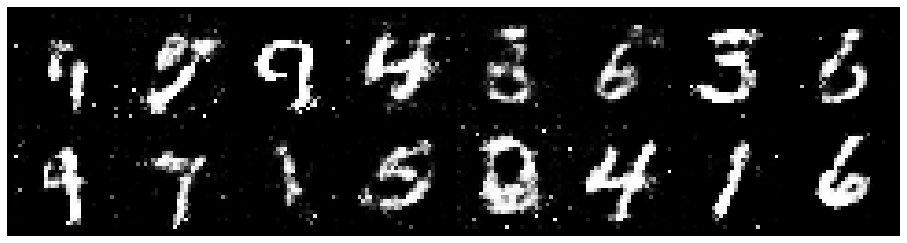

Epoch: [38/50], Batch Num: [400/600]
Discriminator Loss: 1.2692, Generator Loss: 0.9850
D(x): 0.5922, D(G(z)): 0.4480


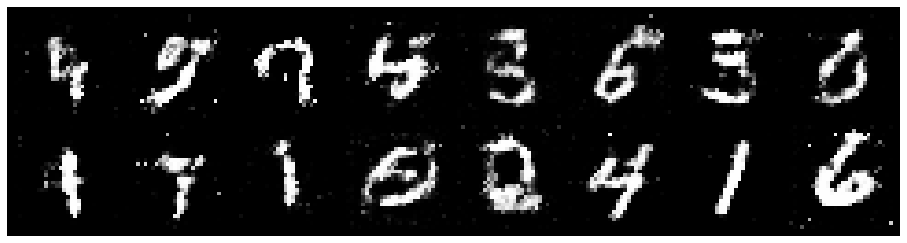

Epoch: [38/50], Batch Num: [500/600]
Discriminator Loss: 1.2525, Generator Loss: 1.0875
D(x): 0.5912, D(G(z)): 0.4067


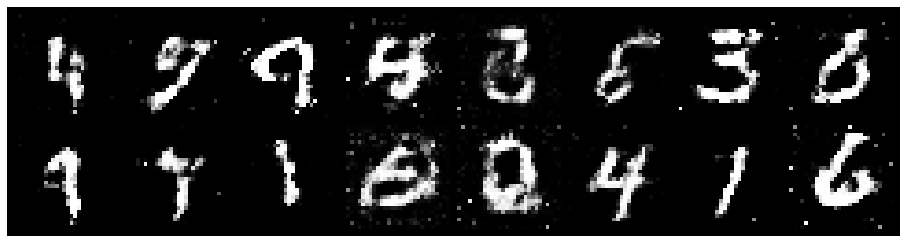

Epoch: [39/50], Batch Num: [0/600]
Discriminator Loss: 1.1675, Generator Loss: 1.2808
D(x): 0.6258, D(G(z)): 0.4151


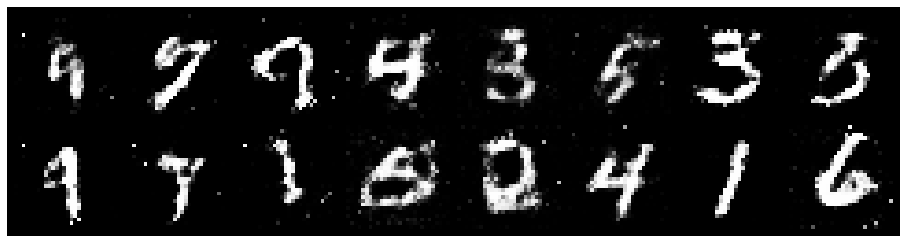

Epoch: [39/50], Batch Num: [100/600]
Discriminator Loss: 1.0761, Generator Loss: 1.0909
D(x): 0.6055, D(G(z)): 0.3711


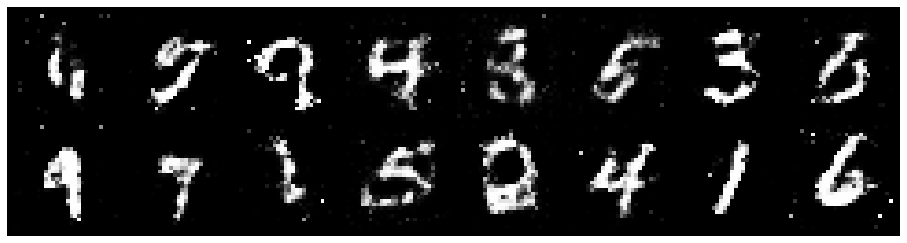

Epoch: [39/50], Batch Num: [200/600]
Discriminator Loss: 1.1391, Generator Loss: 1.2019
D(x): 0.6065, D(G(z)): 0.3879


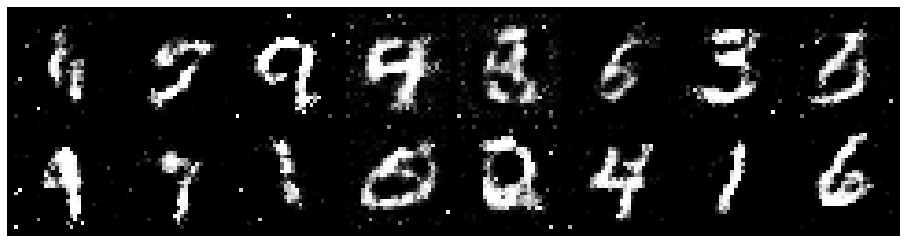

Epoch: [39/50], Batch Num: [300/600]
Discriminator Loss: 1.1596, Generator Loss: 1.0511
D(x): 0.5690, D(G(z)): 0.4040


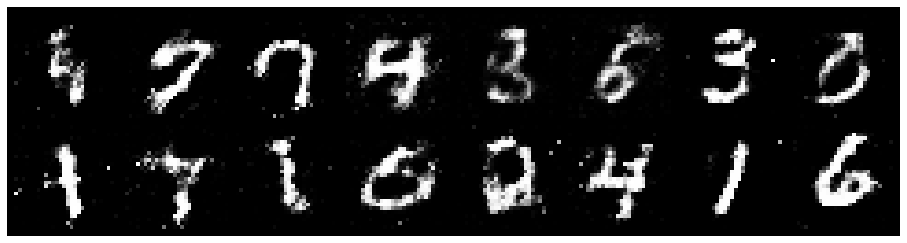

Epoch: [39/50], Batch Num: [400/600]
Discriminator Loss: 1.0534, Generator Loss: 1.2449
D(x): 0.6316, D(G(z)): 0.3727


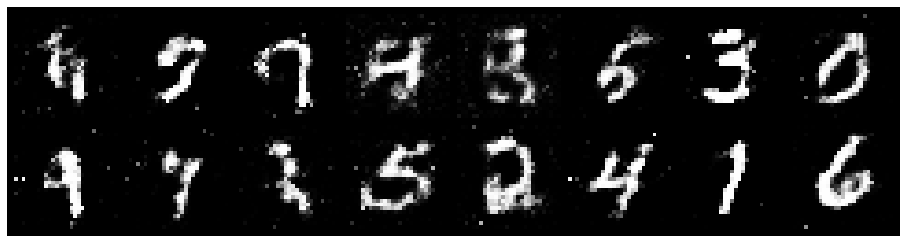

Epoch: [39/50], Batch Num: [500/600]
Discriminator Loss: 1.1008, Generator Loss: 1.0233
D(x): 0.5992, D(G(z)): 0.3876


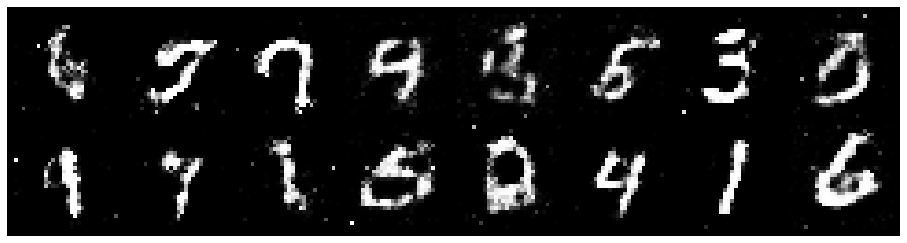

Epoch: [40/50], Batch Num: [0/600]
Discriminator Loss: 1.1611, Generator Loss: 1.2132
D(x): 0.6003, D(G(z)): 0.3813


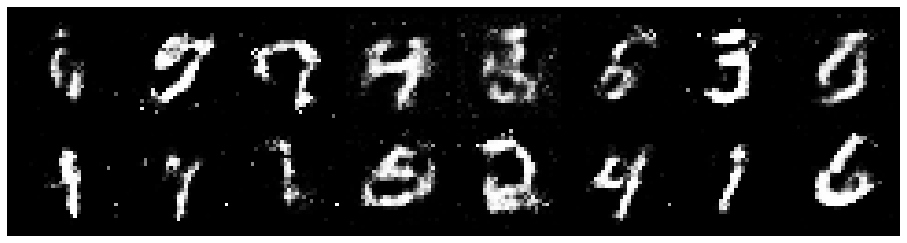

Epoch: [40/50], Batch Num: [100/600]
Discriminator Loss: 1.1709, Generator Loss: 1.2914
D(x): 0.6262, D(G(z)): 0.4094


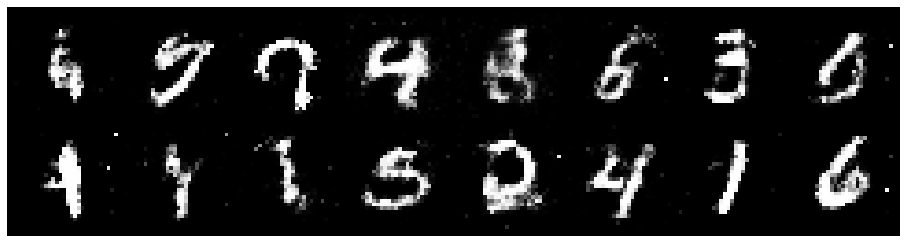

Epoch: [40/50], Batch Num: [200/600]
Discriminator Loss: 1.1166, Generator Loss: 1.2796
D(x): 0.5746, D(G(z)): 0.3396


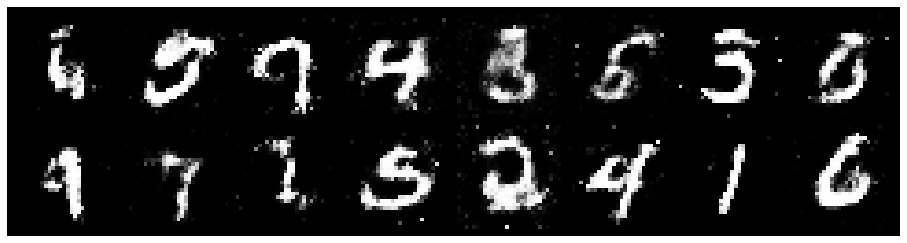

Epoch: [40/50], Batch Num: [300/600]
Discriminator Loss: 1.1038, Generator Loss: 0.9023
D(x): 0.6503, D(G(z)): 0.4336


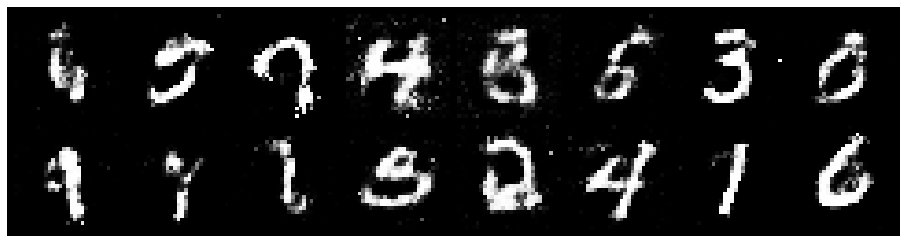

Epoch: [40/50], Batch Num: [400/600]
Discriminator Loss: 1.0201, Generator Loss: 1.2597
D(x): 0.6387, D(G(z)): 0.3395


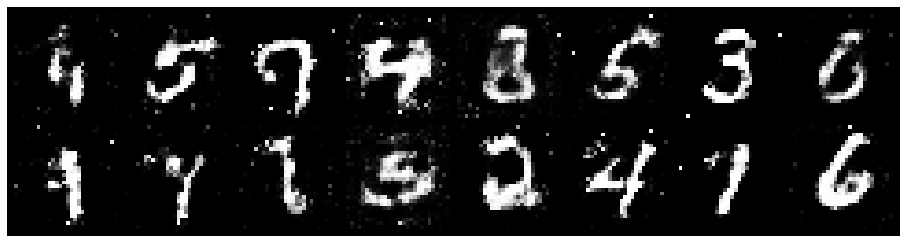

Epoch: [40/50], Batch Num: [500/600]
Discriminator Loss: 1.1571, Generator Loss: 1.0649
D(x): 0.5619, D(G(z)): 0.3857


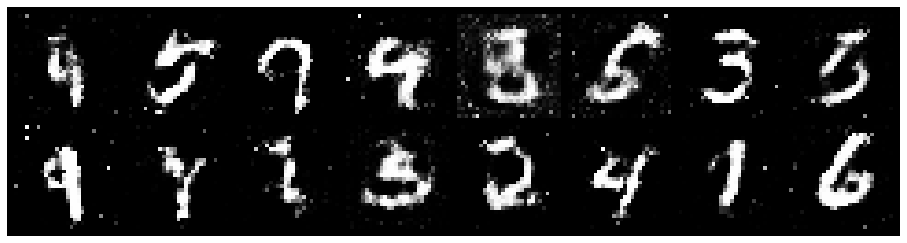

Epoch: [41/50], Batch Num: [0/600]
Discriminator Loss: 1.1862, Generator Loss: 1.0648
D(x): 0.6347, D(G(z)): 0.4323


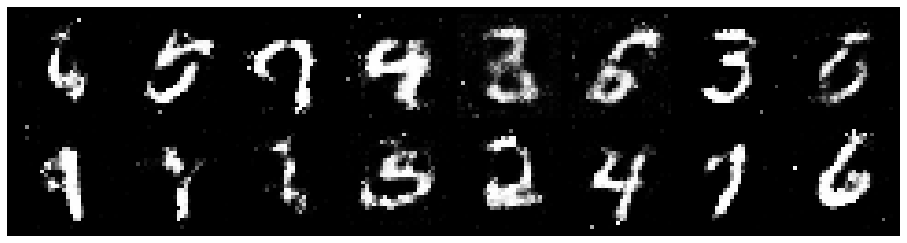

Epoch: [41/50], Batch Num: [100/600]
Discriminator Loss: 1.1879, Generator Loss: 1.0866
D(x): 0.5546, D(G(z)): 0.3694


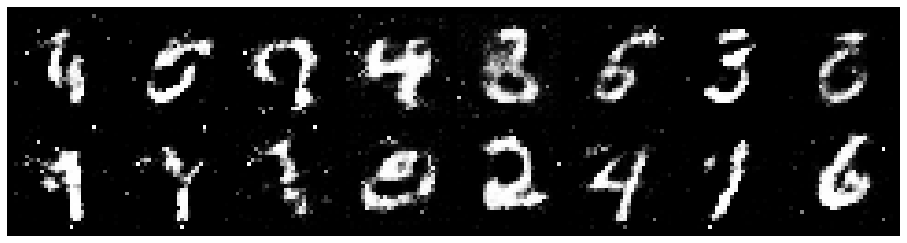

Epoch: [41/50], Batch Num: [200/600]
Discriminator Loss: 1.2170, Generator Loss: 0.9760
D(x): 0.5435, D(G(z)): 0.3937


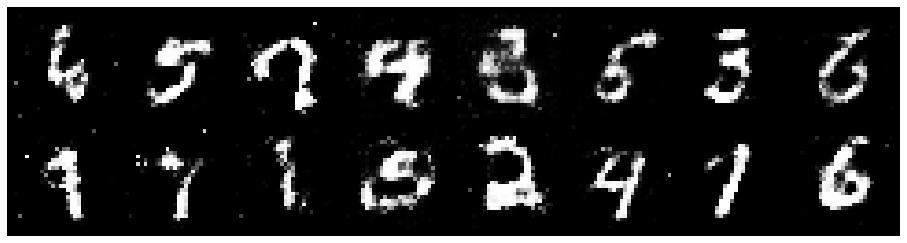

Epoch: [41/50], Batch Num: [300/600]
Discriminator Loss: 1.0668, Generator Loss: 1.0026
D(x): 0.6399, D(G(z)): 0.3801


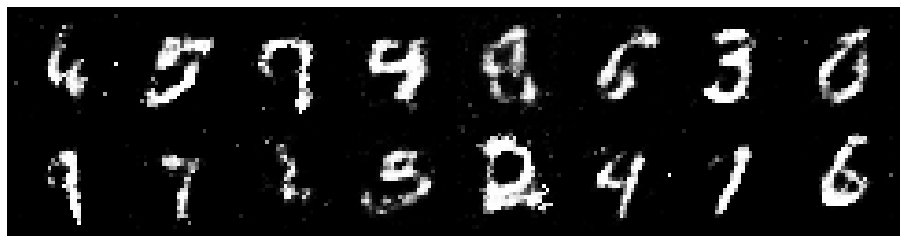

Epoch: [41/50], Batch Num: [400/600]
Discriminator Loss: 1.0094, Generator Loss: 1.1570
D(x): 0.6549, D(G(z)): 0.3694


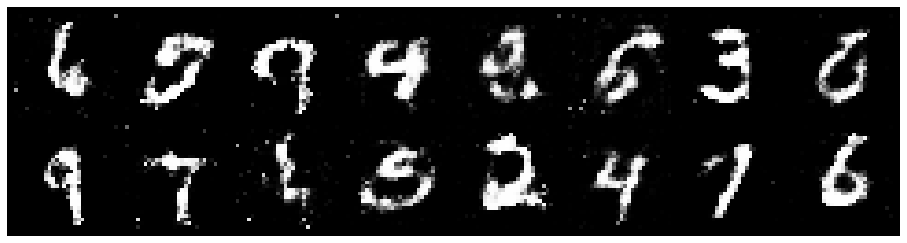

Epoch: [41/50], Batch Num: [500/600]
Discriminator Loss: 1.1961, Generator Loss: 1.0156
D(x): 0.5733, D(G(z)): 0.3991


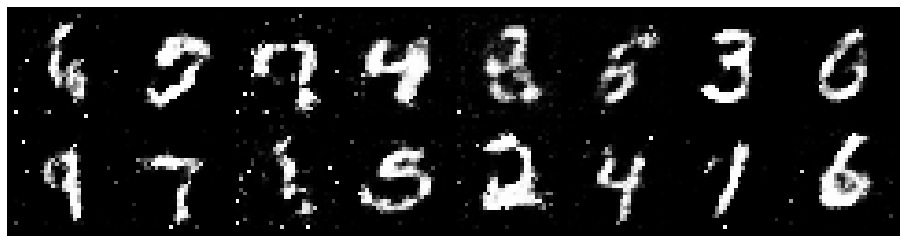

Epoch: [42/50], Batch Num: [0/600]
Discriminator Loss: 1.2713, Generator Loss: 0.9235
D(x): 0.6338, D(G(z)): 0.4899


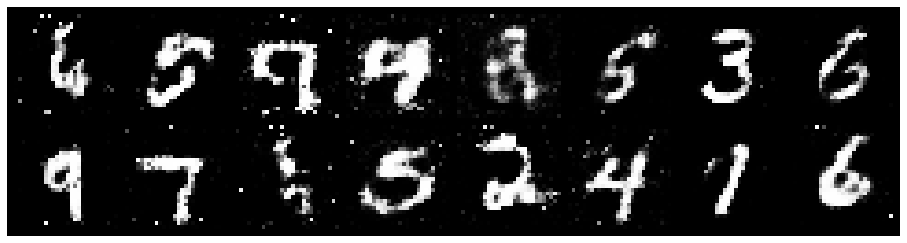

Epoch: [42/50], Batch Num: [100/600]
Discriminator Loss: 1.2760, Generator Loss: 0.9867
D(x): 0.5675, D(G(z)): 0.4123


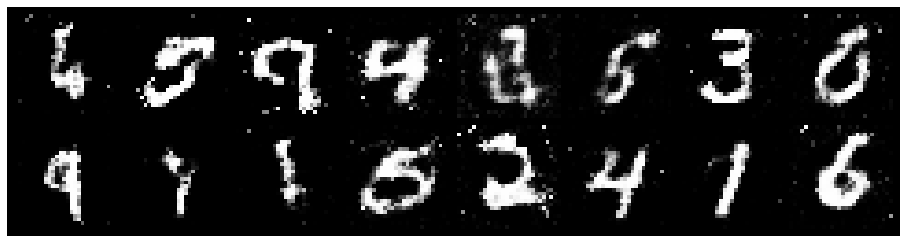

Epoch: [42/50], Batch Num: [200/600]
Discriminator Loss: 1.2368, Generator Loss: 0.9812
D(x): 0.6459, D(G(z)): 0.4501


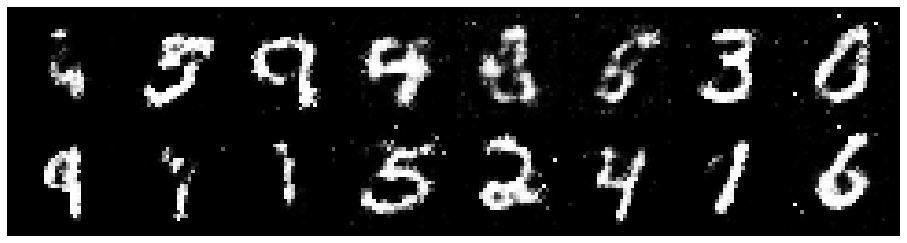

Epoch: [42/50], Batch Num: [300/600]
Discriminator Loss: 1.2227, Generator Loss: 1.2129
D(x): 0.5872, D(G(z)): 0.4033


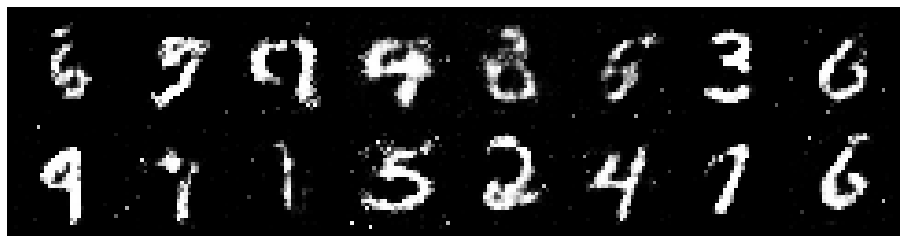

Epoch: [42/50], Batch Num: [400/600]
Discriminator Loss: 1.0987, Generator Loss: 1.0860
D(x): 0.6050, D(G(z)): 0.3776


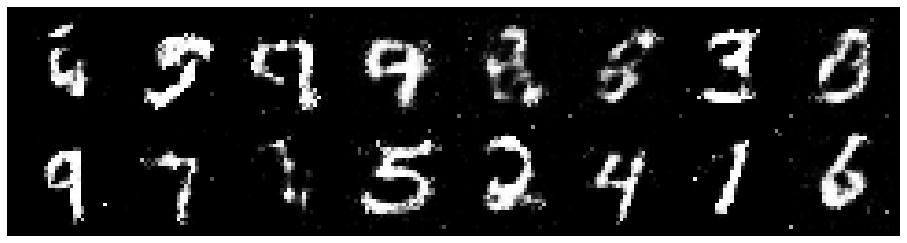

Epoch: [42/50], Batch Num: [500/600]
Discriminator Loss: 1.1240, Generator Loss: 1.1322
D(x): 0.5579, D(G(z)): 0.3443


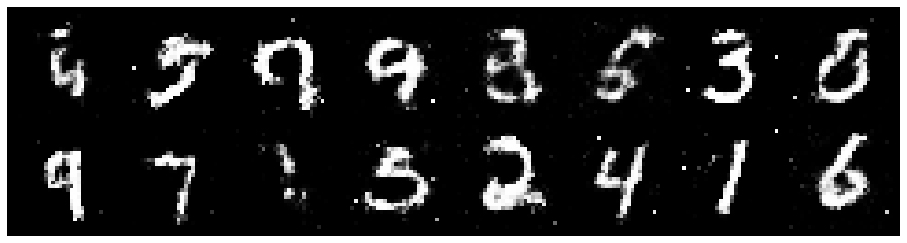

Epoch: [43/50], Batch Num: [0/600]
Discriminator Loss: 1.0855, Generator Loss: 1.0628
D(x): 0.6245, D(G(z)): 0.3883


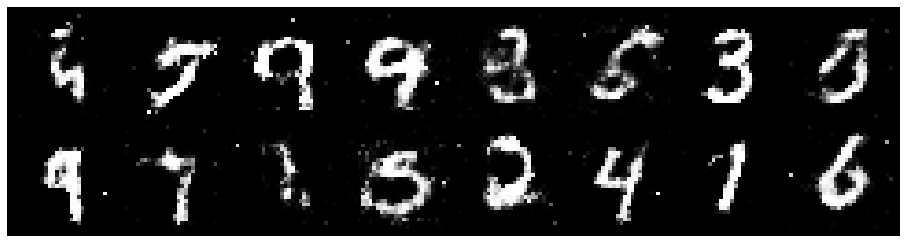

Epoch: [43/50], Batch Num: [100/600]
Discriminator Loss: 1.4113, Generator Loss: 0.9393
D(x): 0.6137, D(G(z)): 0.4806


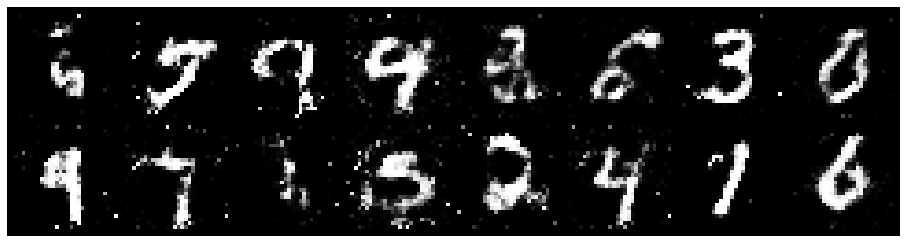

Epoch: [43/50], Batch Num: [200/600]
Discriminator Loss: 1.2633, Generator Loss: 0.8693
D(x): 0.6249, D(G(z)): 0.4648


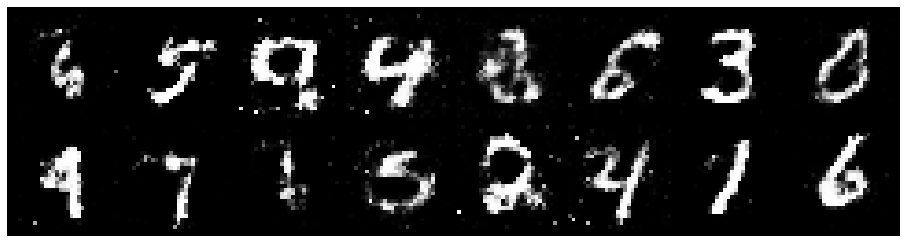

Epoch: [43/50], Batch Num: [300/600]
Discriminator Loss: 1.2094, Generator Loss: 1.0840
D(x): 0.5575, D(G(z)): 0.3693


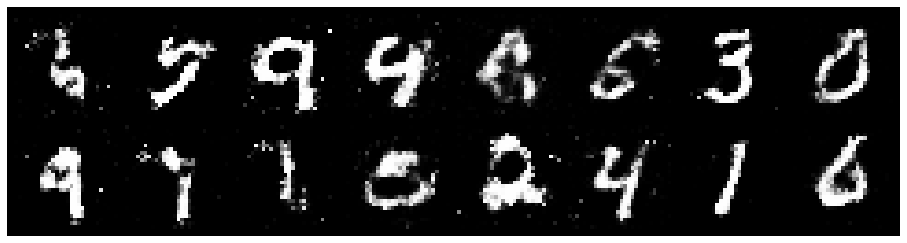

Epoch: [43/50], Batch Num: [400/600]
Discriminator Loss: 1.2198, Generator Loss: 1.3109
D(x): 0.5977, D(G(z)): 0.3897


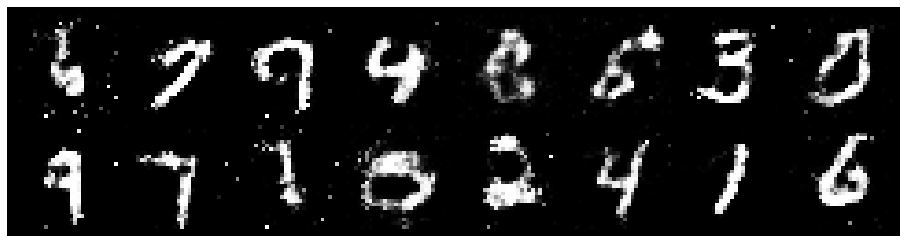

Epoch: [43/50], Batch Num: [500/600]
Discriminator Loss: 1.3369, Generator Loss: 1.2718
D(x): 0.6328, D(G(z)): 0.4735


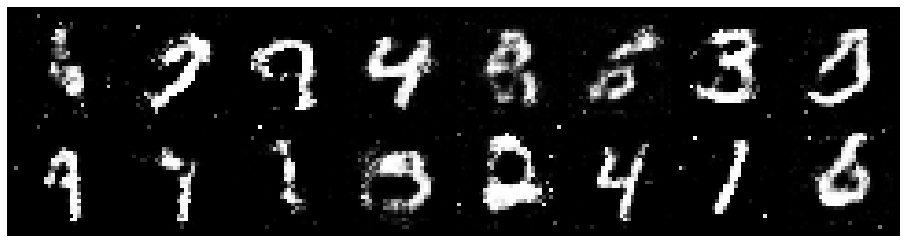

Epoch: [44/50], Batch Num: [0/600]
Discriminator Loss: 1.2534, Generator Loss: 1.2406
D(x): 0.5955, D(G(z)): 0.4297


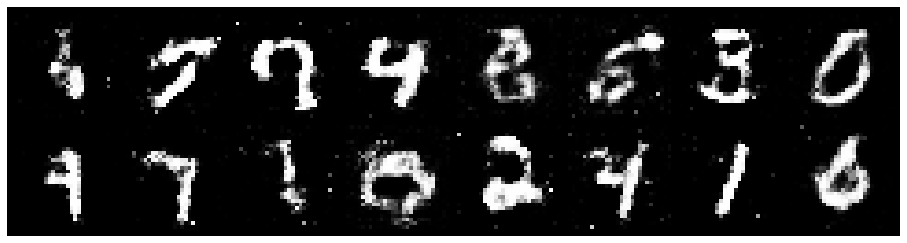

Epoch: [44/50], Batch Num: [100/600]
Discriminator Loss: 1.0518, Generator Loss: 1.0908
D(x): 0.6857, D(G(z)): 0.4040


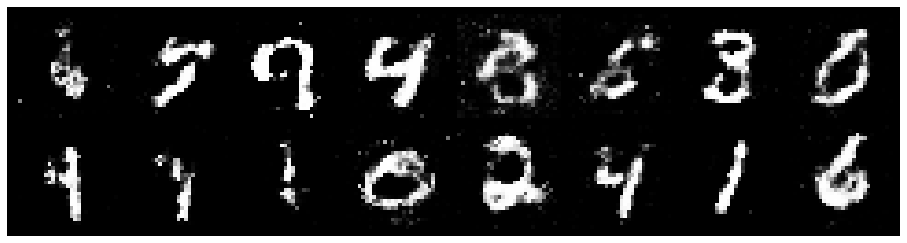

Epoch: [44/50], Batch Num: [200/600]
Discriminator Loss: 1.1606, Generator Loss: 1.2884
D(x): 0.6586, D(G(z)): 0.3987


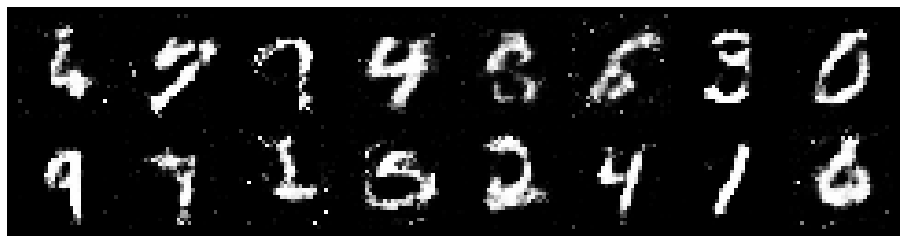

Epoch: [44/50], Batch Num: [300/600]
Discriminator Loss: 1.0146, Generator Loss: 1.1486
D(x): 0.6275, D(G(z)): 0.3515


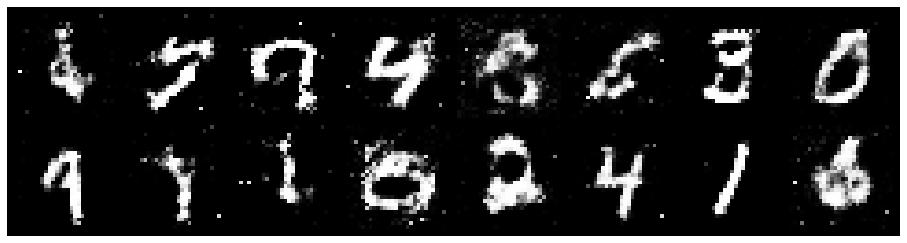

Epoch: [44/50], Batch Num: [400/600]
Discriminator Loss: 1.1160, Generator Loss: 1.2382
D(x): 0.6153, D(G(z)): 0.3893


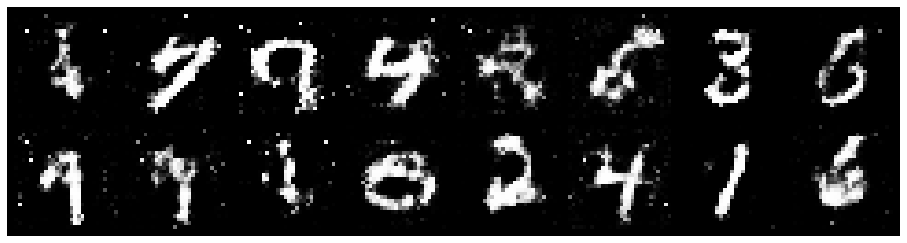

Epoch: [44/50], Batch Num: [500/600]
Discriminator Loss: 1.1180, Generator Loss: 1.1816
D(x): 0.5577, D(G(z)): 0.3361


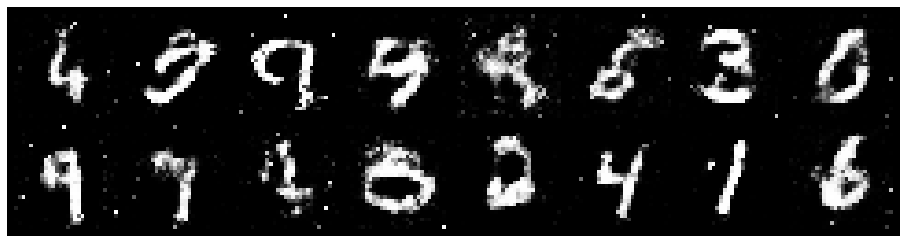

Epoch: [45/50], Batch Num: [0/600]
Discriminator Loss: 1.0946, Generator Loss: 1.1671
D(x): 0.6211, D(G(z)): 0.3675


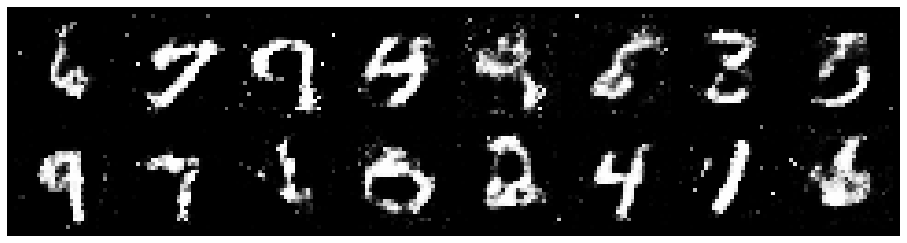

Epoch: [45/50], Batch Num: [100/600]
Discriminator Loss: 1.0714, Generator Loss: 0.9966
D(x): 0.6420, D(G(z)): 0.3970


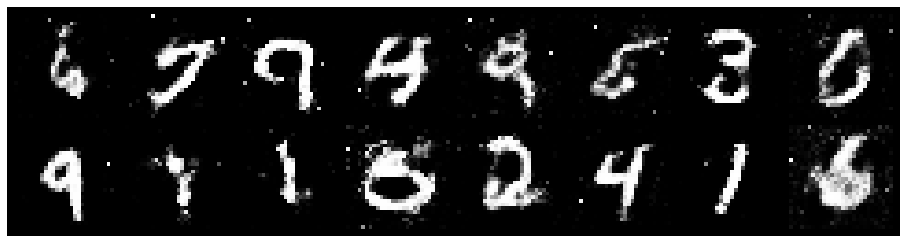

Epoch: [45/50], Batch Num: [200/600]
Discriminator Loss: 1.0603, Generator Loss: 1.2071
D(x): 0.5888, D(G(z)): 0.3453


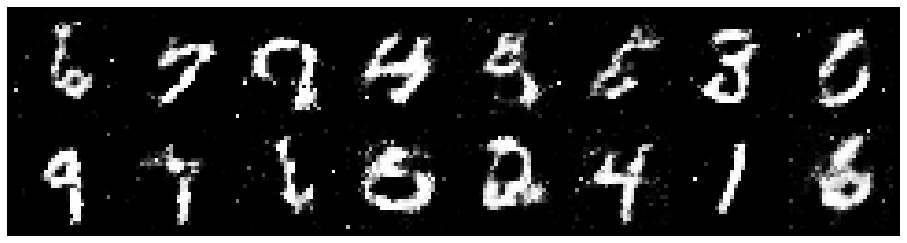

Epoch: [45/50], Batch Num: [300/600]
Discriminator Loss: 1.0113, Generator Loss: 1.2288
D(x): 0.6269, D(G(z)): 0.3542


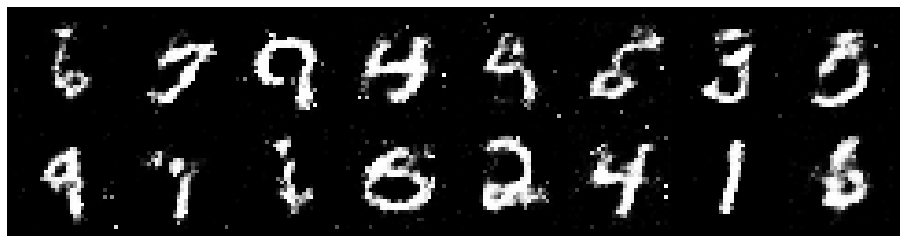

Epoch: [45/50], Batch Num: [400/600]
Discriminator Loss: 1.0359, Generator Loss: 1.0632
D(x): 0.6011, D(G(z)): 0.3525


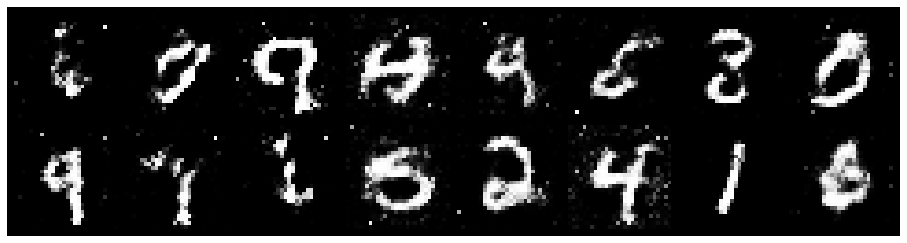

Epoch: [45/50], Batch Num: [500/600]
Discriminator Loss: 1.1261, Generator Loss: 1.0038
D(x): 0.6399, D(G(z)): 0.4225


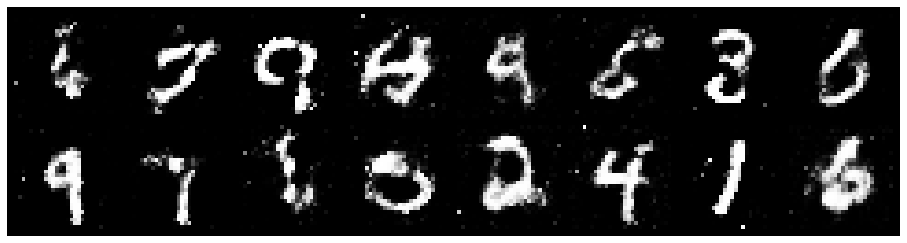

Epoch: [46/50], Batch Num: [0/600]
Discriminator Loss: 1.1966, Generator Loss: 1.0851
D(x): 0.6180, D(G(z)): 0.4164


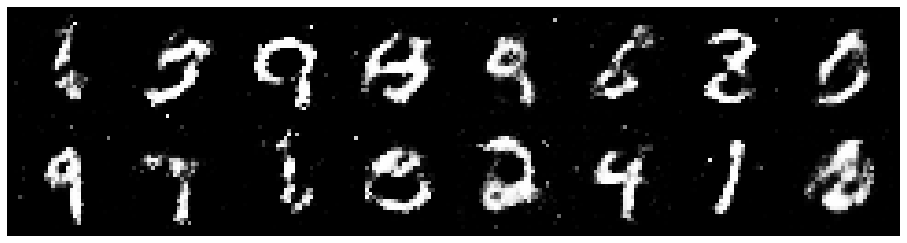

Epoch: [46/50], Batch Num: [100/600]
Discriminator Loss: 1.1706, Generator Loss: 0.9783
D(x): 0.6064, D(G(z)): 0.4073


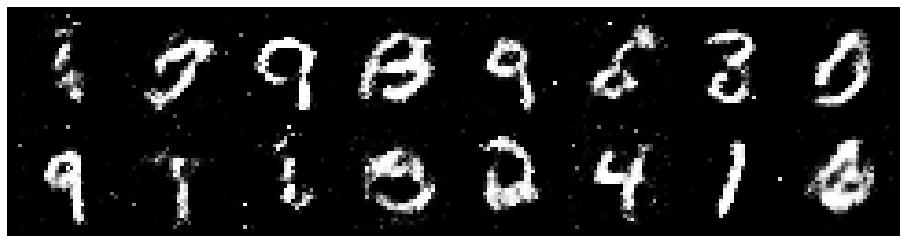

Epoch: [46/50], Batch Num: [200/600]
Discriminator Loss: 1.1567, Generator Loss: 1.0365
D(x): 0.6503, D(G(z)): 0.4371


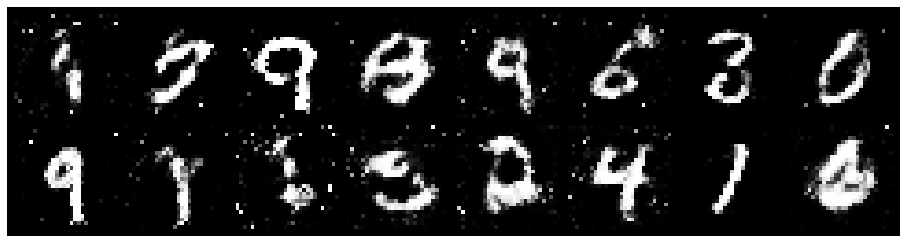

Epoch: [46/50], Batch Num: [300/600]
Discriminator Loss: 1.2242, Generator Loss: 0.9770
D(x): 0.6229, D(G(z)): 0.4453


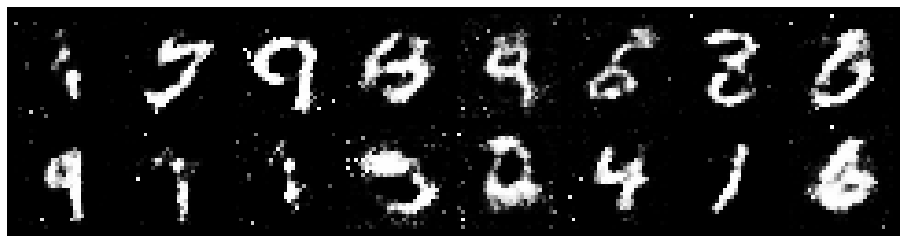

Epoch: [46/50], Batch Num: [400/600]
Discriminator Loss: 1.1701, Generator Loss: 1.0482
D(x): 0.6115, D(G(z)): 0.4262


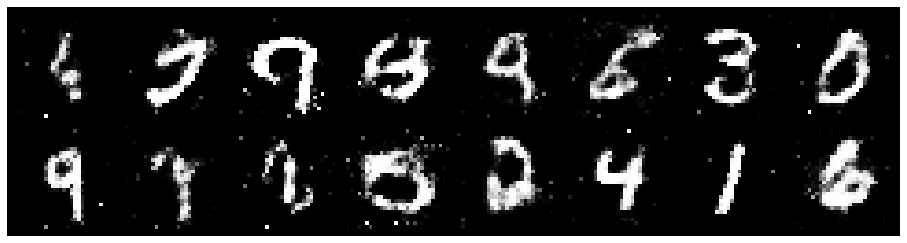

Epoch: [46/50], Batch Num: [500/600]
Discriminator Loss: 1.1693, Generator Loss: 1.0537
D(x): 0.6216, D(G(z)): 0.4324


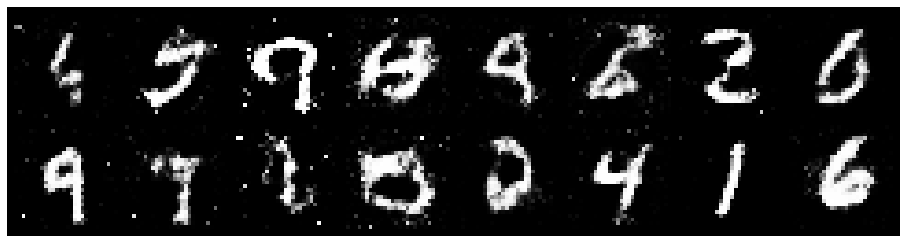

Epoch: [47/50], Batch Num: [0/600]
Discriminator Loss: 1.1831, Generator Loss: 1.0318
D(x): 0.5779, D(G(z)): 0.4011


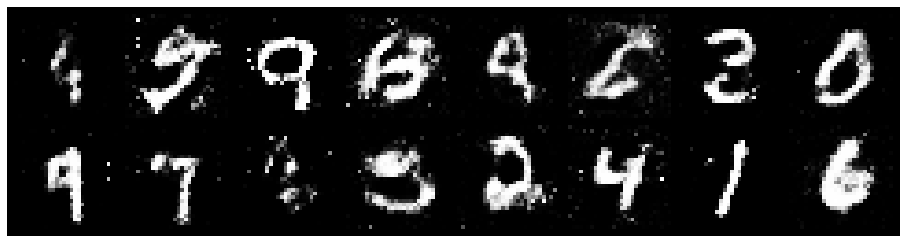

Epoch: [47/50], Batch Num: [100/600]
Discriminator Loss: 1.2631, Generator Loss: 0.9899
D(x): 0.5569, D(G(z)): 0.4187


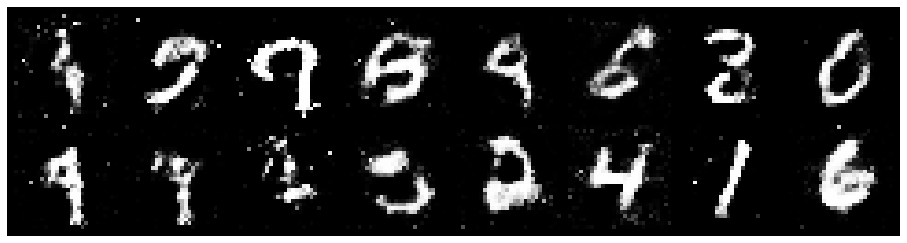

Epoch: [47/50], Batch Num: [200/600]
Discriminator Loss: 1.2778, Generator Loss: 0.9962
D(x): 0.5776, D(G(z)): 0.4327


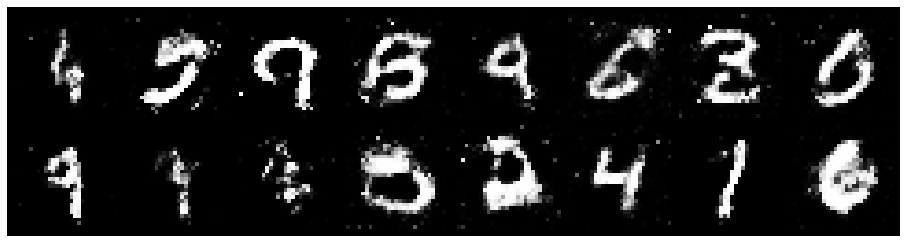

Epoch: [47/50], Batch Num: [300/600]
Discriminator Loss: 1.2035, Generator Loss: 0.9932
D(x): 0.6072, D(G(z)): 0.4331


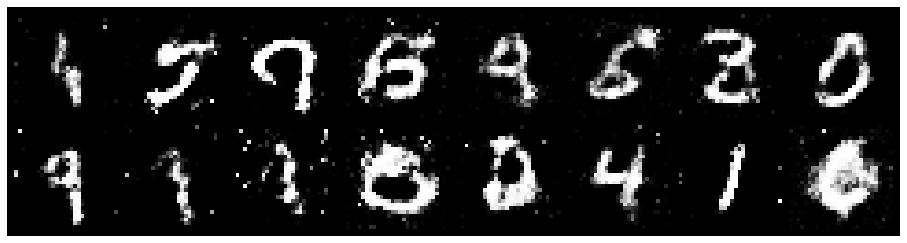

Epoch: [47/50], Batch Num: [400/600]
Discriminator Loss: 1.2742, Generator Loss: 1.0895
D(x): 0.5567, D(G(z)): 0.4107


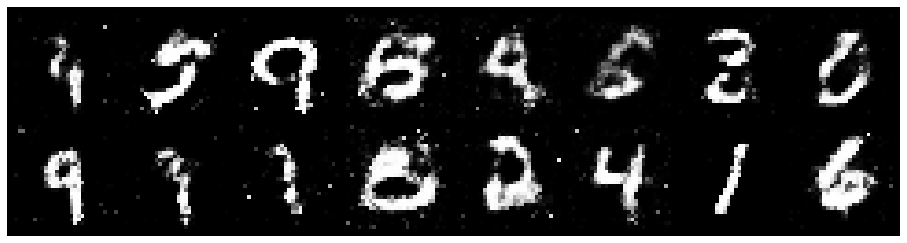

Epoch: [47/50], Batch Num: [500/600]
Discriminator Loss: 1.2345, Generator Loss: 1.0530
D(x): 0.5530, D(G(z)): 0.4053


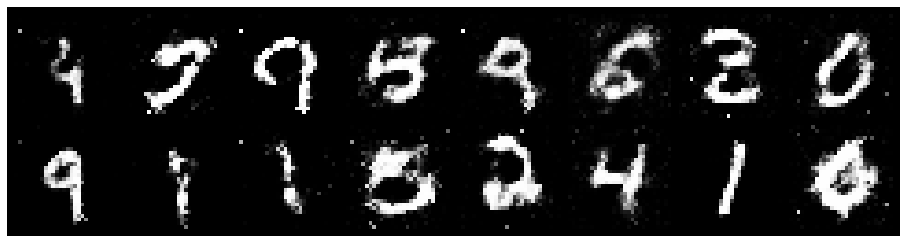

Epoch: [48/50], Batch Num: [0/600]
Discriminator Loss: 1.1263, Generator Loss: 1.0889
D(x): 0.5836, D(G(z)): 0.3745


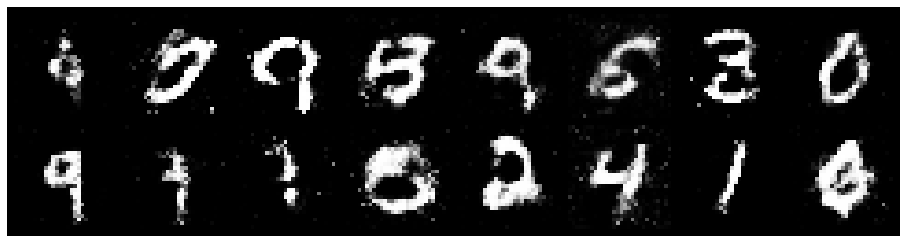

Epoch: [48/50], Batch Num: [100/600]
Discriminator Loss: 1.0720, Generator Loss: 0.9804
D(x): 0.6723, D(G(z)): 0.4280


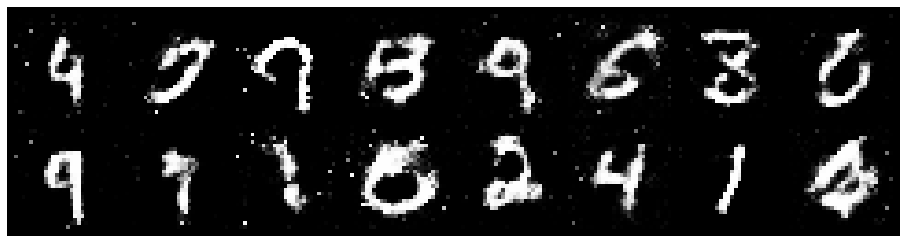

Epoch: [48/50], Batch Num: [200/600]
Discriminator Loss: 1.1542, Generator Loss: 1.0116
D(x): 0.5787, D(G(z)): 0.3880


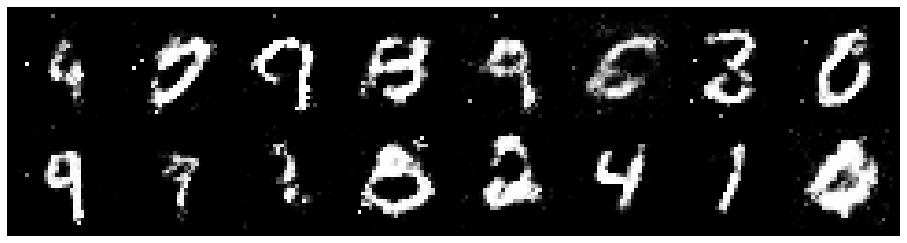

Epoch: [48/50], Batch Num: [300/600]
Discriminator Loss: 1.2421, Generator Loss: 0.9807
D(x): 0.5806, D(G(z)): 0.4313


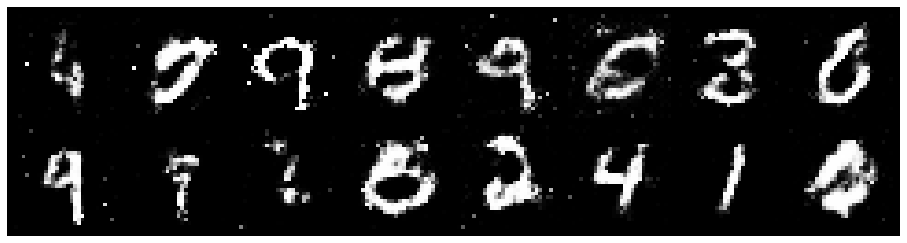

Epoch: [48/50], Batch Num: [400/600]
Discriminator Loss: 1.2385, Generator Loss: 0.9385
D(x): 0.5500, D(G(z)): 0.3970


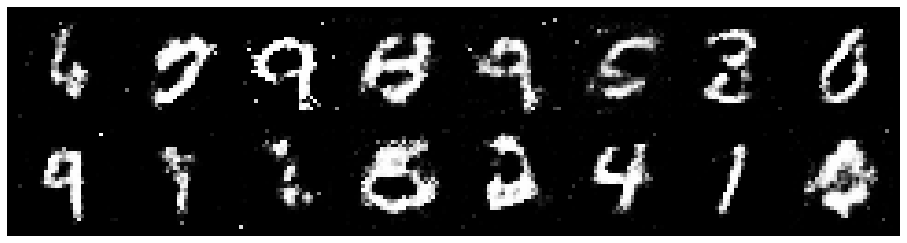

Epoch: [48/50], Batch Num: [500/600]
Discriminator Loss: 1.2575, Generator Loss: 1.2135
D(x): 0.6005, D(G(z)): 0.4101


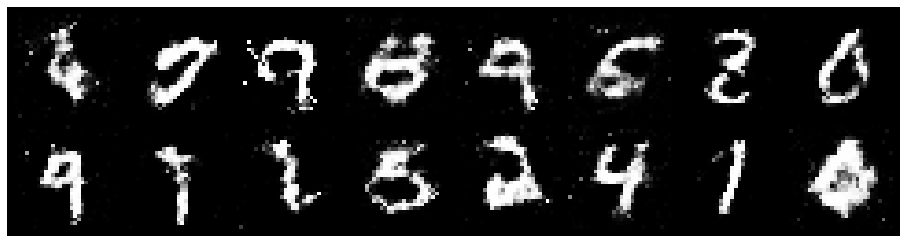

Epoch: [49/50], Batch Num: [0/600]
Discriminator Loss: 1.2563, Generator Loss: 0.9312
D(x): 0.5451, D(G(z)): 0.4206


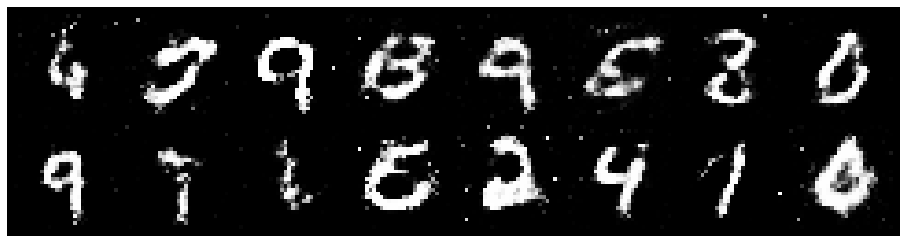

Epoch: [49/50], Batch Num: [100/600]
Discriminator Loss: 1.1898, Generator Loss: 1.0570
D(x): 0.5556, D(G(z)): 0.3791


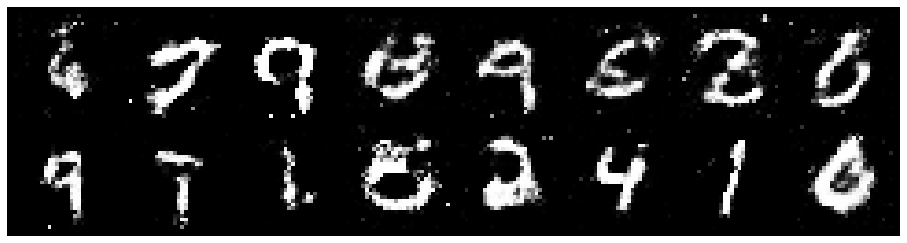

Epoch: [49/50], Batch Num: [200/600]
Discriminator Loss: 1.2312, Generator Loss: 1.0493
D(x): 0.5450, D(G(z)): 0.3869


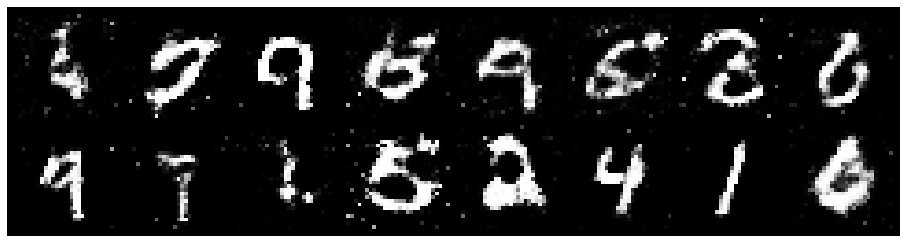

Epoch: [49/50], Batch Num: [300/600]
Discriminator Loss: 1.1358, Generator Loss: 1.2569
D(x): 0.6393, D(G(z)): 0.3987


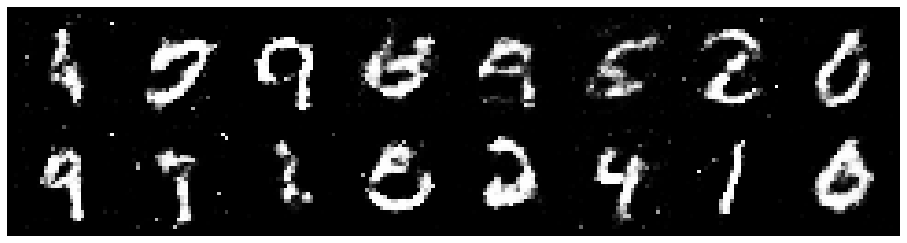

Epoch: [49/50], Batch Num: [400/600]
Discriminator Loss: 1.0583, Generator Loss: 1.1088
D(x): 0.5910, D(G(z)): 0.3457


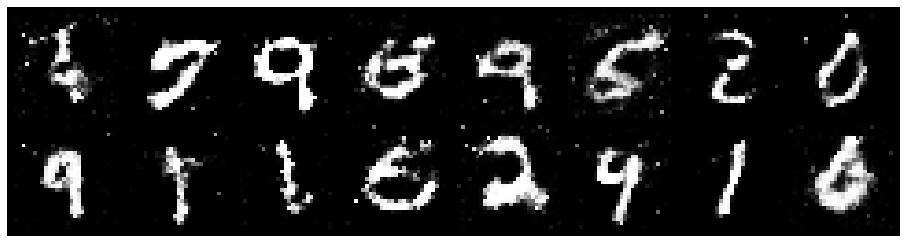

Epoch: [49/50], Batch Num: [500/600]
Discriminator Loss: 1.1099, Generator Loss: 0.9364
D(x): 0.6159, D(G(z)): 0.4222


In [34]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 50#200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(image_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )

## Resources

* https://medium.com/ai-society/gans-from-scratch-1-a-deep-introduction-with-code-in-pytorch-and-tensorflow-cb03cdcdba0f

## Notes

* How is it possible that in train_discriminator, backward is called two times before taking a step in the optimizer? What is the result of doing this?
* Perform a test training a simple linear regression, train the model with some data and check the gradients, then train with another data and check again the gradients before optimizer.step()
* Why when training discrimintator, the fake data has to be deatached. Because when training Discriminator, Generator gradients won't be calculated and since data was created from Generator it includes gradients.